# Ekstraksi Zoning 6 Zona dengan 135 Data

## Import Library 

In [1]:
import os
import cv2
import numpy as np
import math
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from skimage import io, color
import seaborn as sns

## Training

### Preprocessing

#### Load Data Training

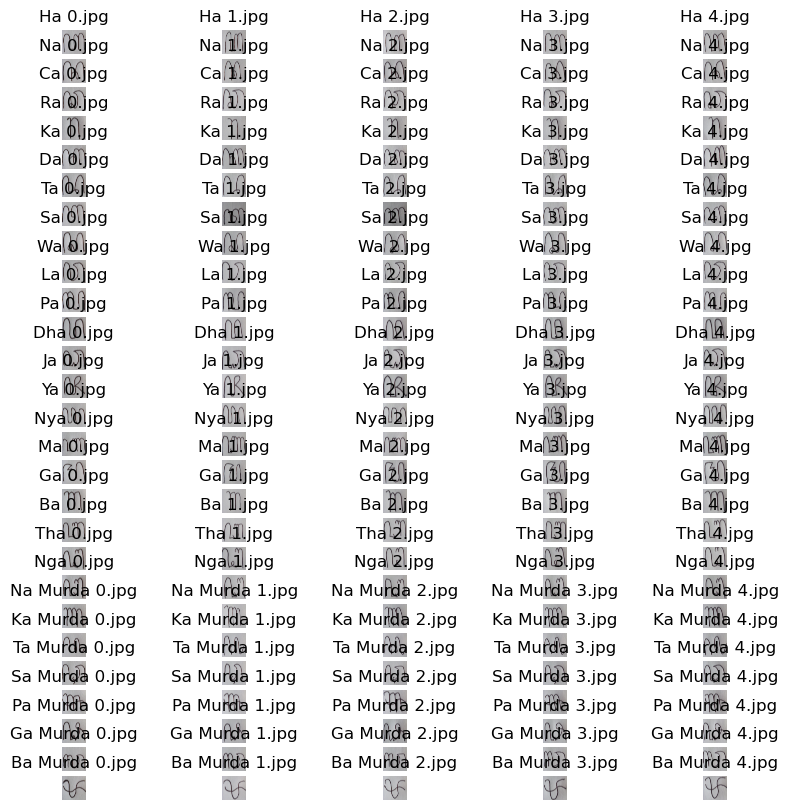

In [2]:
i = 0
k = 0
images = []
name = np.empty(135, dtype=object)
root_folder = 'Data Training 1'
subfolders = ['Ha', 'Na', 'Ca', 'Ra', 'Ka', 'Da', 'Ta', 'Sa', 'Wa', 
              'La', 'Pa', 'Dha', 'Ja','Ya', 'Nya', 'Ma', 'Ga', 'Ba', 
              'Tha', 'Nga', 'Na Murda', 'Ka Murda', 'Ta Murda', 'Sa Murda', 'Pa Murda', 'Ga Murda', 'Ba Murda']
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for subfolder in subfolders:
    subfolder_path = os.path.join(root_folder, subfolder)
    
    for file in os.listdir(subfolder_path):
        if file.lower().endswith(('.jpg')):
            image_path = os.path.join(subfolder_path, file)
            image = Image.open(image_path)
            images.append(image)
            axs[i].imshow(image)
            axs[i].axis('off')
            filename = os.path.basename(file)
            name[i] = filename
            axs[i].set_title(filename)
            i += 1
            
plt.show() 

#### Resize Data Training

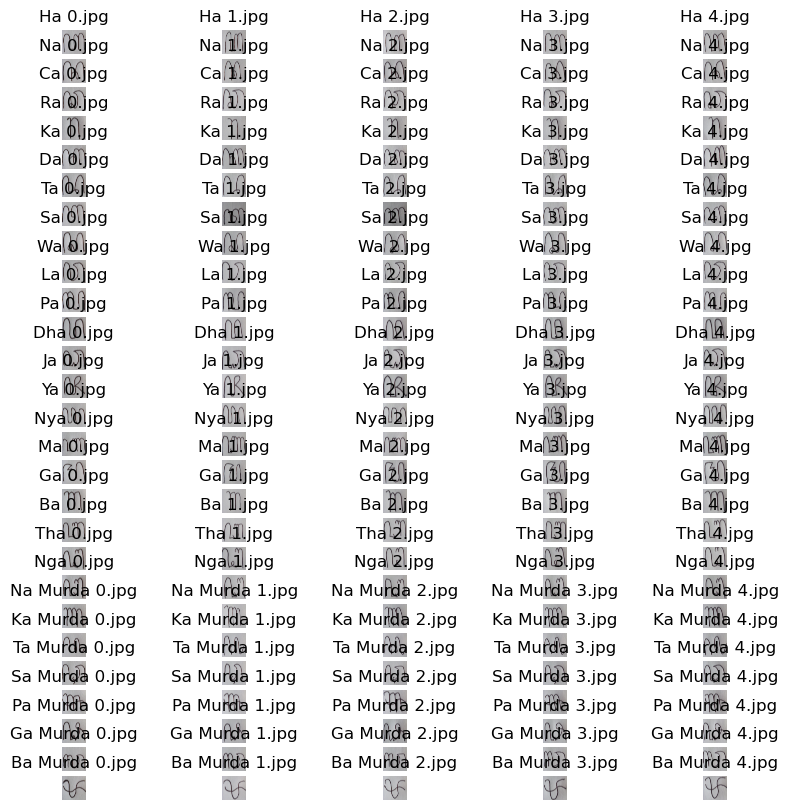

In [3]:
i = 0
resized_images = []
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for image in images:
    resized_image = image.resize((120, 120))
    resized_images.append(resized_image)
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(name[i])
    i += 1

plt.show()

#### Grayscale Data Training

In [4]:
grayscale_images = []
for image in resized_images:
    width, height = image.size
    grayscale_img = Image.new("L", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            r, g, b = image.getpixel((x, y))
            brightness = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            grayscale_img.putpixel((x, y), brightness)
            
    grayscale_images.append(grayscale_img)

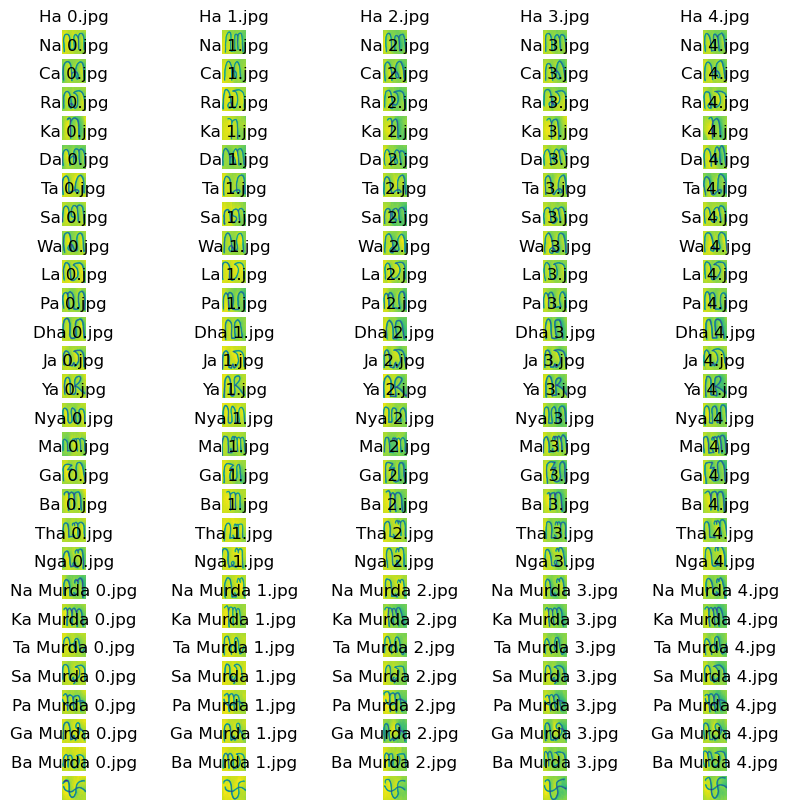

In [5]:
i = 0
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for image in grayscale_images:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(name[i])
    i += 1
    
plt.show()

#### Sauvola Threshold Data Training

In [6]:
k = 0.2
R = 128
threshold_images = []

for image in grayscale_images:
    image = image.rotate(270)
    image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    img_array = np.array(image)
    width, height = image.size
    binary_img = Image.new("1", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            window = img_array[max(x-15, 0):min(x+15, width), max(y-15, 0):min(y+15, height)]
            mean = np.mean(window)
            stddev = np.std(window)
            threshold = mean * (1 + k * ((stddev / R) - 1))
                
            if img_array[x, y] > threshold:
                binary_img.putpixel((x, y), 0)
            else:
                binary_img.putpixel((x, y), 255)
    
    threshold_images.append(binary_img)

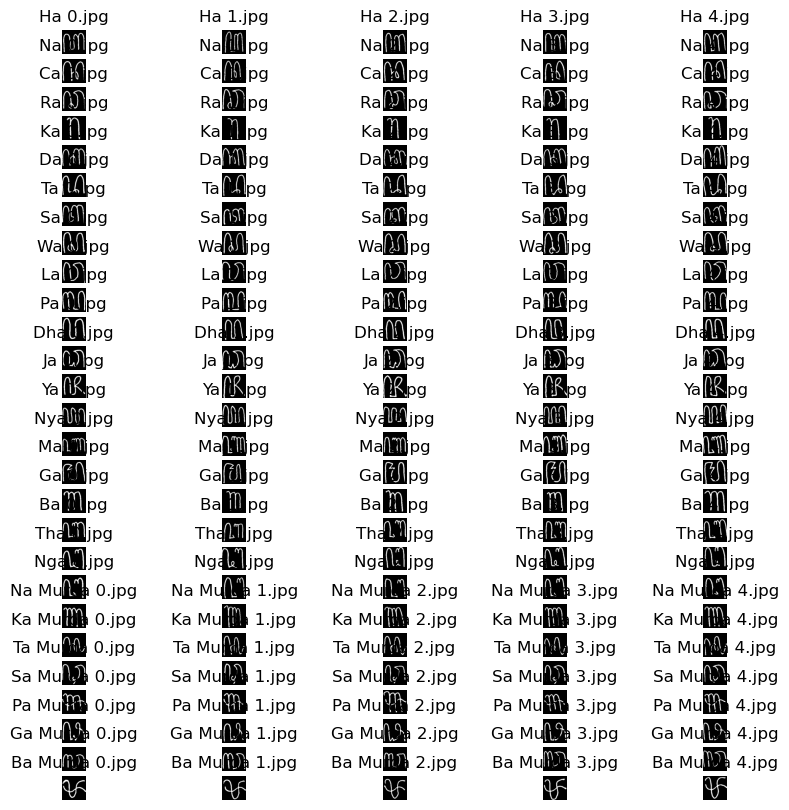

In [7]:
i = 0
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for image in threshold_images:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(name[i])
    i += 1
    
plt.show()

### Ekstraksi Zoning ICZ dan ZCZ 

#### Ekstraksi Zoning

In [8]:
i = 0
k = 0
centroid = np.zeros((len(threshold_images), 14))
array_ekstraksi = np.zeros((len(threshold_images), 12))
array_ngelegena = np.zeros((100, 12))
array_murda =  np.zeros((35, 12))

for image in threshold_images:
    width, height = image.size
    zone_height = height // 6
    zone1 = image.crop((0, 0, width, zone_height))
    zone2 = image.crop((0, zone_height, width, zone_height * 2))
    zone3 = image.crop((0, zone_height * 2, width, zone_height * 3))
    zone4 = image.crop((0, zone_height * 3, width, zone_height * 4))
    zone5 = image.crop((0, zone_height * 4, width, zone_height * 5))
    zone6 = image.crop((0, zone_height * 5, width, height))
    
    img_array = np.array(image)
    img_zone1 = np.array(zone1)
    img_zone2 = np.array(zone2)
    img_zone3 = np.array(zone3)
    img_zone4 = np.array(zone4)
    img_zone5 = np.array(zone5)
    img_zone6 = np.array(zone6)
    total_pixel = np.sum(img_array)
    total_zone1 = np.sum(img_zone1)
    total_zone2 = np.sum(img_zone2)
    total_zone3 = np.sum(img_zone3)
    total_zone4 = np.sum(img_zone4)
    total_zone5 = np.sum(img_zone5)
    total_zone6 = np.sum(img_zone6)
    
    kolom = 0
    baris = 0
    kolom_zone1 = 0
    kolom_zone2 = 0
    kolom_zone3 = 0
    kolom_zone4 = 0
    kolom_zone5 = 0
    kolom_zone6 = 0
    baris_zone1 = 0
    baris_zone2 = 0
    baris_zone3 = 0
    baris_zone4 = 0
    baris_zone5 = 0
    baris_zone6 = 0
    sum_kolom = 0
    sum_baris = 0
    sumkolom_zone1 = 0
    sumkolom_zone2 = 0
    sumkolom_zone3 = 0
    sumkolom_zone4 = 0
    sumkolom_zone5 = 0
    sumkolom_zone6 = 0
    sumbaris_zone1 = 0
    sumbaris_zone2 = 0
    sumbaris_zone3 = 0
    sumbaris_zone4 = 0
    sumbaris_zone5 = 0
    sumbaris_zone6 = 0
    sumiczzone1 = 0
    sumiczzone2 = 0
    sumiczzone3 = 0
    sumiczzone4 = 0
    sumiczzone5 = 0
    sumiczzone6 = 0
    sumzczzone1 = 0
    sumzczzone2 = 0
    sumzczzone3 = 0
    sumzczzone4 = 0
    sumzczzone5 = 0
    sumzczzone6 = 0
    
    for x in range(width):
    
        for y in range(height):
            kolom += img_array[y][x]
            baris += img_array[x][y]
    
        sum_kolom += kolom * (x + 1)  
        sum_baris += baris * (x + 1)
            
        kolom = 0
        baris = 0
        
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[x])):
            baris_zone1 += img_zone1[x][y]
            baris_zone2 += img_zone2[x][y]
            baris_zone3 += img_zone3[x][y]
            baris_zone4 += img_zone4[x][y]
            baris_zone5 += img_zone5[x][y]
            baris_zone6 += img_zone6[x][y]
            
        sumbaris_zone1 += baris_zone1 * (x + 1)
        sumbaris_zone2 += baris_zone2 * (x + 1)
        sumbaris_zone3 += baris_zone3 * (x + 1)
        sumbaris_zone4 += baris_zone4 * (x + 1)
        sumbaris_zone5 += baris_zone5 * (x + 1)
        sumbaris_zone6 += baris_zone6 * (x + 1)

        baris_zone1 = 0
        baris_zone2 = 0
        baris_zone3 = 0
        baris_zone4 = 0
        baris_zone5 = 0
        baris_zone6 = 0
            
    for x in range(len(img_zone1[0])):
            
        for y in range(len(img_zone1)):
            kolom_zone1 += img_zone1[y][x]
            kolom_zone2 += img_zone2[y][x]    
            kolom_zone3 += img_zone3[y][x]
            kolom_zone4 += img_zone4[y][x]
            kolom_zone5 += img_zone5[y][x]
            kolom_zone6 += img_zone6[y][x]
                
        sumkolom_zone1 += kolom_zone1 * (x + 1)  
        sumkolom_zone2 += kolom_zone2 * (x + 1)  
        sumkolom_zone3 += kolom_zone3 * (x + 1)
        sumkolom_zone4 += kolom_zone4 * (x + 1)
        sumkolom_zone5 += kolom_zone5 * (x + 1)
        sumkolom_zone6 += kolom_zone6 * (x + 1)
            
        kolom_zone1 = 0
        kolom_zone2 = 0
        kolom_zone3 = 0
        kolom_zone4 = 0
        kolom_zone5 = 0
        kolom_zone6 = 0
            
    centroid_x = sum_kolom / total_pixel
    centroid_y = sum_baris / total_pixel
        
    centroidx_zone1 = sumkolom_zone1 / total_zone1
    centroidx_zone2 = sumkolom_zone2 / total_zone2
    centroidx_zone3 = sumkolom_zone3 / total_zone3
    centroidx_zone4 = sumkolom_zone4 / total_zone4
    centroidx_zone5 = sumkolom_zone5 / total_zone5
    centroidx_zone6 = sumkolom_zone6 / total_zone6
    
    centroidy_zone1 = sumbaris_zone1 / total_zone1
    centroidy_zone2 = sumbaris_zone2 / total_zone2
    centroidy_zone3 = sumbaris_zone3 / total_zone3
    centroidy_zone4 = sumbaris_zone4 / total_zone4
    centroidy_zone5 = sumbaris_zone5 / total_zone5
    centroidy_zone6 = sumbaris_zone6 / total_zone6
    
    centroid[i] = [centroid_x, centroid_y, centroidx_zone1, centroidx_zone2, centroidx_zone3, centroidx_zone4, centroidx_zone5, centroidx_zone6
                   , centroidy_zone1, centroidy_zone2, centroidy_zone3, centroidy_zone4, centroidy_zone5, centroidy_zone6]
    
    if math.isnan(centroidx_zone1) and math.isnan(centroidy_zone1):
        centroidx_zone1 = 0
        centroidy_zone1 = 0
        
    if math.isnan(centroidx_zone2) and math.isnan(centroidy_zone2):
        centroidx_zone2 = 0
        centroidy_zone2 = 0
        
    if math.isnan(centroidx_zone3) and math.isnan(centroidy_zone3):
        centroidx_zone3 = 0
        centroidy_zone3 = 0
        
    if math.isnan(centroidx_zone4) and math.isnan(centroidy_zone4):
        centroidx_zone4 = 0
        centroidy_zone4 = 0
        
    if math.isnan(centroidx_zone5) and math.isnan(centroidy_zone5):
        centroidx_zone5 = 0
        centroidy_zone5 = 0
        
    if math.isnan(centroidx_zone6) and math.isnan(centroidy_zone6):
        centroidx_zone6 = 0
        centroidy_zone6 = 0
        
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[0])):
            if img_zone1[x][y] == True:
                sumiczzone1 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone1 += math.sqrt(pow(((y+1) - centroidx_zone1), 2) + pow(((x+1) - centroidy_zone1), 2))
                
            if img_zone2[x][y] == True:
                sumiczzone2 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone2 += math.sqrt(pow(((y+1) - centroidx_zone2), 2) + pow(((x+1) - centroidy_zone2), 2))
                
            if img_zone3[x][y] == True:
                sumiczzone3 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone3 += math.sqrt(pow(((y+1) - centroidx_zone3), 2) + pow(((x+1) - centroidy_zone3), 2))
                
            if img_zone4[x][y] == True:
                sumiczzone4 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone4 += math.sqrt(pow(((y+1) - centroidx_zone4), 2) + pow(((x+1) - centroidy_zone4), 2))
                
            if img_zone5[x][y] == True:
                sumiczzone5 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone5 += math.sqrt(pow(((y+1) - centroidx_zone5), 2) + pow(((x+1) - centroidy_zone5), 2))
                
            if img_zone6[x][y] == True:
                sumiczzone6 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone6 += math.sqrt(pow(((y+1) - centroidx_zone6), 2) + pow(((x+1) - centroidy_zone6), 2))
                    
    iczzone1 = sumiczzone1 / total_zone1
    iczzone2 = sumiczzone2 / total_zone2
    iczzone3 = sumiczzone3 / total_zone3
    iczzone4 = sumiczzone4 / total_zone4
    iczzone5 = sumiczzone5 / total_zone5
    iczzone6 = sumiczzone6 / total_zone6
        
    zczzone1 = sumzczzone1 / total_zone1
    zczzone2 = sumzczzone2 / total_zone2
    zczzone3 = sumzczzone3 / total_zone3
    zczzone4 = sumzczzone4 / total_zone4
    zczzone5 = sumzczzone5 / total_zone5
    zczzone6 = sumzczzone6 / total_zone6
    
    if math.isnan(iczzone1) and math.isnan(zczzone1):
        iczzone1 = 0
        zczzone1 = 0
        
    if math.isnan(iczzone2) and math.isnan(zczzone2):
        iczzone2 = 0
        zczzone2 = 0    
     
    if math.isnan(iczzone3) and math.isnan(zczzone3):
        iczzone3 = 0
        zczzone3 = 0
        
    if math.isnan(iczzone4) and math.isnan(zczzone4):
        iczzone4 = 0
        zczzone4 = 0 
        
    if math.isnan(iczzone5) and math.isnan(zczzone5):
        iczzone5 = 0
        zczzone5 = 0
        
    if math.isnan(iczzone6) and math.isnan(zczzone6):
        iczzone6 = 0
        zczzone6 = 0 
    
    array_ekstraksi[i] = [iczzone1, iczzone2, iczzone3, iczzone4, iczzone5, iczzone6
                          , zczzone1, zczzone2, zczzone3, zczzone4, zczzone5, zczzone6]
    
    if i < 100:
        array_ngelegena[i] = [iczzone1, iczzone2, iczzone3, iczzone4, iczzone5, iczzone6
                          , zczzone1, zczzone2, zczzone3, zczzone4, zczzone5, zczzone6]
    else:
        array_murda[k] = [iczzone1, iczzone2, iczzone3, iczzone4, iczzone5, iczzone6
                          , zczzone1, zczzone2, zczzone3, zczzone4, zczzone5, zczzone6]
        k += 1
             
    print("Nama File : ", name[i])
    print("Centroid Citra: ({}, {})".format(centroid_x, centroid_y))
    print("Centroid Zona 1: ({}, {})".format(centroidx_zone1, centroidy_zone1))
    print("Centroid Zona 2: ({}, {})".format(centroidx_zone2, centroidy_zone2))
    print("Centroid Zona 3: ({}, {})".format(centroidx_zone3, centroidy_zone3))
    print("Centroid Zona 4: ({}, {})".format(centroidx_zone4, centroidy_zone4))
    print("Centroid Zona 5: ({}, {})".format(centroidx_zone5, centroidy_zone5))
    print("Centroid Zona 6: ({}, {})".format(centroidx_zone6, centroidy_zone6))
    print("Ekstraksi ICZ: ({}, {}, {}, {}, {}, {})".format(iczzone1, iczzone2, iczzone3, iczzone4, iczzone5, iczzone6))
    print("Ekstraksi ZCZ: ({}, {}, {}, {}, {}, {})".format(zczzone1, zczzone2, zczzone3, zczzone4, zczzone5, zczzone6))
    print("\n")
        
    i += 1
    
df = pd.DataFrame(array_ekstraksi)
df.to_excel('6 Zona(1).xlsx', index=False)

Nama File :  Ha 0.jpg
Centroid Citra: (60.39644693782141, 59.670874240299206)
Centroid Zona 1: (85.98630136986301, 18.424657534246574)
Centroid Zona 2: (59.61879432624114, 9.787234042553191)
Centroid Zona 3: (59.38260869565217, 10.41304347826087)
Centroid Zona 4: (62.550438596491226, 10.546052631578947)
Centroid Zona 5: (61.20522388059702, 11.158582089552239)
Centroid Zona 6: (12.82, 5.42)
Ekstraksi ICZ: (54.10195005117476, 58.95211521132695, 59.54147239435601, 59.604258192019635, 57.722772085425355, 72.37974915133773)
Ekstraksi ZCZ: (15.667351393923747, 28.95557112353913, 30.11098114213666, 30.586828211757275, 27.945821422835884, 4.148554706600149)


Nama File :  Ha 1.jpg
Centroid Citra: (60.41507430997877, 60.5291932059448)
Centroid Zona 1: (56.40880503144654, 15.716981132075471)
Centroid Zona 2: (63.64883720930233, 9.769767441860465)
Centroid Zona 3: (60.682451253481894, 10.512534818941504)
Centroid Zona 4: (59.44134078212291, 10.620111731843576)
Centroid Zona 5: (63.16, 10.56266666

Nama File :  Ca 3.jpg
Centroid Citra: (59.76758965047662, 58.42714480254199)
Centroid Zona 1: (45.75480769230769, 16.95673076923077)
Centroid Zona 2: (62.4810379241517, 8.950099800399201)
Centroid Zona 3: (61.1493670886076, 10.564556962025316)
Centroid Zona 4: (60.691823899371066, 11.59958071278826)
Centroid Zona 5: (57.44990892531876, 9.280510018214937)
Centroid Zona 6: (84.98630136986301, 3.328767123287671)
Ekstraksi ICZ: (54.10496212980691, 60.28484516160647, 62.23784973472227, 59.436375406829846, 59.38875362351821, 70.19255318518749)
Ekstraksi ZCZ: (29.981665673243608, 31.00192328690094, 37.72888684502346, 34.386261814105836, 28.435797715378364, 35.643499472424665)


Nama File :  Ca 4.jpg
Centroid Citra: (59.50403587443946, 64.52466367713005)
Centroid Zona 1: (79.5, 20.0)
Centroid Zona 2: (62.06440677966102, 8.594915254237288)
Centroid Zona 3: (61.05569620253164, 10.529113924050632)
Centroid Zona 4: (62.52770448548813, 10.580474934036939)
Centroid Zona 5: (56.60806451612903, 10.7)


C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:137: RuntimeWarning: invalid value encountered in long_scalars
  centroidx_zone1 = sumkolom_zone1 / total_zone1
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:144: RuntimeWarning: invalid value encountered in long_scalars
  centroidy_zone1 = sumbaris_zone1 / total_zone1
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:205: RuntimeWarning: invalid value encountered in long_scalars
  iczzone1 = sumiczzone1 / total_zone1
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:212: RuntimeWarning: invalid value encountered in long_scalars
  zczzone1 = sumzczzone1 / total_zone1


Nama File :  Ka 2.jpg
Centroid Citra: (62.034412955465584, 62.031882591093115)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (58.937365010799134, 11.777537796976242)
Centroid Zona 3: (61.20814479638009, 10.728506787330316)
Centroid Zona 4: (63.331550802139034, 9.755793226381462)
Centroid Zona 5: (66.47669491525424, 9.82415254237288)
Centroid Zona 6: (35.05263157894737, 2.8947368421052633)
Ekstraksi ICZ: (0, 59.19098980067229, 61.96267097491845, 61.29583735116589, 62.793505560558174, 68.02246174691234)
Ekstraksi ZCZ: (0, 28.986960000544705, 31.82259235887444, 28.09727548477197, 30.7268717792646, 15.922475408638928)


Nama File :  Ka 3.jpg
Centroid Citra: (60.070996978851966, 58.34541792547835)
Centroid Zona 1: (84.75, 19.642857142857142)
Centroid Zona 2: (61.56660412757974, 9.72420262664165)
Centroid Zona 3: (60.06436781609195, 10.632183908045977)
Centroid Zona 4: (60.91739894551846, 9.92970123022847)
Centroid Zona 5: (57.99484536082474, 8.31958762886598)
Centroid Zona 6: (24.87878787878788,

Nama File :  Sa 0.jpg
Centroid Citra: (56.17155138726065, 59.52090660414224)
Centroid Zona 1: (54.78089887640449, 13.839887640449438)
Centroid Zona 2: (56.58064516129032, 10.460829493087557)
Centroid Zona 3: (56.93446601941748, 10.669902912621358)
Centroid Zona 4: (55.07705479452055, 11.24486301369863)
Centroid Zona 5: (57.56681350954479, 11.274596182085169)
Centroid Zona 6: (52.82608695652174, 3.5434782608695654)
Ekstraksi ICZ: (56.215419654896394, 60.02629654837446, 60.51849606433027, 57.79200039140446, 57.108495209976965, 69.70929572704503)
Ekstraksi ZCZ: (31.81254425013458, 32.575287697994646, 33.12578463264002, 28.20391006509743, 27.338737598795486, 37.9458079983864)


Nama File :  Sa 1.jpg
Centroid Citra: (55.87570621468927, 61.82627118644068)
Centroid Zona 1: (56.17213114754098, 14.995901639344263)
Centroid Zona 2: (56.81643835616438, 10.405479452054795)
Centroid Zona 3: (56.11413043478261, 10.53804347826087)
Centroid Zona 4: (56.10663507109005, 11.369668246445498)
Centroid Zona

Nama File :  La 3.jpg
Centroid Citra: (58.06317267197005, 60.97332709405709)
Centroid Zona 1: (86.44, 19.6)
Centroid Zona 2: (55.35957066189624, 10.243291592128802)
Centroid Zona 3: (56.234177215189874, 10.575949367088608)
Centroid Zona 4: (57.430703624733475, 10.6545842217484)
Centroid Zona 5: (62.033222591362126, 11.33388704318937)
Centroid Zona 6: (5.0, 1.375)
Ekstraksi ICZ: (54.860185308420235, 61.66429685707102, 62.60409100058645, 62.98156649876656, 60.615262691833074, 79.80352472460459)
Ekstraksi ZCZ: (18.189512915684645, 32.67792225102449, 34.0459742129375, 34.98083566605755, 31.311677442641503, 1.1955251710460575)


Nama File :  La 4.jpg
Centroid Citra: (60.425669835782195, 63.7571305099395)
Centroid Zona 1: (21.6, 19.2)
Centroid Zona 2: (56.8986013986014, 10.251748251748252)
Centroid Zona 3: (61.98125, 10.422916666666667)
Centroid Zona 4: (63.311850311850314, 10.34095634095634)
Centroid Zona 5: (60.635627530364374, 10.37246963562753)
Centroid Zona 6: (64.09727626459144, 4.9533

Ekstraksi ZCZ: (23.78412679204869, 23.938393971692808, 21.574419427034496, 24.927464497314194, 29.286306145355297, 27.0191758571594)


Nama File :  Ja 2.jpg
Centroid Citra: (51.96937321937322, 64.7485754985755)
Centroid Zona 1: (48.51757188498402, 15.779552715654953)
Centroid Zona 2: (51.87044534412956, 10.172064777327936)
Centroid Zona 3: (48.033185840707965, 10.369469026548673)
Centroid Zona 4: (51.02835538752363, 10.419659735349716)
Centroid Zona 5: (54.818913480885314, 10.396378269617706)
Centroid Zona 6: (55.77437858508604, 9.032504780114722)
Ekstraksi ICZ: (56.9763665197176, 62.62966447265927, 61.25504325326468, 60.69051316807588, 64.38600660560569, 65.68758586798818)
Ekstraksi ZCZ: (28.178099628640883, 28.352016713536347, 25.128951104831927, 24.311062612377036, 31.157851281084024, 29.6390860796248)


Nama File :  Ja 3.jpg
Centroid Citra: (54.27732463295269, 63.26753670473083)
Centroid Zona 1: (39.968586387434556, 15.361256544502618)
Centroid Zona 2: (55.09349593495935, 9.9044715

C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:142: RuntimeWarning: invalid value encountered in long_scalars
  centroidx_zone6 = sumkolom_zone6 / total_zone6
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:149: RuntimeWarning: invalid value encountered in long_scalars
  centroidy_zone6 = sumbaris_zone6 / total_zone6
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:210: RuntimeWarning: invalid value encountered in long_scalars
  iczzone6 = sumiczzone6 / total_zone6
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\9675229.py:217: RuntimeWarning: invalid value encountered in long_scalars
  zczzone6 = sumzczzone6 / total_zone6


Nama File :  Nya 1.jpg
Centroid Citra: (59.81131241714538, 60.96067167476801)
Centroid Zona 1: (13.0, 20.0)
Centroid Zona 2: (56.644444444444446, 10.323611111111111)
Centroid Zona 3: (60.57239819004525, 9.855203619909503)
Centroid Zona 4: (68.60804020100502, 10.467336683417086)
Centroid Zona 5: (66.93861386138614, 10.681188118811882)
Centroid Zona 6: (34.52879581151832, 5.261780104712042)
Ekstraksi ICZ: (62.21584827306184, 59.67873380939129, 63.8090224071987, 62.583394223734985, 61.74410371177684, 67.01399660476301)
Ekstraksi ZCZ: (1.7142857142857142, 28.41456513107267, 36.25127393770521, 33.2094910588937, 33.06853245909705, 21.32836867626189)


Nama File :  Nya 2.jpg
Centroid Citra: (60.63084761463641, 62.71607225567392)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (59.47841726618705, 13.764388489208633)
Centroid Zona 3: (61.61, 9.66)
Centroid Zona 4: (63.197424892703864, 10.566523605150214)
Centroid Zona 5: (60.063380281690144, 11.38556338028169)
Centroid Zona 6: (50.15942028985507, 1.59

Nama File :  Ga 4.jpg
Centroid Citra: (68.40981308411214, 54.35467289719626)
Centroid Zona 1: (55.45454545454545, 15.54054054054054)
Centroid Zona 2: (65.08583690987125, 9.650214592274677)
Centroid Zona 3: (71.0945558739255, 10.446991404011461)
Centroid Zona 4: (72.2032967032967, 10.62912087912088)
Centroid Zona 5: (73.93833780160858, 10.517426273458446)
Centroid Zona 6: (81.90055248618785, 5.519337016574585)
Ekstraksi ICZ: (48.39015887228054, 51.41283622953215, 50.985458860839834, 51.014668592021984, 51.38041713015922, 57.14006238141187)
Ekstraksi ZCZ: (23.982161410120412, 23.36235499130155, 23.659997705688497, 23.73121639593428, 23.88085912271176, 23.64614339513303)


Nama File :  Ba 0.jpg
Centroid Citra: (60.353555445052216, 57.97314768771756)
Centroid Zona 1: (91.85714285714286, 20.0)
Centroid Zona 2: (62.311572700296736, 9.988130563798219)
Centroid Zona 3: (58.36020151133501, 10.463476070528968)
Centroid Zona 4: (59.19796954314721, 10.464467005076141)
Centroid Zona 5: (59.80890538

Nama File :  Nga 2.jpg
Centroid Citra: (55.66242038216561, 65.05037637521714)
Centroid Zona 1: (20.61111111111111, 19.61111111111111)
Centroid Zona 2: (59.65882352941176, 9.907843137254902)
Centroid Zona 3: (51.587813620071685, 10.175627240143369)
Centroid Zona 4: (52.34163701067616, 10.587188612099645)
Centroid Zona 5: (54.96319018404908, 11.236196319018404)
Centroid Zona 6: (58.50798722044728, 5.939297124600639)
Ekstraksi ICZ: (57.42968902325284, 64.3053849097365, 66.32181202653564, 66.38337282072993, 64.68551772907462, 65.64627398244397)
Ekstraksi ZCZ: (2.4751609882496726, 31.9477463785154, 33.80809594770411, 34.3541475012549, 32.70936262730114, 22.859135915600245)


Nama File :  Nga 3.jpg
Centroid Citra: (57.798840579710145, 60.76463768115942)
Centroid Zona 1: (82.56842105263158, 17.6)
Centroid Zona 2: (58.88306451612903, 9.36491935483871)
Centroid Zona 3: (53.25266903914591, 10.476868327402135)
Centroid Zona 4: (55.184300341296925, 10.457337883959044)
Centroid Zona 5: (57.42608695

Nama File :  Ta Murda 1.jpg
Centroid Citra: (53.29119170984456, 59.3699481865285)
Centroid Zona 1: (53.416666666666664, 17.716666666666665)
Centroid Zona 2: (54.063380281690144, 9.938967136150234)
Centroid Zona 3: (53.5655737704918, 10.532786885245901)
Centroid Zona 4: (53.8235294117647, 11.240196078431373)
Centroid Zona 5: (50.351063829787236, 10.38723404255319)
Centroid Zona 6: (62.2, 7.475)
Ekstraksi ICZ: (48.414962097062634, 56.83188360528993, 58.141000239962175, 57.04836127617576, 54.83164103017687, 52.685268527118865)
Ekstraksi ZCZ: (24.144428863834207, 26.51678739727284, 30.121499922035422, 28.574118087183876, 20.617599182054875, 4.124425642615542)


Nama File :  Ta Murda 2.jpg
Centroid Citra: (56.380610412926394, 62.661280670257334)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (57.85129310344828, 10.424568965517242)
Centroid Zona 3: (58.73652694610779, 10.431137724550899)
Centroid Zona 4: (58.285714285714285, 10.64741641337386)
Centroid Zona 5: (53.00659340659341, 10.50989010989011

Nama File :  Ga Murda 0.jpg
Centroid Citra: (57.93420306296086, 70.13159387407828)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (56.861702127659576, 19.095744680851062)
Centroid Zona 3: (55.422413793103445, 8.88448275862069)
Centroid Zona 4: (57.47032967032967, 10.501098901098901)
Centroid Zona 5: (56.31578947368421, 10.509473684210526)
Centroid Zona 6: (73.89308176100629, 4.050314465408805)
Ekstraksi ICZ: (0, 60.872358392883, 69.68155466631424, 69.96920571884661, 69.22013264616525, 72.2335805281599)
Ekstraksi ZCZ: (0, 32.79316006905208, 30.740183507756992, 33.67745889689259, 31.680496272823717, 21.825574807577365)


Nama File :  Ga Murda 1.jpg
Centroid Citra: (55.91761363636363, 68.58664772727273)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (55.44020356234097, 15.608142493638677)
Centroid Zona 3: (53.56107660455486, 10.105590062111801)
Centroid Zona 4: (55.993589743589745, 10.649572649572649)
Centroid Zona 5: (55.46341463414634, 10.59959349593496)
Centroid Zona 6: (61.40217391304348, 5.14855

In [9]:
df = pd.read_excel("6 Zona(1).xlsx")
df

0          1          2          3          4          5   \
0    54.101950  58.952115  59.541472  59.604258  57.722772  72.379749   
1    52.284775  56.818205  56.997007  57.630161  57.851167  62.170075   
2    55.597049  59.996727  60.934215  61.018450  61.048602  66.855933   
3    55.379287  59.327768  60.437811  61.106923  61.654281  67.849609   
4    54.521324  58.455025  59.091629  59.953818  59.975363  62.763062   
..         ...        ...        ...        ...        ...        ...   
130  52.657317  63.289925  54.576146  58.882838  52.011393  55.870525   
131  56.539021  65.142891  56.842932  60.610645  55.688737  55.565933   
132  53.193970  61.736879  54.566263  56.532765  51.334251  53.569477   
133  59.571807  60.268319  58.833073  58.995114  54.366196  52.508431   
134  53.811161  48.279526  53.976550  49.722833  45.558691  47.565702   

            6          7          8          9          10         11  
0    15.667351  28.955571  30.110981  30.586828  27.945821   4.148555  
1    25.479021  22.893622  25.061947  26.469008  26.125876  21.574642  
2     7.386872  26.972784  28.664202  28.908593  29.036835  26.262340  
3     4.242892  27.637127  29.755139  30.871951  32.118671  29.466461  
4    33.619423  26.484330  28.736888  29.832310  29.945658  19.776371  
..         ...        ...        ...        ...        ...        ...  
130   2.572112  35.882866  26.716805  28.915010  15.024243   6.301972  
131   3.403245  33.255694  25.005538  26.211802  17.474043   9.826477  
132   4.984652  32.810489  26.745044  23.438199  15.952496   7.583386  
133  27.505428  25.883277  28.296635  24.148762  18.717945  11.347143  
134  33.318884  19.102036  28.035309  16.711491  15.684018   7.605107  

[135 rows x 12 columns]

#### Kelas Tiap Data 

In [10]:
ngelegena = np.empty(100, dtype=object)
murda = np.empty(35, dtype=object)
k = 0

for i in range(len(name)):
    if i >= 100:
        name[i] = name[i][:8]
        murda[k] = name[i][:8]
        k += 1
    elif 55 <= i <= 59 or 70 <= i <= 74 or 90 <= i <= 99:
        name[i] = name[i][:3]
        ngelegena[i] = name[i][:3]
    else:
        name[i] = name[i][:2]
        ngelegena[i] = name[i][:2]
        
print(name)

['Ha' 'Ha' 'Ha' 'Ha' 'Ha' 'Na' 'Na' 'Na' 'Na' 'Na' 'Ca' 'Ca' 'Ca' 'Ca'
 'Ca' 'Ra' 'Ra' 'Ra' 'Ra' 'Ra' 'Ka' 'Ka' 'Ka' 'Ka' 'Ka' 'Da' 'Da' 'Da'
 'Da' 'Da' 'Ta' 'Ta' 'Ta' 'Ta' 'Ta' 'Sa' 'Sa' 'Sa' 'Sa' 'Sa' 'Wa' 'Wa'
 'Wa' 'Wa' 'Wa' 'La' 'La' 'La' 'La' 'La' 'Pa' 'Pa' 'Pa' 'Pa' 'Pa' 'Dha'
 'Dha' 'Dha' 'Dha' 'Dha' 'Ja' 'Ja' 'Ja' 'Ja' 'Ja' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya'
 'Nya' 'Nya' 'Nya' 'Nya' 'Nya' 'Ma' 'Ma' 'Ma' 'Ma' 'Ma' 'Ga' 'Ga' 'Ga'
 'Ga' 'Ga' 'Ba' 'Ba' 'Ba' 'Ba' 'Ba' 'Tha' 'Tha' 'Tha' 'Tha' 'Tha' 'Nga'
 'Nga' 'Nga' 'Nga' 'Nga' 'Na Murda' 'Na Murda' 'Na Murda' 'Na Murda'
 'Na Murda' 'Ka Murda' 'Ka Murda' 'Ka Murda' 'Ka Murda' 'Ka Murda'
 'Ta Murda' 'Ta Murda' 'Ta Murda' 'Ta Murda' 'Ta Murda' 'Sa Murda'
 'Sa Murda' 'Sa Murda' 'Sa Murda' 'Sa Murda' 'Pa Murda' 'Pa Murda'
 'Pa Murda' 'Pa Murda' 'Pa Murda' 'Ga Murda' 'Ga Murda' 'Ga Murda'
 'Ga Murda' 'Ga Murda' 'Ba Murda' 'Ba Murda' 'Ba Murda' 'Ba Murda'
 'Ba Murda']


### Training SVM 

#### Membangun Model Kelas untuk Binary Class

In [11]:
model = np.column_stack((array_ekstraksi, name))

for i in range (len(model)):
    if i >= 100:
        model[i][12] = -1
    else:
        model[i][12] = 1 

print(model)

[[54.10195005117476 58.95211521132695 59.54147239435601 ...
  27.945821422835884 4.148554706600149 1]
 [52.28477511275957 56.81820475295144 56.997006727549774 ...
  26.125875584495738 21.574642340856307 1]
 [55.59704867285184 59.996726560805264 60.93421485226223 ...
  29.03683479979312 26.262339724984336 1]
 ...
 [53.19396951701985 61.73687908571808 54.566263224237765 ...
  15.952496397527517 7.583385817928126 -1]
 [59.571806814264555 60.268319115206914 58.8330727874465 ...
  18.717944611565372 11.347143168731737 -1]
 [53.81116051332957 48.2795258843875 53.97654979195984 ...
  15.684018077458301 7.605107345622285 -1]]


#### Membangun Model Kelas untuk MultiClass

In [12]:
model_ha = np.column_stack((array_ngelegena, ngelegena))
model_na = np.column_stack((array_ngelegena, ngelegena))
model_ca = np.column_stack((array_ngelegena, ngelegena))
model_ra = np.column_stack((array_ngelegena, ngelegena))
model_ka = np.column_stack((array_ngelegena, ngelegena))
model_da = np.column_stack((array_ngelegena, ngelegena))
model_ta = np.column_stack((array_ngelegena, ngelegena))
model_sa = np.column_stack((array_ngelegena, ngelegena))
model_wa = np.column_stack((array_ngelegena, ngelegena))
model_la = np.column_stack((array_ngelegena, ngelegena))
model_pa = np.column_stack((array_ngelegena, ngelegena))
model_dha = np.column_stack((array_ngelegena, ngelegena))
model_ja = np.column_stack((array_ngelegena, ngelegena))
model_ya = np.column_stack((array_ngelegena, ngelegena))
model_nya = np.column_stack((array_ngelegena, ngelegena))
model_ma = np.column_stack((array_ngelegena, ngelegena))
model_ga = np.column_stack((array_ngelegena, ngelegena))
model_ba = np.column_stack((array_ngelegena, ngelegena))
model_tha = np.column_stack((array_ngelegena, ngelegena))
model_nga = np.column_stack((array_ngelegena, ngelegena))
model_namurda = np.column_stack((array_murda, murda))
model_kamurda = np.column_stack((array_murda, murda))
model_tamurda = np.column_stack((array_murda, murda))
model_samurda = np.column_stack((array_murda, murda))
model_pamurda = np.column_stack((array_murda, murda))
model_gamurda = np.column_stack((array_murda, murda))
model_bamurda = np.column_stack((array_murda, murda))

print("MODEL HA \n", model_ha, "\n")
print("MODEL NA MURDA \n", model_namurda)

MODEL HA 
 [[54.10195005117476 58.95211521132695 59.54147239435601 ...
  27.945821422835884 4.148554706600149 'Ha']
 [52.28477511275957 56.81820475295144 56.997006727549774 ...
  26.125875584495738 21.574642340856307 'Ha']
 [55.59704867285184 59.996726560805264 60.93421485226223 ...
  29.03683479979312 26.262339724984336 'Ha']
 ...
 [57.42968902325284 64.3053849097365 66.32181202653564 ...
  32.70936262730114 22.859135915600245 'Nga']
 [53.28547047925165 60.13316459234244 63.12308226646365 ...
  31.809014923002707 19.52654365822925 'Nga']
 [51.559010420645016 58.43033361739817 61.541039995756506 ...
  25.840853838593635 39.88318632122184 'Nga']] 

MODEL NA MURDA 
 [[51.91149176225978 57.981791635332236 57.60154222068596 58.3151309404073
  58.52965419547458 62.56984037341824 15.520002145059925
  22.723699053661875 24.286076508704994 26.039441716265923
  26.45337840217082 25.606372272470036 'Na Murda']
 [49.18340338281958 52.33401458407494 52.242949296442085
  51.564251041386925 51.96689

In [13]:
for i in range(len(model_ha)):
    if model_ha[i][12] == 'Ha':
        model_ha[i][12] = 1
    else:
        model_ha[i][12] = -1

for i in range(len(model_na)):
    if model_na[i][12] == 'Na':
        model_na[i][12] = 1
    else:
        model_na[i][12] = -1
                         
for i in range(len(model_ca)):
    if model_ca[i][12] == 'Ca':
        model_ca[i][12] = 1
    else:
        model_ca[i][12] = -1

for i in range(len(model_ra)):
    if model_ra[i][12] == 'Ra':
        model_ra[i][12] = 1
    else:
        model_ra[i][12] = -1
        
for i in range(len(model_ka)):
    if model_ka[i][12] == 'Ka':
        model_ka[i][12] = 1
    else:
        model_ka[i][12] = -1

for i in range(len(model_da)):
    if model_da[i][12] == 'Da':
        model_da[i][12] = 1
    else:
        model_da[i][12] = -1
        
for i in range(len(model_ta)):
    if model_ta[i][12] == 'Ta':
        model_ta[i][12] = 1
    else:
        model_ta[i][12] = -1

for i in range(len(model_sa)):
    if model_sa[i][12] == 'Sa':
        model_sa[i][12] = 1
    else:
        model_sa[i][12] = -1        
        
for i in range(len(model_wa)):
    if model_wa[i][12] == 'Wa':
        model_wa[i][12] = 1
    else:
        model_wa[i][12] = -1

for i in range(len(model_la)):
    if model_la[i][12] == 'La':
        model_la[i][12] = 1
    else:
        model_la[i][12] = -1
                         
for i in range(len(model_pa)):
    if model_pa[i][12] == 'Pa':
        model_pa[i][12] = 1
    else:
        model_pa[i][12] = -1

for i in range(len(model_dha)):
    if model_dha[i][12] == 'Dha':
        model_dha[i][12] = 1
    else:
        model_dha[i][12] = -1
        
for i in range (len(model_ja)):
    if model_ja[i][12] == 'Ja':
        model_ja[i][12] = 1
    else:
        model_ja[i][12] = -1

for i in range(len(model_ya)):
    if model_ya[i][12] == 'Ya':
        model_ya[i][12] = 1
    else:
        model_ya[i][12] = -1
        
for i in range(len(model_nya)):
    if model_nya[i][12] == 'Nya':
        model_nya[i][12] = 1
    else:
        model_nya[i][12] = -1

for i in range(len(model_ma)):
    if model_ma[i][12] == 'Ma':
        model_ma[i][12] = 1
    else:
        model_ma[i][12] = -1
        
for i in range(len(model_ga)):
    if model_ga[i][12] == 'Ga':
        model_ga[i][12] = 1
    else:
        model_ga[i][12] = -1

for i in range(len(model_ba)):
    if model_ba[i][12] == 'Ba':
        model_ba[i][12] = 1
    else:
        model_ba[i][12] = -1
                         
for i in range(len(model_tha)):
    if model_tha[i][12] == 'Tha':
        model_tha[i][12] = 1
    else:
        model_tha[i][12] = -1

for i in range(len(model_nga)):
    if model_nga[i][12] == 'Nga':
        model_nga[i][12] = 1
    else:
        model_nga[i][12] = -1
        
for i in range(len(model_namurda)):
    if model_namurda[i][12] == 'Na Murda':
        model_namurda[i][12] = 1
    else:
        model_namurda[i][12] = -1

for i in range(len(model_kamurda)):
    if model_kamurda[i][12] == 'Ka Murda':
        model_kamurda[i][12] = 1
    else:
        model_kamurda[i][12] = -1
        
for i in range(len(model_tamurda)):
    if model_tamurda[i][12] == 'Ta Murda':
        model_tamurda[i][12] = 1
    else:
        model_tamurda[i][12] = -1

for i in range(len(model_samurda)):
    if model_samurda[i][12] == 'Sa Murda':
        model_samurda[i][12] = 1
    else:
        model_samurda[i][12] = -1
        
for i in range(len(model_pamurda)):
    if model_pamurda[i][12] == 'Pa Murda':
        model_pamurda[i][12] = 1
    else:
        model_pamurda[i][12] = -1

for i in range(len(model_gamurda)):
    if model_gamurda[i][12] == 'Ga Murda':
        model_gamurda[i][12] = 1
    else:
        model_gamurda[i][12] = -1
                         
for i in range(len(model_bamurda)):
    if model_bamurda[i][12] == 'Ba Murda':
        model_bamurda[i][12] = 1
    else:
        model_bamurda[i][12] = -1     

print("MODEL HA \n", model_ha, "\n")
print("MODEL NA MURDA \n", model_namurda)

MODEL HA 
 [[54.10195005117476 58.95211521132695 59.54147239435601 ...
  27.945821422835884 4.148554706600149 1]
 [52.28477511275957 56.81820475295144 56.997006727549774 ...
  26.125875584495738 21.574642340856307 1]
 [55.59704867285184 59.996726560805264 60.93421485226223 ...
  29.03683479979312 26.262339724984336 1]
 ...
 [57.42968902325284 64.3053849097365 66.32181202653564 ...
  32.70936262730114 22.859135915600245 -1]
 [53.28547047925165 60.13316459234244 63.12308226646365 ...
  31.809014923002707 19.52654365822925 -1]
 [51.559010420645016 58.43033361739817 61.541039995756506 ...
  25.840853838593635 39.88318632122184 -1]] 

MODEL NA MURDA 
 [[51.91149176225978 57.981791635332236 57.60154222068596 58.3151309404073
  58.52965419547458 62.56984037341824 15.520002145059925
  22.723699053661875 24.286076508704994 26.039441716265923
  26.45337840217082 25.606372272470036 1]
 [49.18340338281958 52.33401458407494 52.242949296442085
  51.564251041386925 51.96689991723479 55.51379463176255

#### Kernel RBF untuk Binary Class

In [14]:
sigma = 2.1

def kernel_rbf(array_ekstraksi):
    array_rbf = np.zeros((len(array_ekstraksi), len(array_ekstraksi)))
    for i in range (len(array_rbf)):
        for j in range (len(array_rbf[i])):
            array_rbf[i, j] = math.exp(-(pow((array_ekstraksi[i][0] - array_ekstraksi[j][0]), 2)
                                        + pow((array_ekstraksi[i][1] - array_ekstraksi[j][1]), 2)
                                        + pow((array_ekstraksi[i][2] - array_ekstraksi[j][2]), 2)
                                        + pow((array_ekstraksi[i][3] - array_ekstraksi[j][3]), 2)
                                        + pow((array_ekstraksi[i][4] - array_ekstraksi[j][4]), 2)
                                        + pow((array_ekstraksi[i][5] - array_ekstraksi[j][5]), 2)
                                        + pow((array_ekstraksi[i][6] - array_ekstraksi[j][6]), 2)
                                        + pow((array_ekstraksi[i][7] - array_ekstraksi[j][7]), 2)
                                        + pow((array_ekstraksi[i][8] - array_ekstraksi[j][8]), 2)
                                        + pow((array_ekstraksi[i][9] - array_ekstraksi[j][9]), 2)
                                        + pow((array_ekstraksi[i][10] - array_ekstraksi[j][10]), 2)
                                        + pow((array_ekstraksi[i][11] - array_ekstraksi[j][11]), 2)) / (2 * pow(sigma, 2)))
    return array_rbf

rbf = kernel_rbf(array_ekstraksi)
print(rbf)

[[1.00000000e+000 1.63513356e-030 4.42398140e-031 ... 2.36358171e-039
  1.22375021e-038 4.40175559e-088]
 [1.63513356e-030 1.00000000e+000 4.79863544e-024 ... 6.81218247e-049
  1.17967185e-018 9.75451021e-050]
 [4.42398140e-031 4.79863544e-024 1.00000000e+000 ... 1.03110334e-046
  1.43497768e-051 7.12217318e-116]
 ...
 [2.36358171e-039 6.81218247e-049 1.03110334e-046 ... 1.00000000e+000
  4.30346096e-033 1.77036976e-066]
 [1.22375021e-038 1.17967185e-018 1.43497768e-051 ... 4.30346096e-033
  1.00000000e+000 1.18368689e-027]
 [4.40175559e-088 9.75451021e-050 7.12217318e-116 ... 1.77036976e-066
  1.18368689e-027 1.00000000e+000]]


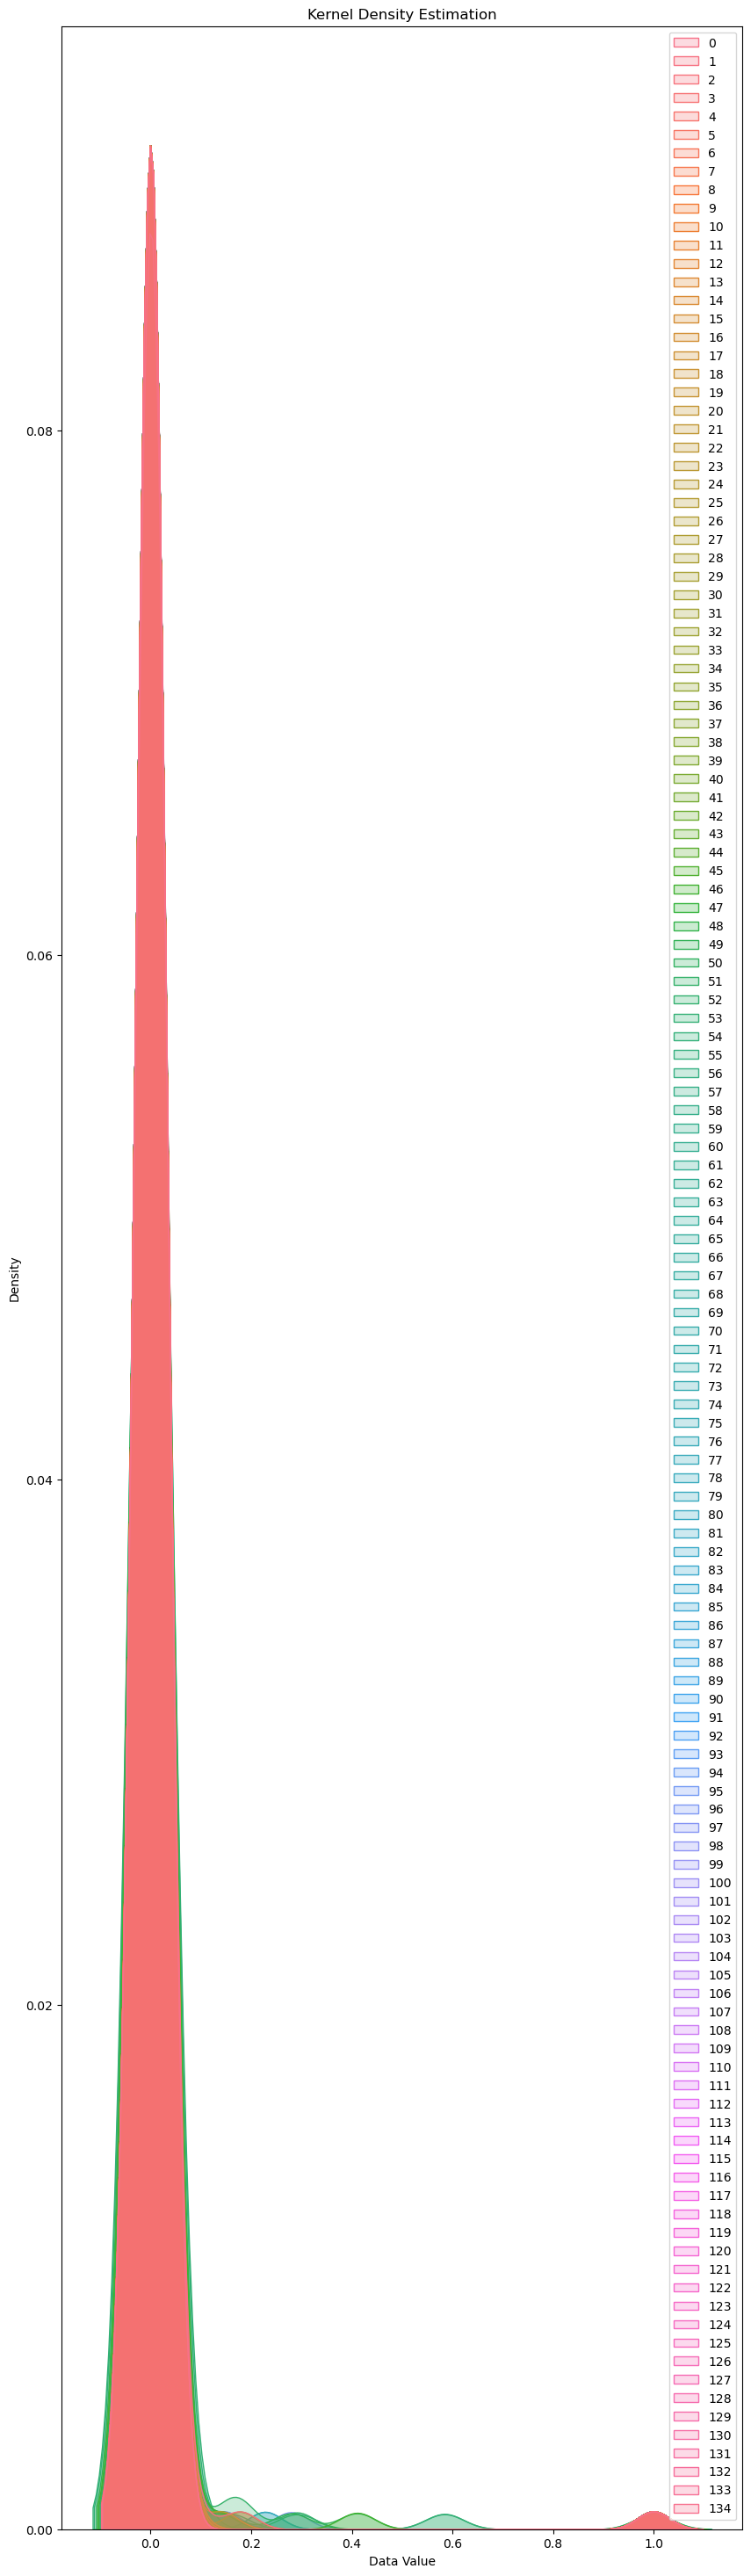

In [15]:
plt.figure(figsize=(10, 37))
sns.kdeplot(rbf, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Kernel RBF untuk Multiclass Ngelegena

In [16]:
sigma_ngelegena = 2

def ngelegena(array_ngelegena):
    array_rbf = np.zeros((len(array_ngelegena), len(array_ngelegena)))
    for i in range (len(array_rbf)):
        for j in range (len(array_rbf[i])):
            array_rbf[i, j] = math.exp(-(pow((array_ngelegena[i][0] - array_ngelegena[j][0]), 2)
                                        + pow((array_ngelegena[i][1] - array_ngelegena[j][1]), 2)
                                        + pow((array_ngelegena[i][2] - array_ngelegena[j][2]), 2)
                                        + pow((array_ngelegena[i][3] - array_ngelegena[j][3]), 2)
                                        + pow((array_ngelegena[i][4] - array_ngelegena[j][4]), 2)
                                        + pow((array_ngelegena[i][5] - array_ngelegena[j][5]), 2)
                                        + pow((array_ngelegena[i][6] - array_ngelegena[j][6]), 2)
                                        + pow((array_ngelegena[i][7] - array_ngelegena[j][7]), 2)
                                        + pow((array_ngelegena[i][8] - array_ngelegena[j][8]), 2)
                                        + pow((array_ngelegena[i][9] - array_ngelegena[j][9]), 2)
                                        + pow((array_ngelegena[i][10] - array_ngelegena[j][10]), 2)
                                        + pow((array_ngelegena[i][11] - array_ngelegena[j][11]), 2)) / (2 * pow(sigma_ngelegena, 2)))
    return array_rbf

rbf_ngelegena = ngelegena(array_ngelegena)
print(rbf_ngelegena)

[[1.00000000e+00 1.44691306e-33 3.42380605e-34 ... 1.19186690e-44
  2.54444662e-25 1.31184310e-81]
 [1.44691306e-33 1.00000000e+00 1.95403495e-26 ... 1.99678758e-60
  2.37402934e-30 3.70371111e-33]
 [3.42380605e-34 1.95403495e-26 1.00000000e+00 ... 6.51151835e-13
  5.46419435e-13 1.07385679e-40]
 ...
 [1.19186690e-44 1.99678758e-60 6.51151835e-13 ... 1.00000000e+00
  4.12070873e-12 8.65518582e-68]
 [2.54444662e-25 2.37402934e-30 5.46419435e-13 ... 4.12070873e-12
  1.00000000e+00 7.20944179e-45]
 [1.31184310e-81 3.70371111e-33 1.07385679e-40 ... 8.65518582e-68
  7.20944179e-45 1.00000000e+00]]


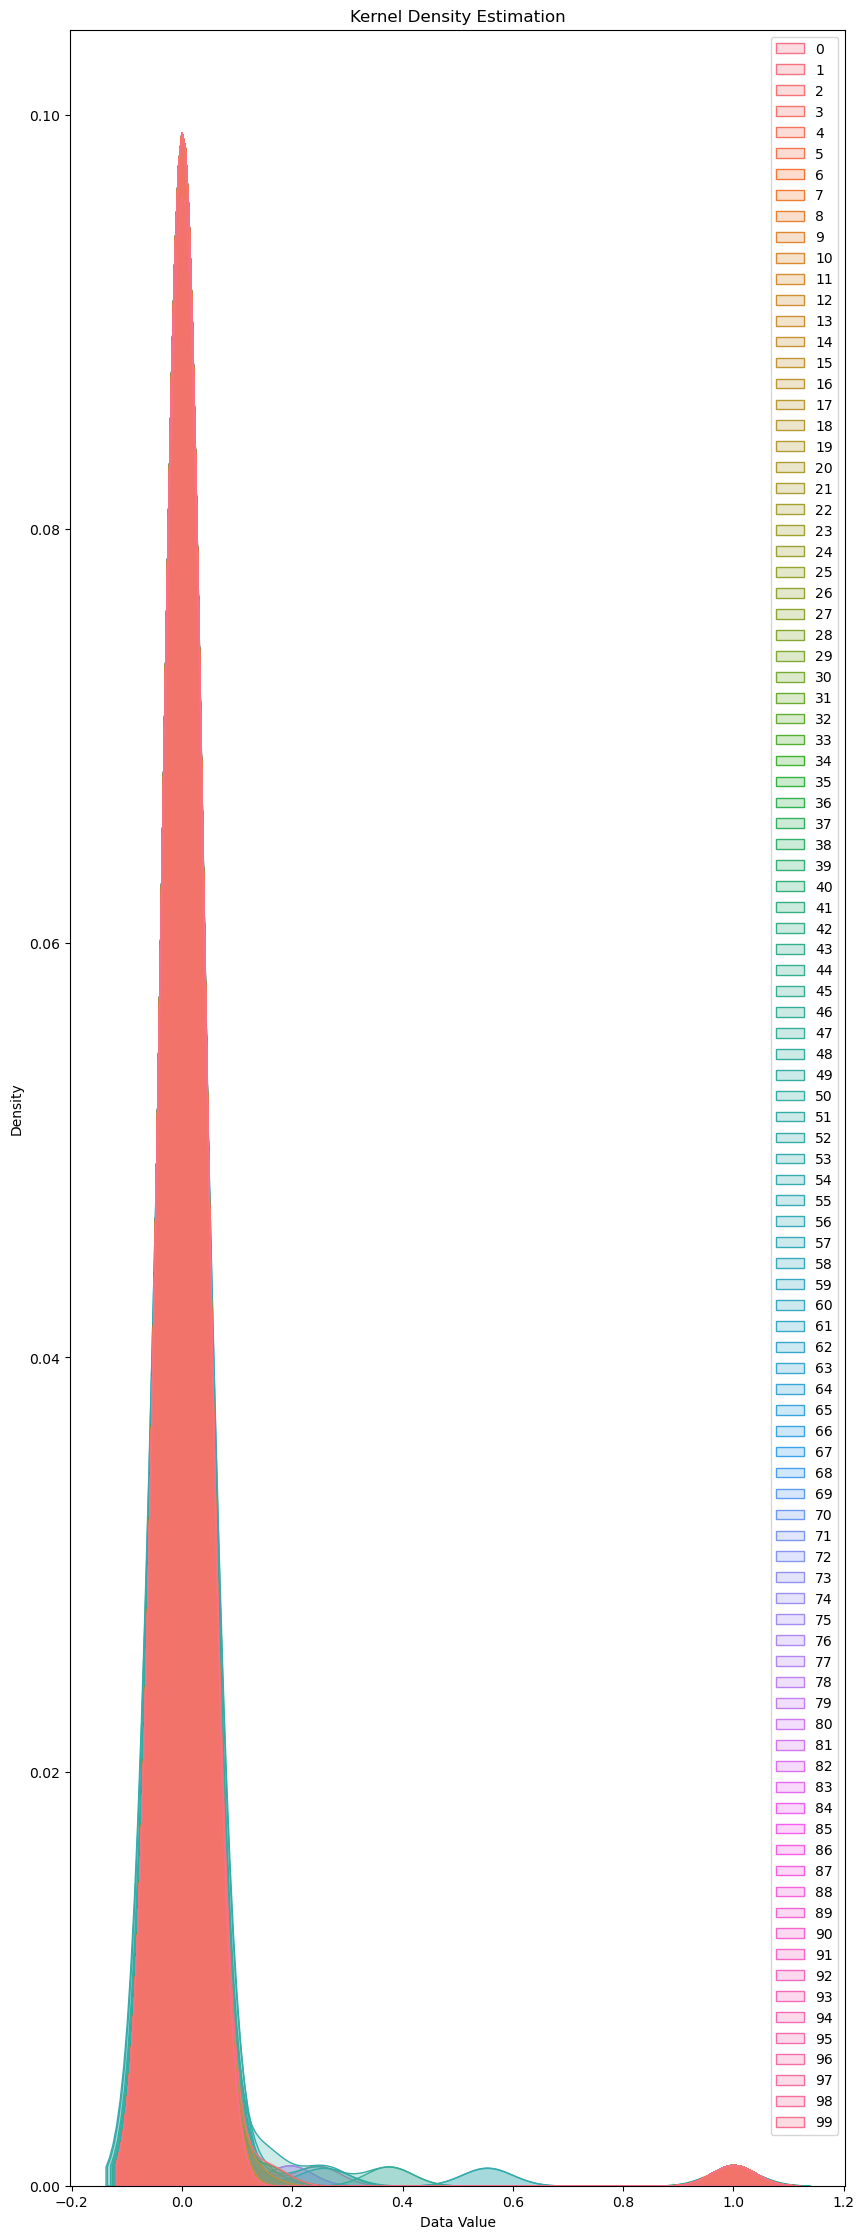

In [17]:
plt.figure(figsize=(10, 28))
sns.kdeplot(rbf_ngelegena, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Kernel RBF untuk Multiclass Murda

In [18]:
sigma_huruf = 3

def murda(array_murda):
    array_rbf = np.zeros((len(array_murda), len(array_murda)))
    for i in range (len(array_rbf)):
        for j in range (len(array_rbf[i])):
            array_rbf[i, j] = math.exp(-(pow((array_murda[i][0] - array_murda[j][0]), 2)
                                        + pow((array_murda[i][1] - array_murda[j][1]), 2)
                                        + pow((array_murda[i][2] - array_murda[j][2]), 2)
                                        + pow((array_murda[i][3] - array_murda[j][3]), 2)
                                        + pow((array_murda[i][4] - array_murda[j][4]), 2)
                                        + pow((array_murda[i][5] - array_murda[j][5]), 2)
                                        + pow((array_murda[i][6] - array_murda[j][6]), 2)
                                        + pow((array_murda[i][7] - array_murda[j][7]), 2)
                                        + pow((array_murda[i][8] - array_murda[j][8]), 2)
                                        + pow((array_murda[i][9] - array_murda[j][9]), 2)
                                        + pow((array_murda[i][10] - array_murda[j][10]), 2)
                                        + pow((array_murda[i][11] - array_murda[j][11]), 2)) / (2 * pow(sigma_huruf, 2)))
    return array_rbf

rbf_murda = murda(array_murda)
print(rbf_murda)

[[1.00000000e+00 1.09619646e-09 7.65669043e-04 ... 1.50586456e-20
  1.04479619e-15 1.08926132e-35]
 [1.09619646e-09 1.00000000e+00 3.67546182e-07 ... 7.66068144e-16
  1.82043031e-16 3.63338980e-18]
 [7.65669043e-04 3.67546182e-07 1.00000000e+00 ... 4.83728963e-25
  3.01786784e-11 6.14204926e-22]
 ...
 [1.50586456e-20 7.66068144e-16 4.83728963e-25 ... 1.00000000e+00
  1.38219957e-16 6.04715849e-33]
 [1.04479619e-15 1.82043031e-16 3.01786784e-11 ... 1.38219957e-16
  1.00000000e+00 6.39567005e-14]
 [1.08926132e-35 3.63338980e-18 6.14204926e-22 ... 6.04715849e-33
  6.39567005e-14 1.00000000e+00]]


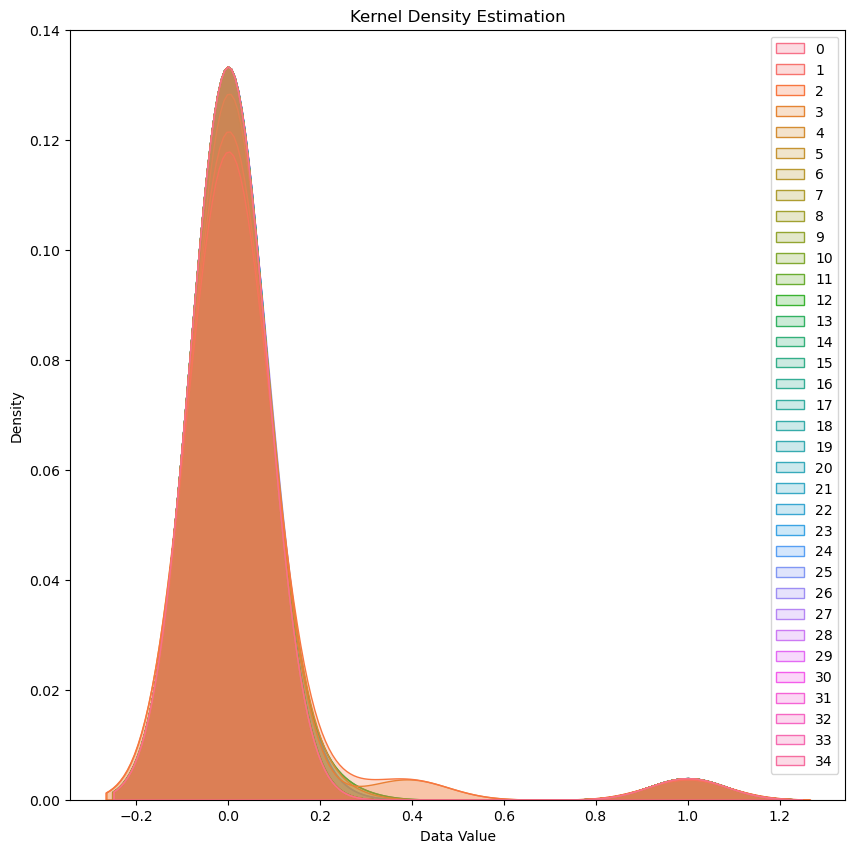

In [19]:
plt.figure(figsize=(10, 10))
sns.kdeplot(rbf_murda, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Matriks Hessian

In [20]:
hessian = np.zeros((len(rbf), len(rbf)))
hessian_ha = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_na = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ca = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ra = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ka = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_da = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ta = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_sa = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_wa = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_la = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_pa = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_dha = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ja = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ya = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_nya = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ma = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ga = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ba = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_tha = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_nga = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_namurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_kamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_tamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_samurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_pamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_gamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_bamurda = np.zeros((len(rbf_murda), len(rbf_murda)))

In [21]:
lamda = 28

lamda_murda = 50

lamda_jenis = 20

for i in range(len(rbf)):
    for j in range(len(rbf)):
        hessian[i, j] = model[j][12] * model[i][12] * (rbf[i][j] + (pow(lamda_jenis, 2)))
        
for i in range(len(rbf_ngelegena)):
    for j in range(len(rbf_ngelegena)):
        hessian_ha[i, j] = model_ha[j][12] * model_ha[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_na[i, j] = model_na[j][12] * model_na[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ca[i, j] = model_ca[j][12] * model_ca[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ra[i, j] = model_ra[j][12] * model_ra[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ka[i, j] = model_ka[j][12] * model_ka[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_da[i, j] = model_da[j][12] * model_da[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ta[i, j] = model_ta[j][12] * model_ta[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))       
        hessian_sa[i, j] = model_sa[j][12] * model_sa[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_wa[i, j] = model_wa[j][12] * model_wa[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_la[i, j] = model_la[j][12] * model_la[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_pa[i, j] = model_pa[j][12] * model_pa[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_dha[i, j] = model_dha[j][12] * model_dha[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ja[i, j] = model_ja[j][12] * model_ja[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ya[i, j] = model_ya[j][12] * model_ya[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_nya[i, j] = model_nya[j][12] * model_nya[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ma[i, j] = model_ma[j][12] * model_ma[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ga[i, j] = model_ga[j][12] * model_ga[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ba[i, j] = model_ba[j][12] * model_ba[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_tha[i, j] = model_tha[j][12] * model_tha[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_nga[i, j] = model_nga[j][12] * model_nga[i][12] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        
for i in range(len(rbf_murda)):
    for j in range(len(rbf_murda)):
        hessian_namurda[i, j] = model_namurda[j][12] * model_namurda[i][12] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_kamurda[i, j] = model_kamurda[j][12] * model_kamurda[i][12] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_tamurda[i, j] = model_tamurda[j][12] * model_tamurda[i][12] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_samurda[i, j] = model_samurda[j][12] * model_samurda[i][12] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))  
        hessian_pamurda[i, j] = model_pamurda[j][12] * model_pamurda[i][12] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_gamurda[i, j] = model_gamurda[j][12] * model_gamurda[i][12] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))  
        hessian_bamurda[i, j] = model_bamurda[j][12] * model_bamurda[i][12] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))  

print("MATRIKS HESSIAN \n", hessian, "\n")
print("MATRIKS HESSIAN HA \n", hessian_ha, "\n")
print("MATRIKS HESSIAN NA MURDA \n", hessian_namurda)

MATRIKS HESSIAN 
 [[ 401.  400.  400. ... -400. -400. -400.]
 [ 400.  401.  400. ... -400. -400. -400.]
 [ 400.  400.  401. ... -400. -400. -400.]
 ...
 [-400. -400. -400. ...  401.  400.  400.]
 [-400. -400. -400. ...  400.  401.  400.]
 [-400. -400. -400. ...  400.  400.  401.]] 

MATRIKS HESSIAN HA 
 [[ 785.  784.  784. ... -784. -784. -784.]
 [ 784.  785.  784. ... -784. -784. -784.]
 [ 784.  784.  785. ... -784. -784. -784.]
 ...
 [-784. -784. -784. ...  785.  784.  784.]
 [-784. -784. -784. ...  784.  785.  784.]
 [-784. -784. -784. ...  784.  784.  785.]] 

MATRIKS HESSIAN NA MURDA 
 [[ 2501.          2500.          2500.00076567 ... -2500.
  -2500.         -2500.        ]
 [ 2500.          2501.          2500.00000037 ... -2500.
  -2500.         -2500.        ]
 [ 2500.00076567  2500.00000037  2501.         ... -2500.
  -2500.         -2500.        ]
 ...
 [-2500.         -2500.         -2500.         ...  2501.
   2500.          2500.        ]
 [-2500.         -2500.         -

#### Mencari Nilai Ei, Delta Alpha dan Ai 

In [22]:
C_murda = 1
gamma_murda = 0.0001
epsilon_murda = 0.01

C = 1
gamma = 0.0001
epsilon = 0.01

C_jenis = 2
gamma_jenis = 0.0001
epsilon_jenis = 0.01

alpha = [0] * len(hessian)
delta_alpha = [0] * len(hessian)
temp_alpha = [0] * len(hessian)
ei = np.zeros(len(hessian))

alpha_ha = [0] * len(hessian_ha)
delta_alpha_ha = [0] * len(hessian_ha)
temp_alpha_ha = [0] * len(hessian_ha)
ei_ha = np.zeros(len(hessian_ha))

alpha_na = [0] * len(hessian_ha)
delta_alpha_na = [0] * len(hessian_ha)
temp_alpha_na = [0] * len(hessian_ha)
ei_na = np.zeros(len(hessian_ha))

alpha_ca = [0] * len(hessian_ha)
delta_alpha_ca = [0] * len(hessian_ha)
temp_alpha_ca = [0] * len(hessian_ha)
ei_ca = np.zeros(len(hessian_ha))

alpha_ra = [0] * len(hessian_ha)
delta_alpha_ra = [0] * len(hessian_ha)
temp_alpha_ra = [0] * len(hessian_ha)
ei_ra = np.zeros(len(hessian_ha))

alpha_ka = [0] * len(hessian_ha)
delta_alpha_ka = [0] * len(hessian_ha)
temp_alpha_ka = [0] * len(hessian_ha)
ei_ka = np.zeros(len(hessian_ha))

alpha_da = [0] * len(hessian_ha)
delta_alpha_da = [0] * len(hessian_ha)
temp_alpha_da = [0] * len(hessian_ha)
ei_da = np.zeros(len(hessian_ha))

alpha_ta = [0] * len(hessian_ha)
delta_alpha_ta = [0] * len(hessian_ha)
temp_alpha_ta = [0] * len(hessian_ha)
ei_ta = np.zeros(len(hessian_ha))

alpha_sa = [0] * len(hessian_ha)
delta_alpha_sa = [0] * len(hessian_ha)
temp_alpha_sa = [0] * len(hessian_ha)
ei_sa = np.zeros(len(hessian_ha))

alpha_wa = [0] * len(hessian_ha)
delta_alpha_wa = [0] * len(hessian_ha)
temp_alpha_wa = [0] * len(hessian_ha)
ei_wa = np.zeros(len(hessian_ha))

alpha_la = [0] * len(hessian_ha)
delta_alpha_la = [0] * len(hessian_ha)
temp_alpha_la = [0] * len(hessian_ha)
ei_la = np.zeros(len(hessian_ha))

alpha_pa = [0] * len(hessian_ha)
delta_alpha_pa = [0] * len(hessian_ha)
temp_alpha_pa = [0] * len(hessian_ha)
ei_pa = np.zeros(len(hessian_ha))

alpha_dha = [0] * len(hessian_ha)
delta_alpha_dha = [0] * len(hessian_ha)
temp_alpha_dha = [0] * len(hessian_ha)
ei_dha = np.zeros(len(hessian_ha))

alpha_ja = [0] * len(hessian_ha)
delta_alpha_ja = [0] * len(hessian_ha)
temp_alpha_ja = [0] * len(hessian_ha)
ei_ja = np.zeros(len(hessian_ha))

alpha_ya = [0] * len(hessian_ha)
delta_alpha_ya = [0] * len(hessian_ha)
temp_alpha_ya = [0] * len(hessian_ha)
ei_ya = np.zeros(len(hessian_ha))

alpha_nya = [0] * len(hessian_ha)
delta_alpha_nya = [0] * len(hessian_ha)
temp_alpha_nya = [0] * len(hessian_ha)
ei_nya = np.zeros(len(hessian_ha))

alpha_ma = [0] * len(hessian_ha)
delta_alpha_ma = [0] * len(hessian_ha)
temp_alpha_ma = [0] * len(hessian_ha)
ei_ma = np.zeros(len(hessian_ha))

alpha_ga = [0] * len(hessian_ha)
delta_alpha_ga = [0] * len(hessian_ha)
temp_alpha_ga = [0] * len(hessian_ha)
ei_ga = np.zeros(len(hessian_ha))

alpha_ba = [0] * len(hessian_ha)
delta_alpha_ba = [0] * len(hessian_ha)
temp_alpha_ba = [0] * len(hessian_ha)
ei_ba = np.zeros(len(hessian_ha))

alpha_tha = [0] * len(hessian_ha)
delta_alpha_tha = [0] * len(hessian_ha)
temp_alpha_tha = [0] * len(hessian_ha)
ei_tha = np.zeros(len(hessian_ha))

alpha_nga = [0] * len(hessian_ha)
delta_alpha_nga = [0] * len(hessian_ha)
temp_alpha_nga = [0] * len(hessian_ha)
ei_nga = np.zeros(len(hessian_ha))

alpha_namurda = [0] * len(hessian_namurda)
delta_alpha_namurda = [0] * len(hessian_namurda)
temp_alpha_namurda = [0] * len(hessian_namurda)
ei_namurda = np.zeros(len(hessian_namurda))

alpha_kamurda = [0] * len(hessian_namurda)
delta_alpha_kamurda = [0] * len(hessian_namurda)
temp_alpha_kamurda = [0] * len(hessian_namurda)
ei_kamurda = np.zeros(len(hessian_namurda))

alpha_tamurda = [0] * len(hessian_namurda)
delta_alpha_tamurda = [0] * len(hessian_namurda)
temp_alpha_tamurda = [0] * len(hessian_namurda)
ei_tamurda = np.zeros(len(hessian_namurda))

alpha_samurda = [0] * len(hessian_namurda)
delta_alpha_samurda = [0] * len(hessian_namurda)
temp_alpha_samurda = [0] * len(hessian_namurda)
ei_samurda = np.zeros(len(hessian_namurda))

alpha_pamurda = [0] * len(hessian_namurda)
delta_alpha_pamurda = [0] * len(hessian_namurda)
temp_alpha_pamurda = [0] * len(hessian_namurda)
ei_pamurda = np.zeros(len(hessian_namurda))

alpha_gamurda = [0] * len(hessian_namurda)
delta_alpha_gamurda = [0] * len(hessian_namurda)
temp_alpha_gamurda = [0] * len(hessian_namurda)
ei_gamurda = np.zeros(len(hessian_namurda))

alpha_bamurda = [0] * len(hessian_namurda)
delta_alpha_bamurda = [0] * len(hessian_namurda)
temp_alpha_bamurda = [0] * len(hessian_namurda)
ei_bamurda = np.zeros(len(hessian_namurda))

In [23]:
iterasi = 0

while iterasi < 20:
    if delta_alpha[iterasi] <= epsilon_jenis:
        for i in range(len(hessian)):
            for j in range(len(hessian)):
                ei[i] += (temp_alpha[j] * hessian[i][j])

            delta_alpha[i] = min(max((gamma_jenis * (1 - ei[i])), alpha[i]), C_jenis - alpha[i])
            alpha[i] = alpha[i] + delta_alpha[i]

        for i in range(len(alpha)):
            temp_alpha[i] = alpha[i]
        iterasi += 1
    else:
        break
        
while iterasi < 20:
    if delta_alpha_ha[iterasi] <= epsilon:
        for i in range(len(hessian_ha)):
            for j in range(len(hessian_ha)):
                ei_ha[i] += (temp_alpha_ha[j] * hessian_ha[i][j])

            delta_alpha_ha[i] = min(max((gamma * (1 - ei_ha[i])), alpha_ha[i]), C - alpha_ha[i])
            alpha_ha[i] = alpha_ha[i] + delta_alpha_ha[i]

        for i in range(len(alpha_ha)):
            temp_alpha_ha[i] = alpha_ha[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_na[iterasi] <= epsilon:
        for i in range(len(hessian_na)):
            for j in range(len(hessian_na)):
                ei_na[i] += (temp_alpha_na[j] * hessian_na[i][j])

            delta_alpha_na[i] = min(max((gamma * (1 - ei_na[i])), alpha_na[i]), C - alpha_na[i])
            alpha_na[i] = alpha_na[i] + delta_alpha_na[i]
        
        for i in range(len(alpha_na)):
            temp_alpha_na[i] = alpha_na[i]
        iterasi += 1
    else:
        break
    
iterasi = 0
while iterasi < 20:
    if delta_alpha_ca[iterasi] <= epsilon:
        for i in range(len(hessian_ca)):
            for j in range(len(hessian_ca)):
                ei_ca[i] += (temp_alpha_ca[j] * hessian_ca[i][j])

            delta_alpha_ca[i] = min(max((gamma * (1 - ei_ca[i])), alpha_ca[i]), C - alpha_ca[i])
            alpha_ca[i] = alpha_ca[i] + delta_alpha_ca[i]
        
        for i in range(len(alpha_ca)):
            temp_alpha_ca[i] = alpha_ca[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_ra[iterasi] <= epsilon:
        for i in range(len(hessian_ra)):
            for j in range(len(hessian_ra)):
                ei_ra[i] += (temp_alpha_ra[j] * hessian_ra[i][j])

            delta_alpha_ra[i] = min(max((gamma * (1 - ei_ra[i])), alpha_ra[i]), C - alpha_ra[i])
            alpha_ra[i] = alpha_ra[i] + delta_alpha_ra[i]

        for i in range(len(alpha_ra)):
            temp_alpha_ra[i] = alpha_ra[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ka[iterasi] <= epsilon:
        for i in range(len(hessian_ka)):
            for j in range(len(hessian_ka)):
                ei_ka[i] += (temp_alpha_ka[j] * hessian_ka[i][j])

            delta_alpha_ka[i] = min(max((gamma * (1 - ei_ka[i])), alpha_ka[i]), C - alpha_ka[i])
            alpha_ka[i] = alpha_ka[i] + delta_alpha_ka[i]

        for i in range(len(alpha_ka)):
            temp_alpha_ka[i] = alpha_ka[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_da[iterasi] <= epsilon:
        for i in range(len(hessian_da)):
            for j in range(len(hessian_da)):
                ei_da[i] += (temp_alpha_da[j] * hessian_da[i][j])

            delta_alpha_da[i] = min(max((gamma * (1 - ei_da[i])), alpha_da[i]), C - alpha_da[i])
            alpha_da[i] = alpha_da[i] + delta_alpha_da[i]

        for i in range(len(alpha_da)):
            temp_alpha_da[i] = alpha_da[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_ta[iterasi] <= epsilon:
        for i in range(len(hessian_ta)):
            for j in range(len(hessian_ta)):
                ei_ta[i] += (temp_alpha_ta[j] * hessian_ta[i][j])

            delta_alpha_ta[i] = min(max((gamma * (1 - ei_ta[i])), alpha_ta[i]), C - alpha_ta[i])
            alpha_ta[i] = alpha_ta[i] + delta_alpha_ta[i]

        for i in range(len(alpha_ta)):
            temp_alpha_ta[i] = alpha_ta[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_sa[iterasi] <= epsilon:
        for i in range(len(hessian_sa)):
            for j in range(len(hessian_sa)):
                ei_sa[i] += (temp_alpha_sa[j] * hessian_sa[i][j])

            delta_alpha_sa[i] = min(max((gamma * (1 - ei_sa[i])), alpha_sa[i]), C - alpha_sa[i])
            alpha_sa[i] = alpha_sa[i] + delta_alpha_sa[i]

        for i in range(len(alpha_sa)):
            temp_alpha_sa[i] = alpha_sa[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_wa[iterasi] <= epsilon:
        for i in range(len(hessian_wa)):
            for j in range(len(hessian_wa)):
                ei_wa[i] += (temp_alpha_wa[j] * hessian_wa[i][j])

            delta_alpha_wa[i] = min(max((gamma * (1 - ei_wa[i])), alpha_wa[i]), C - alpha_wa[i])
            alpha_wa[i] = alpha_wa[i] + delta_alpha_wa[i]

        for i in range(len(alpha_wa)):
            temp_alpha_wa[i] = alpha_wa[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_la[iterasi] <= epsilon:
        for i in range(len(hessian_la)):
            for j in range(len(hessian_la)):
                ei_la[i] += (temp_alpha_la[j] * hessian_la[i][j])

            delta_alpha_la[i] = min(max((gamma * (1 - ei_la[i])), alpha_la[i]), C - alpha_la[i])
            alpha_la[i] = alpha_la[i] + delta_alpha_la[i]

        for i in range(len(alpha_la)):
            temp_alpha_la[i] = alpha_la[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_pa[iterasi] <= epsilon:
        for i in range(len(hessian_pa)):
            for j in range(len(hessian_pa)):
                ei_pa[i] += (temp_alpha_pa[j] * hessian_pa[i][j])

            delta_alpha_pa[i] = min(max((gamma * (1 - ei_pa[i])), alpha_pa[i]), C - alpha_pa[i])
            alpha_pa[i] = alpha_pa[i] + delta_alpha_pa[i]

        for i in range(len(alpha_pa)):
            temp_alpha_pa[i] = alpha_pa[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_dha[iterasi] <= epsilon:
        for i in range(len(hessian_dha)):
            for j in range(len(hessian_dha)):
                ei_dha[i] += (temp_alpha_dha[j] * hessian_dha[i][j])

            delta_alpha_dha[i] = min(max((gamma * (1 - ei_dha[i])), alpha_dha[i]), C - alpha_dha[i])
            alpha_dha[i] = alpha_dha[i] + delta_alpha_dha[i]

        for i in range(len(alpha_dha)):
            temp_alpha_dha[i] = alpha_dha[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ja[iterasi] <= epsilon:
        for i in range(len(hessian_ja)):
            for j in range(len(hessian_ja)):
                ei_ja[i] += (temp_alpha_ja[j] * hessian_ja[i][j])

            delta_alpha_ja[i] = min(max((gamma * (1 - ei_ja[i])), alpha_ja[i]), C - alpha_ja[i])
            alpha_ja[i] = alpha_ja[i] + delta_alpha_ja[i]

        for i in range(len(alpha_ja)):
            temp_alpha_ja[i] = alpha_ja[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_ya[iterasi] <= epsilon:
        for i in range(len(hessian_ya)):
            for j in range(len(hessian_ya)):
                ei_ya[i] += (temp_alpha_ya[j] * hessian_ya[i][j])

            delta_alpha_ya[i] = min(max((gamma * (1 - ei_ya[i])), alpha_ya[i]), C - alpha_ya[i])
            alpha_ya[i] = alpha_ya[i] + delta_alpha_ya[i]

        for i in range(len(alpha_ya)):
            temp_alpha_ya[i] = alpha_ya[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_nya[iterasi] <= epsilon:
        for i in range(len(hessian_nya)):
            for j in range(len(hessian_nya)):
                ei_nya[i] += (temp_alpha_nya[j] * hessian_nya[i][j])

            delta_alpha_nya[i] = min(max((gamma * (1 - ei_nya[i])), alpha_nya[i]), C - alpha_nya[i])
            alpha_nya[i] = alpha_nya[i] + delta_alpha_nya[i]

        for i in range(len(alpha_nya)):
            temp_alpha_nya[i] = alpha_nya[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ma[iterasi] <= epsilon:
        for i in range(len(hessian_ma)):
            for j in range(len(hessian_ma)):
                ei_ma[i] += (temp_alpha_ma[j] * hessian_ma[i][j])

            delta_alpha_ma[i] = min(max((gamma * (1 - ei_ma[i])), alpha_ma[i]), C - alpha_ma[i])
            alpha_ma[i] = alpha_ma[i] + delta_alpha_ma[i]

        for i in range(len(alpha_ma)):
            temp_alpha_ma[i] = alpha_ma[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ga[iterasi] <= epsilon:
        for i in range(len(hessian_ga)):
            for j in range(len(hessian_ga)):
                ei_ga[i] += (temp_alpha_ga[j] * hessian_ga[i][j])

            delta_alpha_ga[i] = min(max((gamma * (1 - ei_ga[i])), alpha_ga[i]), C - alpha_ga[i])
            alpha_ga[i] = alpha_ga[i] + delta_alpha_ga[i]

        for i in range(len(alpha_ga)):
            temp_alpha_ga[i] = alpha_ga[i]
        iterasi += 1
    else:
        break
    
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ba[iterasi] <= epsilon:
        for i in range(len(hessian_ba)):
            for j in range(len(hessian_ba)):
                ei_ba[i] += (temp_alpha_ba[j] * hessian_ba[i][j])

            delta_alpha_ba[i] = min(max((gamma * (1 - ei_ba[i])), alpha_ba[i]), C - alpha_ba[i])
            alpha_ba[i] = alpha_ba[i] + delta_alpha_ba[i]

        for i in range(len(alpha_ba)):
            temp_alpha_ba[i] = alpha_ba[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_tha[iterasi] <= epsilon:
        for i in range(len(hessian_tha)):
            for j in range(len(hessian_tha)):
                ei_tha[i] += (temp_alpha_tha[j] * hessian_tha[i][j])

            delta_alpha_tha[i] = min(max((gamma * (1 - ei_tha[i])), alpha_tha[i]), C - alpha_tha[i])
            alpha_tha[i] = alpha_tha[i] + delta_alpha_tha[i]

        for i in range(len(alpha_tha)):
            temp_alpha_tha[i] = alpha_tha[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_nga[iterasi] <= epsilon:
        for i in range(len(hessian_nga)):
            for j in range(len(hessian_nga)):
                ei_nga[i] += (temp_alpha_nga[j] * hessian_nga[i][j])

            delta_alpha_nga[i] = min(max((gamma * (1 - ei_nga[i])), alpha_nga[i]), C - alpha_nga[i])
            alpha_nga[i] = alpha_nga[i] + delta_alpha_nga[i]

        for i in range(len(alpha_nga)):
            temp_alpha_nga[i] = alpha_nga[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_namurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_namurda)):
            for j in range(len(hessian_namurda)):
                ei_namurda[i] += (temp_alpha_namurda[j] * hessian_namurda[i][j])

            delta_alpha_namurda[i] = min(max((gamma_murda * (1 - ei_namurda[i])), alpha_namurda[i]), C_murda - alpha_namurda[i])
            alpha_namurda[i] = alpha_namurda[i] + delta_alpha_namurda[i]

        for i in range(len(alpha_namurda)):
            temp_alpha_namurda[i] = alpha_namurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_kamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_kamurda)):
            for j in range(len(hessian_kamurda)):
                ei_kamurda[i] += (temp_alpha_kamurda[j] * hessian_kamurda[i][j])

            delta_alpha_kamurda[i] = min(max((gamma_murda * (1 - ei_kamurda[i])), alpha_kamurda[i]), C_murda - alpha_kamurda[i])
            alpha_kamurda[i] = alpha_kamurda[i] + delta_alpha_kamurda[i]

        for i in range(len(alpha_kamurda)):
            temp_alpha_kamurda[i] = alpha_kamurda[i]
        iterasi += 1
    else:
        break
    
iterasi = 0
while iterasi < 20:
    if delta_alpha_tamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_tamurda)):
            for j in range(len(hessian_tamurda)):
                ei_tamurda[i] += (temp_alpha_tamurda[j] * hessian_tamurda[i][j])

            delta_alpha_tamurda[i] = min(max((gamma_murda * (1 - ei_tamurda[i])), alpha_tamurda[i]), C_murda - alpha_tamurda[i])
            alpha_tamurda[i] = alpha_tamurda[i] + delta_alpha_tamurda[i]

        for i in range(len(alpha_tamurda)):
            temp_alpha_tamurda[i] = alpha_tamurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_samurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_samurda)):
            for j in range(len(hessian_samurda)):
                ei_samurda[i] += (temp_alpha_samurda[j] * hessian_samurda[i][j])

            delta_alpha_samurda[i] = min(max((gamma_murda * (1 - ei_samurda[i])), alpha_samurda[i]), C_murda - alpha_samurda[i])
            alpha_samurda[i] = alpha_samurda[i] + delta_alpha_samurda[i]

        for i in range(len(alpha_samurda)):
            temp_alpha_samurda[i] = alpha_samurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_pamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_pamurda)):
            for j in range(len(hessian_pamurda)):
                ei_pamurda[i] += (temp_alpha_pamurda[j] * hessian_pamurda[i][j])

            delta_alpha_pamurda[i] = min(max((gamma_murda * (1 - ei_pamurda[i])), alpha_pamurda[i]), C_murda - alpha_pamurda[i])
            alpha_pamurda[i] = alpha_pamurda[i] + delta_alpha_pamurda[i]

        for i in range(len(alpha_pamurda)):
            temp_alpha_pamurda[i] = alpha_pamurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_gamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_gamurda)):
            for j in range(len(hessian_gamurda)):
                ei_gamurda[i] += (temp_alpha_gamurda[j] * hessian_gamurda[i][j])

            delta_alpha_gamurda[i] = min(max((gamma_murda * (1 - ei_gamurda[i])), alpha_gamurda[i]), C_murda - alpha_gamurda[i])
            alpha_gamurda[i]  = alpha_gamurda[i] + delta_alpha_gamurda[i]

        for i in range(len(alpha_gamurda)):
            temp_alpha_gamurda[i] = alpha_gamurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_bamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_bamurda)):
            for j in range(len(hessian_bamurda)):
                ei_bamurda[i] += (temp_alpha_bamurda[j] * hessian_bamurda[i][j])

            delta_alpha_bamurda[i] = min(max((gamma_murda * (1 - ei_bamurda[i])), alpha_bamurda[i]), C_murda - alpha_bamurda[i])
            alpha_bamurda[i] = alpha_bamurda[i] + delta_alpha_bamurda[i]

        for i in range(len(alpha_bamurda)):
            temp_alpha_bamurda[i] = alpha_bamurda[i]
        iterasi += 1
    else:
        break

print("Ei BINARY \n", ei, "\n")
print("Ai BINARY \n", alpha, "\n")
print("DELTA ALPHA BINARY \n", delta_alpha, "\n")
print("Ei HA \n", ei_ha, "\n")
print("Ai HA \n", alpha_ha, "\n")
print("DELTA ALPHA HA \n", delta_alpha_ha, "\n")
print("Ei NA MURDA \n", ei_namurda, "\n")
print("Ai NA MURDA \n", alpha_namurda, "\n")
print("DELTA ALPHA NA MURDA \n", delta_alpha_namurda)

Ei BINARY 
 [ 151.39996229  151.40683671  151.40032917  151.40033697  151.39996424
  151.40036178  151.39781963  151.40038402  151.39996163  151.3999627
  151.39997301  151.40009834  151.3999669   151.39996664  151.39996294
  151.39988921  151.40001876  151.40016524  151.39788751  151.40456006
  151.4018647   151.39996229  151.39997383  151.40186471  151.39996317
  151.39998529  151.39998442  151.39996273  151.3999811   151.39996231
  151.3999739   151.39997513  151.40034083  151.39670462  151.39996347
  151.4000162   151.4001899   151.40454463  151.40477425  151.40014229
  151.39997407  151.39997054  151.39996237  151.39999918  151.39999524
  151.39999341  151.41455869  151.40532617  151.39996229  151.42117062
  151.39996915  151.41775487  151.402209    151.42464553  151.41991021
  151.39996718  151.3999548   151.40154404  151.40154407  151.39996232
  151.39996718  151.39998416  151.39996238  151.39993402  151.39996904
  151.39991058  151.40003068  151.39996229  151.40011455  151.4001

#### Mencari Nilai Bobot Max Positif dan Max Negatif dari Array Ai

In [24]:
positif = [0] * len(model)
negatif = [0] * len(model)

positif_ha = [0] * len(model_ha)
negatif_ha = [0] * len(model_ha)
positif_na = [0] * len(model_ha)
negatif_na = [0] * len(model_ha)
positif_ca = [0] * len(model_ha)
negatif_ca = [0] * len(model_ha)
positif_ra = [0] * len(model_ha)
negatif_ra = [0] * len(model_ha)
positif_ka = [0] * len(model_ha)
negatif_ka = [0] * len(model_ha)
positif_da = [0] * len(model_ha)
negatif_da = [0] * len(model_ha)
positif_ta = [0] * len(model_ha)
negatif_ta = [0] * len(model_ha)
positif_sa = [0] * len(model_ha)
negatif_sa = [0] * len(model_ha)
positif_wa = [0] * len(model_ha)
negatif_wa = [0] * len(model_ha)
positif_la = [0] * len(model_ha)
negatif_la = [0] * len(model_ha)
positif_pa = [0] * len(model_ha)
negatif_pa = [0] * len(model_ha)
positif_dha = [0] * len(model_ha)
negatif_dha = [0] * len(model_ha)
positif_ja = [0] * len(model_ha)
negatif_ja = [0] * len(model_ha)
positif_ya = [0] * len(model_ha)
negatif_ya = [0] * len(model_ha)
positif_nya = [0] * len(model_ha)
negatif_nya = [0] * len(model_ha)
positif_ma = [0] * len(model_ha)
negatif_ma = [0] * len(model_ha)
positif_ga = [0] * len(model_ha)
negatif_ga = [0] * len(model_ha)
positif_ba = [0] * len(model_ha)
negatif_ba = [0] * len(model_ha)
positif_tha = [0] * len(model_ha)
negatif_tha = [0] * len(model_ha)
positif_nga = [0] * len(model_ha)
negatif_nga = [0] * len(model_ha)

positif_namurda = [0] * len(model_namurda)
negatif_namurda = [0] * len(model_namurda)
positif_kamurda = [0] * len(model_namurda)
negatif_kamurda = [0] * len(model_namurda)
positif_tamurda = [0] * len(model_namurda)
negatif_tamurda = [0] * len(model_namurda)
positif_samurda = [0] * len(model_namurda)
negatif_samurda = [0] * len(model_namurda)
positif_pamurda = [0] * len(model_namurda)
negatif_pamurda = [0] * len(model_namurda)
positif_gamurda = [0] * len(model_namurda)
negatif_gamurda = [0] * len(model_namurda)
positif_bamurda = [0] * len(model_namurda)
negatif_bamurda = [0] * len(model_namurda)

In [25]:
for i in range(len(model)):
    if model[i][12] == 1:
        positif[i] = alpha[i]
    else :
        negatif[i] = alpha[i]

for i in range(len(model_ha)):
    if model_ha[i][12] == 1:
        positif_ha[i] = alpha_ha[i]
    else :
        negatif_ha[i] = alpha_ha[i]
        
for i in range(len(model_ha)):
    if model_na[i][12] == 1:
        positif_na[i] = alpha_na[i]
    else :
        negatif_na[i] = alpha_na[i]
        
for i in range(len(model_ha)):
    if model_ca[i][12] == 1:
        positif_ca[i] = alpha_ca[i]
    else :
        negatif_ca[i] = alpha_ca[i]
        
for i in range(len(model_ha)):
    if model_ra[i][12] == 1:
        positif_ra[i] = alpha_ra[i]
    else :
        negatif_ra[i] = alpha_ra[i]
        
for i in range(len(model_ha)):
    if model_ka[i][12] == 1:
        positif_ka[i] = alpha_ka[i]
    else :
        negatif_ka[i] = alpha_ka[i]
        
for i in range(len(model_ha)):
    if model_da[i][12] == 1:
        positif_da[i] = alpha_da[i]
    else :
        negatif_da[i] = alpha_da[i]
        
for i in range(len(model_ha)):
    if model_ta[i][12] == 1:
        positif_ta[i] = alpha_ta[i]
    else :
        negatif_ta[i] = alpha_ta[i]
        
for i in range(len(model_ha)):
    if model_sa[i][12] == 1:
        positif_sa[i] = alpha_sa[i]
    else :
        negatif_sa[i] = alpha_sa[i]   
        
for i in range(len(model_ha)):
    if model_wa[i][12] == 1:
        positif_wa[i] = alpha_wa[i]
    else :
        negatif_wa[i] = alpha_wa[i]
        
for i in range(len(model_ha)):
    if model_la[i][12] == 1:
        positif_la[i] = alpha_la[i]
    else :
        negatif_la[i] = alpha_la[i]
        
for i in range(len(model_ha)):
    if model_pa[i][12] == 1:
        positif_pa[i] = alpha_pa[i]
    else :
        negatif_pa[i] = alpha_pa[i]
        
for i in range(len(model_ha)):
    if model_dha[i][12] == 1:
        positif_dha[i] = alpha_dha[i]
    else :
        negatif_dha[i] = alpha_dha[i]
        
for i in range(len(model_ha)):
    if model_ja[i][12] == 1:
        positif_ja[i] = alpha_ja[i]
    else :
        negatif_ja[i] = alpha_ja[i]
        
for i in range(len(model_ha)):
    if model_ya[i][12] == 1:
        positif_ya[i] = alpha_ya[i]
    else :
        negatif_ya[i] = alpha_ya[i]
        
for i in range(len(model_ha)):
    if model_nya[i][12] == 1:
        positif_nya[i] = alpha_nya[i]
    else :
        negatif_nya[i] = alpha_nya[i]
        
for i in range(len(model_ha)):
    if model_ma[i][12] == 1:
        positif_ma[i] = alpha_ma[i]
    else :
        negatif_ma[i] = alpha_ma[i]
        
for i in range(len(model_ha)):
    if model_ga[i][12] == 1:
        positif_ga[i] = alpha_ga[i]
    else :
        negatif_ga[i] = alpha_ga[i]
        
for i in range(len(model_ha)):
    if model_ba[i][12] == 1:
        positif_ba[i] = alpha_ba[i]
    else :
        negatif_ba[i] = alpha_ba[i]
        
for i in range(len(model_ha)):
    if model_tha[i][12] == 1:
        positif_tha[i] = alpha_tha[i]
    else :
        negatif_tha[i] = alpha_tha[i]
        
for i in range(len(model_ha)):
    if model_nga[i][12] == 1:
        positif_nga[i] = alpha_nga[i]
    else :
        negatif_nga[i] = alpha_nga[i]
        
for i in range(len(model_namurda)):
    if model_namurda[i][12] == 1:
        positif_namurda[i] = alpha_namurda[i]
    else :
        negatif_namurda[i] = alpha_namurda[i]
        
for i in range(len(model_namurda)):
    if model_kamurda[i][12] == 1:
        positif_kamurda[i] = alpha_kamurda[i]
    else :
        negatif_kamurda[i] = alpha_kamurda[i]
        
for i in range(len(model_namurda)):
    if model_tamurda[i][12] == 1:
        positif_tamurda[i] = alpha_tamurda[i]
    else :
        negatif_tamurda[i] = alpha_tamurda[i]
        
for i in range(len(model_namurda)):
    if model_samurda[i][12] == 1:
        positif_samurda[i] = alpha_samurda[i]
    else :
        negatif_samurda[i] = alpha_samurda[i]   
        
for i in range(len(model_namurda)):
    if model_pamurda[i][12] == 1:
        positif_pamurda[i] = alpha_pamurda[i]
    else :
        negatif_pamurda[i] = alpha_pamurda[i]
        
for i in range(len(model_namurda)):
    if model_gamurda[i][12] == 1:
        positif_gamurda[i] = alpha_gamurda[i]
    else :
        negatif_gamurda[i] = alpha_gamurda[i]
        
for i in range(len(model_namurda)):
    if model_bamurda[i][12] == 1:
        positif_bamurda[i] = alpha_bamurda[i]
    else :
        negatif_bamurda[i] = alpha_bamurda[i]
        
print("POSITIF \n", positif, "\n")
print("NEGATIF \n", negatif, "\n")
print("POSITIF HA \n", positif_ha, "\n")
print("NEGATIF HA \n", negatif_ha, "\n")
print("POSITIF NA MURDA \n", positif_namurda, "\n")
print("NEGATIF NA MURDA \n", negatif_namurda)

POSITIF 
 [0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

NEGATIF 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
wxplus = max(positif)
wxmin = max(negatif)
indwxplus = positif.index(wxplus)
indwxmin = negatif.index(wxmin)

wxplus_ha = max(positif_ha)
wxmin_ha = max(negatif_ha)
indwxplus_ha = positif_ha.index(wxplus_ha)
indwxmin_ha = negatif_ha.index(wxmin_ha)

wxplus_na = max(positif_na)
wxmin_na = max(negatif_na)
indwxplus_na = positif_na.index(wxplus_na)
indwxmin_na = negatif_na.index(wxmin_na)

wxplus_ca = max(positif_ca)
wxmin_ca = max(negatif_ca)
indwxplus_ca = positif_ca.index(wxplus_ca)
indwxmin_ca = negatif_ca.index(wxmin_ca)

wxplus_ra = max(positif_ra)
wxmin_ra = max(negatif_ra)
indwxplus_ra = positif_ra.index(wxplus_ra)
indwxmin_ra = negatif_ra.index(wxmin_ra)

wxplus_ka = max(positif_ka)
wxmin_ka = max(negatif_ka)
indwxplus_ka = positif_ka.index(wxplus_ka)
indwxmin_ka = negatif_ka.index(wxmin_ka)

wxplus_da = max(positif_da)
wxmin_da = max(negatif_da)
indwxplus_da = positif_da.index(wxplus_da)
indwxmin_da = negatif_da.index(wxmin_da)

wxplus_ta = max(positif_ta)
wxmin_ta = max(negatif_ta)
indwxplus_ta = positif_ta.index(wxplus_ta)
indwxmin_ta = negatif_ta.index(wxmin_ta)

wxplus_sa = max(positif_sa)
wxmin_sa = max(negatif_sa)
indwxplus_sa = positif_sa.index(wxplus_sa)
indwxmin_sa = negatif_sa.index(wxmin_sa)

wxplus_wa = max(positif_wa)
wxmin_wa = max(negatif_wa)
indwxplus_wa = positif_wa.index(wxplus_wa)
indwxmin_wa = negatif_wa.index(wxmin_wa)

wxplus_la = max(positif_la)
wxmin_la = max(negatif_la)
indwxplus_la = positif_la.index(wxplus_la)
indwxmin_la = negatif_la.index(wxmin_la)

wxplus_pa = max(positif_pa)
wxmin_pa = max(negatif_pa)
indwxplus_pa = positif_pa.index(wxplus_pa)
indwxmin_pa = negatif_pa.index(wxmin_pa)

wxplus_dha = max(positif_dha)
wxmin_dha = max(negatif_dha)
indwxplus_dha = positif_dha.index(wxplus_dha)
indwxmin_dha = negatif_dha.index(wxmin_dha)

wxplus_ja = max(positif_ja)
wxmin_ja = max(negatif_ja)
indwxplus_ja = positif_ja.index(wxplus_ja)
indwxmin_ja = negatif_ja.index(wxmin_ja)

wxplus_ya = max(positif_ya)
wxmin_ya = max(negatif_ya)
indwxplus_ya = positif_ya.index(wxplus_ya)
indwxmin_ya = negatif_ya.index(wxmin_ya)

wxplus_nya = max(positif_nya)
wxmin_nya = max(negatif_nya)
indwxplus_nya = positif_nya.index(wxplus_nya)
indwxmin_nya = negatif_nya.index(wxmin_nya)

wxplus_ma = max(positif_ma)
wxmin_ma = max(negatif_ma)
indwxplus_ma = positif_ma.index(wxplus_ma)
indwxmin_ma = negatif_ma.index(wxmin_ma)

wxplus_ga = max(positif_ga)
wxmin_ga = max(negatif_ga)
indwxplus_ga = positif_ga.index(wxplus_ga)
indwxmin_ga = negatif_ga.index(wxmin_ga)

wxplus_ba = max(positif_ba)
wxmin_ba = max(negatif_ba)
indwxplus_ba = positif_ba.index(wxplus_ba)
indwxmin_ba = negatif_ba.index(wxmin_ba)

wxplus_tha = max(positif_tha)
wxmin_tha = max(negatif_tha)
indwxplus_tha = positif_tha.index(wxplus_tha)
indwxmin_tha = negatif_tha.index(wxmin_tha)

wxplus_nga = max(positif_nga)
wxmin_nga = max(negatif_nga)
indwxplus_nga = positif_nga.index(wxplus_nga)
indwxmin_nga = negatif_nga.index(wxmin_nga)

wxplus_namurda = max(positif_namurda)
wxmin_namurda = max(negatif_namurda)
indwxplus_namurda = positif_namurda.index(wxplus_namurda)
indwxmin_namurda = negatif_namurda.index(wxmin_namurda)

wxplus_kamurda = max(positif_kamurda)
wxmin_kamurda = max(negatif_kamurda)
indwxplus_kamurda = positif_kamurda.index(wxplus_kamurda)
indwxmin_kamurda = negatif_kamurda.index(wxmin_kamurda)

wxplus_tamurda = max(positif_tamurda)
wxmin_tamurda = max(negatif_tamurda)
indwxplus_tamurda = positif_tamurda.index(wxplus_tamurda)
indwxmin_tamurda = negatif_tamurda.index(wxmin_tamurda)

wxplus_samurda = max(positif_samurda)
wxmin_samurda = max(negatif_samurda)
indwxplus_samurda = positif_samurda.index(wxplus_samurda)
indwxmin_samurda = negatif_samurda.index(wxmin_samurda)

wxplus_pamurda = max(positif_pamurda)
wxmin_pamurda = max(negatif_pamurda)
indwxplus_pamurda = positif_pamurda.index(wxplus_pamurda)
indwxmin_pamurda = negatif_pamurda.index(wxmin_pamurda)

wxplus_gamurda = max(positif_gamurda)
wxmin_gamurda = max(negatif_gamurda)
indwxplus_gamurda = positif_gamurda.index(wxplus_gamurda)
indwxmin_gamurda = negatif_gamurda.index(wxmin_gamurda)

wxplus_bamurda = max(positif_bamurda)
wxmin_bamurda = max(negatif_bamurda)
indwxplus_bamurda = positif_bamurda.index(wxplus_bamurda)
indwxmin_bamurda = negatif_bamurda.index(wxmin_bamurda)

print("Index : ", indwxplus, " , Bobot Max Positif : ", wxplus, "\n")
print("Index : ", indwxmin, " , Bobot Max Negatif : ", wxmin, "\n")
print("Index Ha : ", indwxplus_ha, " , Bobot Max Positif Ha : ", wxplus_ha, "\n")
print("Index Ha : ", indwxmin_ha, " , Bobot Max Negatif Ha : ", wxmin_ha, "\n")
print("Index Na Murda : ", indwxplus_namurda, " , Bobot Max Positif Na Murda : ", wxplus_namurda, "\n")
print("Index Na Murda : ", indwxmin_namurda, " , Bobot Max Negatif Na Murda : ", wxmin_namurda)

Index :  0  , Bobot Max Positif :  0.0256 

Index :  101  , Bobot Max Negatif :  0.06246086163346028 

Index Ha :  1  , Bobot Max Positif Ha :  0.22086436375955337 

Index Ha :  5  , Bobot Max Negatif Ha :  0.0256 

Index Na Murda :  1  , Bobot Max Positif Na Murda :  0.1291944332866369 

Index Na Murda :  5  , Bobot Max Negatif Na Murda :  0.0256


#### Mencari Nilai Kernel Positif dan Negatif berdasarkan Index

In [27]:
indrbfplus = rbf[indwxplus]
indrbfmin = rbf[indwxmin]

indrbfplus_ha = rbf[indwxplus_ha]
indrbfmin_ha = rbf[indwxmin_ha]

indrbfplus_na = rbf[indwxplus_na]
indrbfmin_na = rbf[indwxmin_na]

indrbfplus_ca = rbf[indwxplus_ca]
indrbfmin_ca = rbf[indwxmin_ca]

indrbfplus_ra = rbf[indwxplus_ra]
indrbfmin_ra = rbf[indwxmin_ra]

indrbfplus_ka = rbf[indwxplus_ka]
indrbfmin_ka = rbf[indwxmin_ka]

indrbfplus_da = rbf[indwxplus_da]
indrbfmin_da = rbf[indwxmin_da]

indrbfplus_ta = rbf[indwxplus_ta]
indrbfmin_ta = rbf[indwxmin_ta]

indrbfplus_sa = rbf[indwxplus_sa]
indrbfmin_sa = rbf[indwxmin_sa]

indrbfplus_wa = rbf[indwxplus_wa]
indrbfmin_wa = rbf[indwxmin_wa]

indrbfplus_la = rbf[indwxplus_la]
indrbfmin_la = rbf[indwxmin_la]

indrbfplus_pa = rbf[indwxplus_pa]
indrbfmin_pa = rbf[indwxmin_pa]

indrbfplus_dha = rbf[indwxplus_dha]
indrbfmin_dha = rbf[indwxmin_dha]

indrbfplus_ja = rbf[indwxplus_ja]
indrbfmin_ja = rbf[indwxmin_ja]

indrbfplus_ya = rbf[indwxplus_ya]
indrbfmin_ya = rbf[indwxmin_ya]

indrbfplus_nya = rbf[indwxplus_nya]
indrbfmin_nya = rbf[indwxmin_nya]

indrbfplus_ma = rbf[indwxplus_ma]
indrbfmin_ma = rbf[indwxmin_ma]

indrbfplus_ga = rbf[indwxplus_ga]
indrbfmin_ga = rbf[indwxmin_ga]

indrbfplus_ba = rbf[indwxplus_ba]
indrbfmin_ba = rbf[indwxmin_ba]

indrbfplus_tha = rbf[indwxplus_tha]
indrbfmin_tha = rbf[indwxmin_tha]

indrbfplus_nga = rbf[indwxplus_nga]
indrbfmin_nga = rbf[indwxmin_nga]

indrbfplus_namurda = rbf[indwxplus_namurda]
indrbfmin_namurda = rbf[indwxmin_namurda]

indrbfplus_kamurda = rbf[indwxplus_kamurda]
indrbfmin_kamurda = rbf[indwxmin_kamurda]

indrbfplus_tamurda = rbf[indwxplus_tamurda]
indrbfmin_tamurda = rbf[indwxmin_tamurda]

indrbfplus_samurda = rbf[indwxplus_samurda]
indrbfmin_samurda = rbf[indwxmin_samurda]

indrbfplus_pamurda = rbf[indwxplus_pamurda]
indrbfmin_pamurda = rbf[indwxmin_pamurda]

indrbfplus_gamurda = rbf[indwxplus_gamurda]
indrbfmin_gamurda = rbf[indwxmin_gamurda]

indrbfplus_bamurda = rbf[indwxplus_bamurda]
indrbfmin_bamurda = rbf[indwxmin_bamurda]

print(indrbfplus)
print(indrbfmin)

[1.00000000e+000 1.63513356e-030 4.42398140e-031 1.11678715e-041
 4.42993569e-034 3.57983276e-055 3.88547864e-036 1.57876748e-055
 1.13124554e-055 2.48237841e-019 1.35964779e-044 5.36549575e-033
 3.87721545e-052 2.90374885e-064 1.61880704e-059 1.10864364e-065
 5.32662141e-075 1.79750373e-087 1.84280251e-066 8.15241114e-078
 8.18820838e-015 6.04414321e-098 3.14849401e-167 1.29914824e-015
 1.12820787e-027 1.91372539e-078 7.64983492e-100 8.73865160e-087
 1.17905439e-050 1.04483126e-035 2.10499531e-064 5.71679719e-187
 4.84584720e-175 3.17008530e-187 2.70186340e-026 4.73003563e-072
 9.88506916e-052 3.12839664e-040 1.12695210e-047 1.55745728e-035
 8.44063994e-056 8.52259671e-036 1.23519696e-082 1.48500162e-033
 1.74264289e-038 3.41870113e-031 1.60364343e-038 1.18498988e-032
 5.81397050e-009 9.87521132e-038 2.65458740e-041 6.50127101e-029
 3.28846284e-029 3.33063660e-027 8.58497977e-028 7.11261063e-034
 1.18208772e-197 1.12689041e-040 1.11095961e-041 7.91290952e-040
 1.67826928e-025 5.788019

In [28]:
h_wxplus = [0] * len(model)
h_wxmin = [0] * len(model)

h_wxplus_ha = [0] * len(model_ha)
h_wxmin_ha = [0] * len(model_ha)
h_wxplus_na = [0] * len(model_ha)
h_wxmin_na = [0] * len(model_ha)
h_wxplus_ca = [0] * len(model_ha)
h_wxmin_ca = [0] * len(model_ha)
h_wxplus_ra = [0] * len(model_ha)
h_wxmin_ra = [0] * len(model_ha)
h_wxplus_ka = [0] * len(model_ha)
h_wxmin_ka = [0] * len(model_ha)
h_wxplus_da = [0] * len(model_ha)
h_wxmin_da = [0] * len(model_ha)
h_wxplus_ta = [0] * len(model_ha)
h_wxmin_ta = [0] * len(model_ha)
h_wxplus_sa = [0] * len(model_ha)
h_wxmin_sa = [0] * len(model_ha)
h_wxplus_wa = [0] * len(model_ha)
h_wxmin_wa = [0] * len(model_ha)
h_wxplus_la = [0] * len(model_ha)
h_wxmin_la = [0] * len(model_ha)
h_wxplus_pa = [0] * len(model_ha)
h_wxmin_pa = [0] * len(model_ha)
h_wxplus_dha = [0] * len(model_ha)
h_wxmin_dha = [0] * len(model_ha)
h_wxplus_ja = [0] * len(model_ha)
h_wxmin_ja = [0] * len(model_ha)
h_wxplus_ya = [0] * len(model_ha)
h_wxmin_ya = [0] * len(model_ha)
h_wxplus_nya = [0] * len(model_ha)
h_wxmin_nya = [0] * len(model_ha)
h_wxplus_ma = [0] * len(model_ha)
h_wxmin_ma = [0] * len(model_ha)
h_wxplus_ga = [0] * len(model_ha)
h_wxmin_ga = [0] * len(model_ha)
h_wxplus_ba = [0] * len(model_ha)
h_wxmin_ba = [0] * len(model_ha)
h_wxplus_tha = [0] * len(model_ha)
h_wxmin_tha = [0] * len(model_ha)
h_wxplus_nga = [0] * len(model_ha)
h_wxmin_nga = [0] * len(model_ha)

h_wxplus_namurda = [0] * len(model_namurda)
h_wxmin_namurda = [0] * len(model_namurda)
h_wxplus_kamurda = [0] * len(model_namurda)
h_wxmin_kamurda = [0] * len(model_namurda)
h_wxplus_tamurda = [0] * len(model_namurda)
h_wxmin_tamurda = [0] * len(model_namurda)
h_wxplus_samurda = [0] * len(model_namurda)
h_wxmin_samurda = [0] * len(model_namurda)
h_wxplus_pamurda = [0] * len(model_namurda)
h_wxmin_pamurda = [0] * len(model_namurda)
h_wxplus_gamurda = [0] * len(model_namurda)
h_wxmin_gamurda = [0] * len(model_namurda)
h_wxplus_bamurda = [0] * len(model_namurda)
h_wxmin_bamurda = [0] * len(model_namurda)

In [29]:
for i in range(len(model)):
    h_wxplus[i] = alpha[i] * model[i][12] * indrbfplus[i]
    h_wxmin[i] = alpha[i] * model[i][12] * indrbfmin[i]

for i in range(len(model_ha)):
    h_wxplus_ha[i] = alpha_ha[i] * model_ha[i][12] * indrbfplus_ha[i]
    h_wxmin_ha[i] = alpha_ha[i] * model_ha[i][12] * indrbfmin_ha[i]
    
    h_wxplus_na[i] = alpha_na[i] * model_na[i][12] * indrbfplus_na[i]
    h_wxmin_na[i] = alpha_na[i] * model_na[i][12] * indrbfmin_na[i]
    
    h_wxplus_ca[i] = alpha_ca[i] * model_ca[i][12] * indrbfplus_ca[i]
    h_wxmin_ca[i] = alpha_ca[i] * model_ca[i][12] * indrbfmin_ca[i]
    
    h_wxplus_ra[i] = alpha_ra[i] * model_ra[i][12] * indrbfplus_ra[i]
    h_wxmin_ra[i] = alpha_ra[i] * model_ra[i][12] * indrbfmin_ra[i]
    
    h_wxplus_ka[i] = alpha_ka[i] * model_ka[i][12] * indrbfplus_ka[i]
    h_wxmin_ka[i] = alpha_ka[i] * model_ka[i][12] * indrbfmin_ka[i]
    
    h_wxplus_da[i] = alpha_da[i] * model_da[i][12] * indrbfplus_da[i]
    h_wxmin_da[i] = alpha_da[i] * model_da[i][12] * indrbfmin_da[i]
    
    h_wxplus_ta[i] = alpha_ta[i] * model_ta[i][12] * indrbfplus_ta[i]
    h_wxmin_ta[i] = alpha_ta[i] * model_ta[i][12] * indrbfmin_ta[i]
    
    h_wxplus_sa[i] = alpha_sa[i] * model_sa[i][12] * indrbfplus_sa[i]
    h_wxmin_sa[i] = alpha_sa[i] * model_sa[i][12] * indrbfmin_sa[i]
    
    h_wxplus_wa[i] = alpha_wa[i] * model_wa[i][12] * indrbfplus_wa[i]
    h_wxmin_wa[i] = alpha_wa[i] * model_wa[i][12] * indrbfmin_wa[i]
    
    h_wxplus_la[i] = alpha_la[i] * model_la[i][12] * indrbfplus_la[i]
    h_wxmin_la[i] = alpha_la[i] * model_la[i][12] * indrbfmin_la[i]
    
    h_wxplus_pa[i] = alpha_pa[i] * model_pa[i][12] * indrbfplus_pa[i]
    h_wxmin_pa[i] = alpha_pa[i] * model_pa[i][12] * indrbfmin_pa[i]
    
    h_wxplus_dha[i] = alpha_dha[i] * model_dha[i][12] * indrbfplus_dha[i]
    h_wxmin_dha[i] = alpha_dha[i] * model_dha[i][12] * indrbfmin_dha[i]
    
    h_wxplus_ja[i] = alpha_ja[i] * model_ja[i][12] * indrbfplus_ja[i]
    h_wxmin_ja[i] = alpha_ja[i] * model_ja[i][12] * indrbfmin_ja[i]
    
    h_wxplus_ya[i] = alpha_ya[i] * model_ya[i][12] * indrbfplus_ya[i]
    h_wxmin_ya[i] = alpha_ya[i] * model_ya[i][12] * indrbfmin_ya[i]
    
    h_wxplus_nya[i] = alpha_nya[i] * model_nya[i][12] * indrbfplus_nya[i]
    h_wxmin_nya[i] = alpha_nya[i] * model_nya[i][12] * indrbfmin_nya[i]
    
    h_wxplus_ma[i] = alpha_ma[i] * model_ma[i][12] * indrbfplus_ma[i]
    h_wxmin_ma[i] = alpha_ma[i] * model_ma[i][12] * indrbfmin_ma[i]
    
    h_wxplus_ga[i] = alpha_ga[i] * model_ga[i][12] * indrbfplus_ga[i]
    h_wxmin_ga[i] = alpha_ga[i] * model_ga[i][12] * indrbfmin_ga[i]
    
    h_wxplus_ba[i] = alpha_ba[i] * model_ba[i][12] * indrbfplus_ba[i]
    h_wxmin_ba[i] = alpha_ba[i] * model_ba[i][12] * indrbfmin_ba[i]
    
    h_wxplus_tha[i] = alpha_tha[i] * model_tha[i][12] * indrbfplus_tha[i]
    h_wxmin_tha[i] = alpha_tha[i] * model_tha[i][12] * indrbfmin_tha[i]
    
    h_wxplus_nga[i] = alpha_nga[i] * model_nga[i][12] * indrbfplus_nga[i]
    h_wxmin_nga[i] = alpha_nga[i] * model_nga[i][12] * indrbfmin_nga[i]

for i in range(len(model_namurda)):
    h_wxplus_namurda[i] = alpha_namurda[i] * model_namurda[i][12] * indrbfplus_namurda[i]
    h_wxmin_namurda[i] = alpha_namurda[i] * model_namurda[i][12] * indrbfmin_namurda[i]
    
    h_wxplus_kamurda[i] = alpha_kamurda[i] * model_kamurda[i][12] * indrbfplus_kamurda[i]
    h_wxmin_kamurda[i] = alpha_kamurda[i] * model_kamurda[i][12] * indrbfmin_kamurda[i]
    
    h_wxplus_tamurda[i] = alpha_tamurda[i] * model_tamurda[i][12] * indrbfplus_tamurda[i]
    h_wxmin_tamurda[i] = alpha_tamurda[i] * model_tamurda[i][12] * indrbfmin_tamurda[i]
    
    h_wxplus_samurda[i] = alpha_samurda[i] * model_samurda[i][12] * indrbfplus_samurda[i]
    h_wxmin_samurda[i] = alpha_samurda[i] * model_samurda[i][12] * indrbfmin_samurda[i]
    
    h_wxplus_pamurda[i] = alpha_pamurda[i] * model_pamurda[i][12] * indrbfplus_pamurda[i]
    h_wxmin_pamurda[i] = alpha_pamurda[i] * model_pamurda[i][12] * indrbfmin_pamurda[i]
    
    h_wxplus_gamurda[i] = alpha_gamurda[i] * model_gamurda[i][12] * indrbfplus_gamurda[i]
    h_wxmin_gamurda[i] = alpha_gamurda[i] * model_gamurda[i][12] * indrbfmin_gamurda[i]
    
    h_wxplus_bamurda[i] = alpha_bamurda[i] * model_bamurda[i][12] * indrbfplus_bamurda[i]
    h_wxmin_bamurda[i] = alpha_bamurda[i] * model_bamurda[i][12] * indrbfmin_bamurda[i]
    
print("BOBOT POSITIF BINARY \n", h_wxplus, "\n")
print("BOBOT NEGATIF BINARY \n", h_wxmin, "\n")
print("BOBOT POSITIF HA \n", h_wxplus_ha, "\n")
print("BOBOT NEGATIF HA \n", h_wxmin_ha, "\n")
print("BOBOT POSITIF NA MURDA \n", h_wxplus_namurda, "\n")
print("BOBOT NEGATIF NA MURDA \n", h_wxmin_namurda)    

BOBOT POSITIF BINARY 
 [0.0256, 4.185941907024511e-32, 1.1325392373283574e-32, 2.8589750982041857e-43, 1.1340635368825796e-35, 9.16437185445855e-57, 9.946825315997517e-38, 4.041644760376315e-57, 2.895988594095735e-57, 6.3548887423882725e-21, 3.4806983462832547e-46, 1.3735669118127593e-34, 9.925671550735412e-54, 7.433597045535578e-66, 4.1441460350098555e-61, 2.8381277300341677e-67, 1.363615080249924e-76, 4.601609547179875e-89, 4.717574423551227e-68, 2.087017252250537e-79, 2.0961813459500264e-16, 1.5473006622052296e-99, 8.060144674787558e-169, 3.3258194903434226e-17, 2.8882121382527975e-29, 4.899136994411841e-80, 1.958357739811807e-101, 2.2370948097909357e-88, 3.0183792463023856e-52, 2.6747680348086318e-37, 5.388787992038571e-66, 1.4635000813531273e-188, 1.2405368826830878e-176, 8.11541836010922e-189, 6.916770308330302e-28, 1.2108891210773863e-73, 2.530577705330583e-53, 8.00869539969996e-42, 2.884997373384458e-49, 3.987090631374383e-37, 2.1608038236009968e-57, 2.1817847587840585e-37, 3.1

In [30]:
total_wxplus = sum(h_wxplus)
total_wxmin  = sum(h_wxmin)

total_wxplus_ha = sum(h_wxplus_ha)
total_wxmin_ha  = sum(h_wxmin_ha)
total_wxplus_na = sum(h_wxplus_na)
total_wxmin_na  = sum(h_wxmin_na)
total_wxplus_ca = sum(h_wxplus_ca)
total_wxmin_ca  = sum(h_wxmin_ca)
total_wxplus_ra = sum(h_wxplus_ra)
total_wxmin_ra  = sum(h_wxmin_ra)
total_wxplus_ka = sum(h_wxplus_ka)
total_wxmin_ka  = sum(h_wxmin_ka)
total_wxplus_da = sum(h_wxplus_da)
total_wxmin_da  = sum(h_wxmin_da)
total_wxplus_ta = sum(h_wxplus_ta)
total_wxmin_ta  = sum(h_wxmin_ta)
total_wxplus_sa = sum(h_wxplus_sa)
total_wxmin_sa  = sum(h_wxmin_sa)
total_wxplus_wa = sum(h_wxplus_wa)
total_wxmin_wa  = sum(h_wxmin_wa)
total_wxplus_la = sum(h_wxplus_la)
total_wxmin_la  = sum(h_wxmin_la)
total_wxplus_pa = sum(h_wxplus_pa)
total_wxmin_pa  = sum(h_wxmin_pa)
total_wxplus_dha = sum(h_wxplus_dha)
total_wxmin_dha  = sum(h_wxmin_dha)
total_wxplus_ja = sum(h_wxplus_ja)
total_wxmin_ja  = sum(h_wxmin_ja)
total_wxplus_ya = sum(h_wxplus_ya)
total_wxmin_ya  = sum(h_wxmin_ya)
total_wxplus_nya = sum(h_wxplus_nya)
total_wxmin_nya  = sum(h_wxmin_nya)
total_wxplus_ma = sum(h_wxplus_ma)
total_wxmin_ma  = sum(h_wxmin_ma)
total_wxplus_ga = sum(h_wxplus_ga)
total_wxmin_ga  = sum(h_wxmin_ga)
total_wxplus_ba = sum(h_wxplus_ba)
total_wxmin_ba  = sum(h_wxmin_ba)
total_wxplus_tha = sum(h_wxplus_tha)
total_wxmin_tha  = sum(h_wxmin_tha)
total_wxplus_nga = sum(h_wxplus_nga)
total_wxmin_nga  = sum(h_wxmin_nga)

total_wxplus_namurda = sum(h_wxplus_namurda)
total_wxmin_namurda  = sum(h_wxmin_namurda)
total_wxplus_tamurda = sum(h_wxplus_tamurda)
total_wxmin_tamurda  = sum(h_wxmin_tamurda)
total_wxplus_samurda = sum(h_wxplus_samurda)
total_wxmin_samurda  = sum(h_wxmin_samurda)
total_wxplus_kamurda = sum(h_wxplus_kamurda)
total_wxmin_kamurda  = sum(h_wxmin_kamurda)
total_wxplus_pamurda = sum(h_wxplus_pamurda)
total_wxmin_pamurda  = sum(h_wxmin_pamurda)
total_wxplus_gamurda = sum(h_wxplus_gamurda)
total_wxmin_gamurda  = sum(h_wxmin_gamurda)
total_wxplus_bamurda = sum(h_wxplus_bamurda)
total_wxmin_bamurda  = sum(h_wxmin_bamurda)

print("Total Bobot Positif Binary : ", total_wxplus, "\n")
print("Total Bobot Negatif Binary : ", total_wxmin, "\n")
print("Total Bobot Positif Ha : ", total_wxplus_ha, "\n")
print("Total Bobot Negatif Ha : ", total_wxmin_ha, "\n")
print("Total Bobot Positif Na Murda : ", total_wxplus_namurda, "\n")
print("Total Bobot Negatif Na Murda : ", total_wxmin_namurda, "\n")

Total Bobot Positif Binary :  0.02560000014883799 

Total Bobot Negatif Binary :  -0.06062698768223332 

Total Bobot Positif Ha :  0.2133087637460777 

Total Bobot Negatif Ha :  -0.026001058988270067 

Total Bobot Positif Na Murda :  0.1291943611294685 

Total Bobot Negatif Na Murda :  -0.025903965835412508 



#### Mencari Bias

In [31]:
bias = -0.5 * (total_wxplus + total_wxmin)

bias_ha = -0.5 * (total_wxplus_ha + total_wxmin_ha)
bias_na = -0.5 * (total_wxplus_na + total_wxmin_na)
bias_ca = -0.5 * (total_wxplus_ca + total_wxmin_ca)
bias_ra = -0.5 * (total_wxplus_ra + total_wxmin_ra)
bias_ka = -0.5 * (total_wxplus_ka + total_wxmin_ka)
bias_da = -0.5 * (total_wxplus_da + total_wxmin_da)
bias_ta = -0.5 * (total_wxplus_ta + total_wxmin_ta)
bias_sa = -0.5 * (total_wxplus_sa + total_wxmin_sa)
bias_wa = -0.5 * (total_wxplus_wa + total_wxmin_wa)
bias_la = -0.5 * (total_wxplus_la + total_wxmin_la)
bias_pa = -0.5 * (total_wxplus_pa + total_wxmin_pa)
bias_dha = -0.5 * (total_wxplus_dha + total_wxmin_dha)
bias_ja = -0.5 * (total_wxplus_ja + total_wxmin_ja)
bias_ya = -0.5 * (total_wxplus_ya + total_wxmin_ya)
bias_nya = -0.5 * (total_wxplus_nya + total_wxmin_nya)
bias_ma = -0.5 * (total_wxplus_ma + total_wxmin_ma)
bias_ga = -0.5 * (total_wxplus_ga + total_wxmin_ga)
bias_ba = -0.5 * (total_wxplus_ba + total_wxmin_ba)
bias_tha = -0.5 * (total_wxplus_tha + total_wxmin_tha)
bias_nga = -0.5 * (total_wxplus_nga + total_wxmin_nga)

bias_namurda = -0.5 * (total_wxplus_namurda + total_wxmin_namurda)
bias_kamurda = -0.5 * (total_wxplus_kamurda + total_wxmin_kamurda)
bias_tamurda = -0.5 * (total_wxplus_tamurda + total_wxmin_tamurda)
bias_samurda = -0.5 * (total_wxplus_samurda + total_wxmin_samurda)
bias_pamurda = -0.5 * (total_wxplus_pamurda + total_wxmin_pamurda)
bias_gamurda = -0.5 * (total_wxplus_gamurda + total_wxmin_gamurda)
bias_bamurda = -0.5 * (total_wxplus_bamurda + total_wxmin_bamurda)

In [32]:
print("Bias : ", bias)
print("Model Ha : ", bias_ha)
print("Model Na : ", bias_na)
print("Model Ca : ", bias_ca)
print("Model Ra : ", bias_ra)
print("Model Ka : ", bias_ka)
print("Model Da : ", bias_da)
print("Model Ta : ", bias_ta)
print("Model Sa : ", bias_sa)
print("Model Wa : ", bias_wa)
print("Model La : ", bias_la)
print("Model Pa : ", bias_pa)
print("Model Dha : ", bias_dha)
print("Model Ja : ", bias_ja)
print("Model Ya : ", bias_ya)
print("Model Nya : ", bias_nya)
print("Model Ma : ", bias_ma)
print("Model Ga : ", bias_ga)
print("Model Ba : ", bias_ba)
print("Model Tha : ", bias_tha)
print("Model Nga : ", bias_nga)
print("Model Na Murda : ", bias_namurda)
print("Model Ka Murda : ", bias_kamurda)
print("Model Ta Murda : ", bias_tamurda)
print("Model Sa Murda : ", bias_samurda)
print("Model Pa Murda : ", bias_pamurda)
print("Model Ga Murda : ", bias_gamurda)
print("Model Ba Murda : ", bias_bamurda)

Bias :  0.017513493766697665
Model Ha :  -0.09365385237890382
Model Na :  -0.012203513864409557
Model Ca :  -0.09756328610730806
Model Ra :  -0.09785048290333666
Model Ka :  -0.09762596196970301
Model Da :  -0.0976222651262751
Model Ta :  -0.09728244825306788
Model Sa :  -0.09754149028218485
Model Wa :  -0.09762580614071345
Model La :  -0.0976133587750018
Model Pa :  -0.09762910258149167
Model Dha :  -0.09762929040073832
Model Ja :  -0.09762628717880009
Model Ya :  -0.09706853639800406
Model Nya :  -0.09745081083266281
Model Ma :  -0.09760158869747475
Model Ga :  -0.09549953512975287
Model Ba :  -0.09749290776981863
Model Tha :  -0.09762378977181005
Model Nga :  -0.09182989514724567
Model Na Murda :  -0.051645197647028
Model Ka Murda :  -0.01294921284326968
Model Ta Murda :  -0.05179739741759599
Model Sa Murda :  -0.05225338828394791
Model Pa Murda :  -0.05179669430890247
Model Ga Murda :  -0.05179714531102019
Model Ba Murda :  -0.051877204960674474


## Testing 

### Preprocessing

#### Load Data Testing

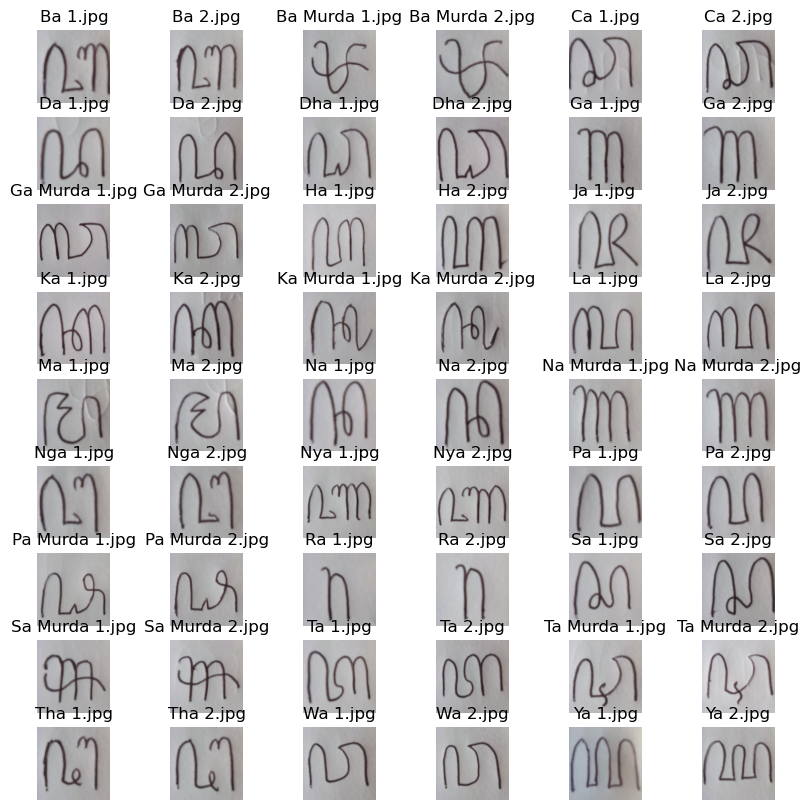

In [33]:
list_image = []
kelas_aktual_jenis = np.empty(54, dtype='object')
kelas_aktual_huruf = np.empty(54, dtype='object')
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for i in range(54):
    filepath = os.path.join('Data Testing 1', os.listdir('Data Testing 1')[i])
    img = Image.open(filepath)
    list_image.append(img)
    axs [i].imshow(img)
    axs[i].axis('off')
    filename = os.listdir('Data Testing 1')[i]
    kelas_aktual_jenis[i] = filename
    kelas_aktual_huruf[i] = filename
    axs[i].set_title(filename)
plt.show()

In [34]:
for i in range(len(kelas_aktual_jenis)):
    
    if len(kelas_aktual_jenis[i]) > 9:
        kelas_aktual_jenis[i] = "Murda"
        kelas_aktual_huruf[i] = kelas_aktual_huruf[i][:8]
    elif len(kelas_aktual_jenis[i]) == 9 or len(kelas_aktual_jenis[i]) == 8:
        kelas_aktual_jenis[i] = "Ngelegena"
        if len(kelas_aktual_huruf[i]) == 8:
            kelas_aktual_huruf[i] = kelas_aktual_huruf[i][:2] 
        elif len(kelas_aktual_huruf[i]) == 9:
            kelas_aktual_huruf[i] = kelas_aktual_huruf[i][:3]
        
        
print(kelas_aktual_jenis)
print(kelas_aktual_huruf)

['Ngelegena' 'Ngelegena' 'Murda' 'Murda' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena'
 'Murda' 'Murda' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Murda' 'Murda' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Murda' 'Murda'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena'
 'Murda' 'Murda' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Murda'
 'Murda' 'Ngelegena' 'Ngelegena' 'Murda' 'Murda' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena']
['Ba' 'Ba' 'Ba Murda' 'Ba Murda' 'Ca' 'Ca' 'Da' 'Da' 'Dha' 'Dha' 'Ga' 'Ga'
 'Ga Murda' 'Ga Murda' 'Ha' 'Ha' 'Ja' 'Ja' 'Ka' 'Ka' 'Ka Murda' 'Ka Murda'
 'La' 'La' 'Ma' 'Ma' 'Na' 'Na' 'Na Murda' 'Na Murda' 'Nga' 'Nga' 'Nya'
 'Nya' 'Pa' 'Pa' 'Pa Murda' 'Pa Murda' 'Ra' 'Ra' 'Sa' 'Sa' 'Sa Murda'
 'Sa Murda' 'Ta' 'Ta' 'Ta Murda' 'Ta Murda' 'Tha' 'Tha' 'Wa' 'Wa' 'Ya'
 'Ya']


#### Resize Data

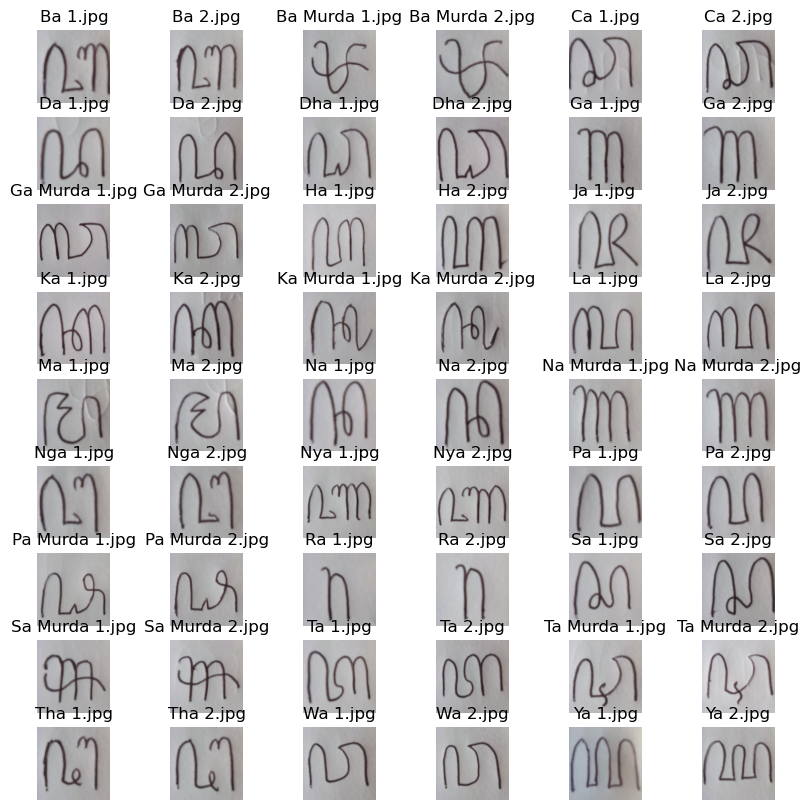

In [35]:
i = 0
resized_tests = []
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for image in list_image:
    resized_test = image.resize((120, 120))
    resized_tests.append(resized_test)
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(os.listdir('Data Testing 1')[i])
    i += 1

plt.show()

#### Grayscale Data

In [36]:
grayscale_tests = []
for image in resized_tests:
    width, height = image.size
    grayscale_test = Image.new("L", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            r, g, b = image.getpixel((x, y))
            brightness = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            grayscale_test.putpixel((x, y), brightness)
            
    grayscale_tests.append(grayscale_test)

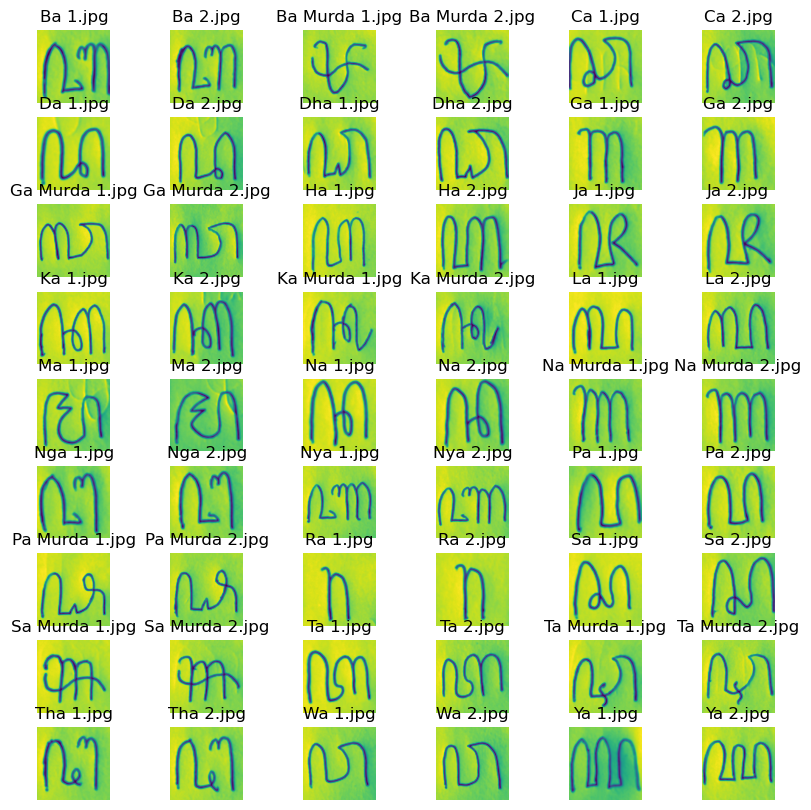

In [37]:
i = 0
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for image in grayscale_tests:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(os.listdir('Data Testing 1')[i])
    i += 1
    
plt.show()

#### Sauvola Threshold Data

In [38]:
k = 0.2
R = 128
threshold_tests = []

for image in grayscale_tests:
    image = image.rotate(270)
    image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    img_array = np.array(image)
    width, height = image.size
    binary_img = Image.new("1", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            window = img_array[max(x-15, 0):min(x+15, width), max(y-15, 0):min(y+15, height)]
            mean = np.mean(window)
            stddev = np.std(window)
            threshold = mean * (1 + k * ((stddev / R) - 1))
                
            if img_array[x, y] > threshold:
                binary_img.putpixel((x, y), 0)
            else:
                binary_img.putpixel((x, y), 255)
    
    threshold_tests.append(binary_img)

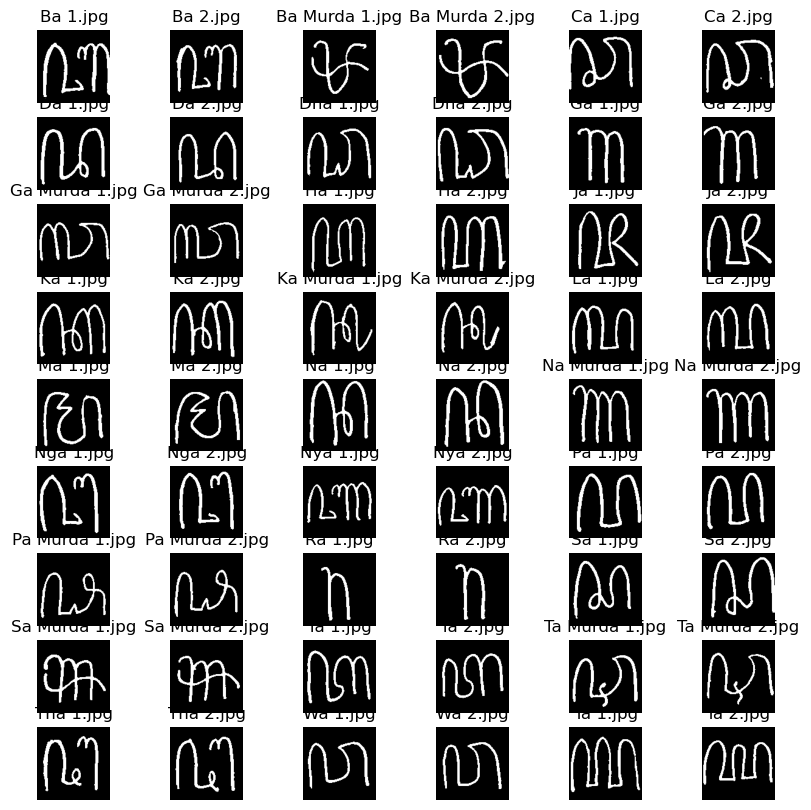

In [39]:
i = 0
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for image in threshold_tests:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(os.listdir('Data Testing 1')[i])
    i += 1
    
plt.show()

### Ekstraksi Zoning ICZ dan ZCZ

#### Ekstraksi Zoning

In [42]:
i = 0
array_tests = np.zeros((len(threshold_tests), 12))
centroid = np.zeros((len(threshold_tests), 14))

for image in threshold_tests:
    width, height = image.size
    zone_height = height // 6
    zone1 = image.crop((0, 0, width, zone_height))
    zone2 = image.crop((0, zone_height, width, zone_height * 2))
    zone3 = image.crop((0, zone_height * 2, width, zone_height * 3))
    zone4 = image.crop((0, zone_height * 3, width, zone_height * 4))
    zone5 = image.crop((0, zone_height * 4, width, zone_height * 5))
    zone6 = image.crop((0, zone_height * 5, width, height))
    
    img_array = np.array(image)
    img_zone1 = np.array(zone1)
    img_zone2 = np.array(zone2)
    img_zone3 = np.array(zone3)
    img_zone4 = np.array(zone4)
    img_zone5 = np.array(zone5)
    img_zone6 = np.array(zone6)
    total_pixel = np.sum(img_array)
    total_zone1 = np.sum(img_zone1)
    total_zone2 = np.sum(img_zone2)
    total_zone3 = np.sum(img_zone3)
    total_zone4 = np.sum(img_zone4)
    total_zone5 = np.sum(img_zone5)
    total_zone6 = np.sum(img_zone6)
    
    kolom = 0
    baris = 0
    kolom_zone1 = 0
    kolom_zone2 = 0
    kolom_zone3 = 0
    kolom_zone4 = 0
    kolom_zone5 = 0
    kolom_zone6 = 0
    baris_zone1 = 0
    baris_zone2 = 0
    baris_zone3 = 0
    baris_zone4 = 0
    baris_zone5 = 0
    baris_zone6 = 0
    sum_kolom = 0
    sum_baris = 0
    sumkolom_zone1 = 0
    sumkolom_zone2 = 0
    sumkolom_zone3 = 0
    sumkolom_zone4 = 0
    sumkolom_zone5 = 0
    sumkolom_zone6 = 0
    sumbaris_zone1 = 0
    sumbaris_zone2 = 0
    sumbaris_zone3 = 0
    sumbaris_zone4 = 0
    sumbaris_zone5 = 0
    sumbaris_zone6 = 0
    sumiczzone1 = 0
    sumiczzone2 = 0
    sumiczzone3 = 0
    sumiczzone4 = 0
    sumiczzone5 = 0
    sumiczzone6 = 0
    sumzczzone1 = 0
    sumzczzone2 = 0
    sumzczzone3 = 0
    sumzczzone4 = 0
    sumzczzone5 = 0
    sumzczzone6 = 0
    
    for x in range(width):
    
        for y in range(height):
            kolom += img_array[y][x]
            baris += img_array[x][y]
    
        sum_kolom += kolom * (x + 1)  
        sum_baris += baris * (x + 1)
            
        kolom = 0
        baris = 0
        
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[x])):
            baris_zone1 += img_zone1[x][y]
            baris_zone2 += img_zone2[x][y]
            baris_zone3 += img_zone3[x][y]
            baris_zone4 += img_zone4[x][y]
            baris_zone5 += img_zone5[x][y]
            baris_zone6 += img_zone6[x][y]
            
        sumbaris_zone1 += baris_zone1 * (x + 1)
        sumbaris_zone2 += baris_zone2 * (x + 1)
        sumbaris_zone3 += baris_zone3 * (x + 1)
        sumbaris_zone4 += baris_zone4 * (x + 1)
        sumbaris_zone5 += baris_zone5 * (x + 1)
        sumbaris_zone6 += baris_zone6 * (x + 1)

        baris_zone1 = 0
        baris_zone2 = 0
        baris_zone3 = 0
        baris_zone4 = 0
        baris_zone5 = 0
        baris_zone6 = 0
            
    for x in range(len(img_zone1[0])):
            
        for y in range(len(img_zone1)):
            kolom_zone1 += img_zone1[y][x]
            kolom_zone2 += img_zone2[y][x]    
            kolom_zone3 += img_zone3[y][x]
            kolom_zone4 += img_zone4[y][x]
            kolom_zone5 += img_zone5[y][x]
            kolom_zone6 += img_zone6[y][x]
                
        sumkolom_zone1 += kolom_zone1 * (x + 1)  
        sumkolom_zone2 += kolom_zone2 * (x + 1)  
        sumkolom_zone3 += kolom_zone3 * (x + 1)
        sumkolom_zone4 += kolom_zone4 * (x + 1)
        sumkolom_zone5 += kolom_zone5 * (x + 1)
        sumkolom_zone6 += kolom_zone6 * (x + 1)
            
        kolom_zone1 = 0
        kolom_zone2 = 0
        kolom_zone3 = 0
        kolom_zone4 = 0
        kolom_zone5 = 0
        kolom_zone6 = 0
            
    centroid_x = sum_kolom / total_pixel
    centroid_y = sum_baris / total_pixel
        
    centroidx_zone1 = sumkolom_zone1 / total_zone1
    centroidx_zone2 = sumkolom_zone2 / total_zone2
    centroidx_zone3 = sumkolom_zone3 / total_zone3
    centroidx_zone4 = sumkolom_zone4 / total_zone4
    centroidx_zone5 = sumkolom_zone5 / total_zone5
    centroidx_zone6 = sumkolom_zone6 / total_zone6
    
    centroidy_zone1 = sumbaris_zone1 / total_zone1
    centroidy_zone2 = sumbaris_zone2 / total_zone2
    centroidy_zone3 = sumbaris_zone3 / total_zone3
    centroidy_zone4 = sumbaris_zone4 / total_zone4
    centroidy_zone5 = sumbaris_zone5 / total_zone5
    centroidy_zone6 = sumbaris_zone6 / total_zone6
    
    if math.isnan(centroidx_zone1) and math.isnan(centroidy_zone1):
        centroidx_zone1 = 0
        centroidy_zone1 = 0
        
    if math.isnan(centroidx_zone2) and math.isnan(centroidy_zone2):
        centroidx_zone2 = 0
        centroidy_zone2 = 0
        
    if math.isnan(centroidx_zone3) and math.isnan(centroidy_zone3):
        centroidx_zone3 = 0
        centroidy_zone3 = 0
        
    if math.isnan(centroidx_zone4) and math.isnan(centroidy_zone4):
        centroidx_zone4 = 0
        centroidy_zone4 = 0
        
    if math.isnan(centroidx_zone5) and math.isnan(centroidy_zone5):
        centroidx_zone5 = 0
        centroidy_zone5 = 0
        
    if math.isnan(centroidx_zone6) and math.isnan(centroidy_zone6):
        centroidx_zone6 = 0
        centroidy_zone6 = 0
        
    centroid[i] = [centroid_x, centroid_y, centroidx_zone1, centroidx_zone2, centroidx_zone3, centroidx_zone4, centroidx_zone5, centroidx_zone6
                   , centroidy_zone1, centroidy_zone2, centroidy_zone3, centroidy_zone4, centroidy_zone5, centroidy_zone6]
        
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[0])):
            if img_zone1[x][y] == True:
                sumiczzone1 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone1 += math.sqrt(pow(((y+1) - centroidx_zone1), 2) + pow(((x+1) - centroidy_zone1), 2))
                
            if img_zone2[x][y] == True:
                sumiczzone2 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone2 += math.sqrt(pow(((y+1) - centroidx_zone2), 2) + pow(((x+1) - centroidy_zone2), 2))
                
            if img_zone3[x][y] == True:
                sumiczzone3 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone3 += math.sqrt(pow(((y+1) - centroidx_zone3), 2) + pow(((x+1) - centroidy_zone3), 2))
                
            if img_zone4[x][y] == True:
                sumiczzone4 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone4 += math.sqrt(pow(((y+1) - centroidx_zone4), 2) + pow(((x+1) - centroidy_zone4), 2))
                
            if img_zone5[x][y] == True:
                sumiczzone5 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone5 += math.sqrt(pow(((y+1) - centroidx_zone5), 2) + pow(((x+1) - centroidy_zone5), 2))
                
            if img_zone6[x][y] == True:
                sumiczzone6 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone6 += math.sqrt(pow(((y+1) - centroidx_zone6), 2) + pow(((x+1) - centroidy_zone6), 2))
                    
    iczzone1 = sumiczzone1 / total_zone1
    iczzone2 = sumiczzone2 / total_zone2
    iczzone3 = sumiczzone3 / total_zone3
    iczzone4 = sumiczzone4 / total_zone4
    iczzone5 = sumiczzone5 / total_zone5
    iczzone6 = sumiczzone6 / total_zone6
        
    zczzone1 = sumzczzone1 / total_zone1
    zczzone2 = sumzczzone2 / total_zone2
    zczzone3 = sumzczzone3 / total_zone3
    zczzone4 = sumzczzone4 / total_zone4
    zczzone5 = sumzczzone5 / total_zone5
    zczzone6 = sumzczzone6 / total_zone6
    
    if math.isnan(iczzone1) and math.isnan(zczzone1):
        iczzone1 = 0
        zczzone1 = 0
        
    if math.isnan(iczzone2) and math.isnan(zczzone2):
        iczzone2 = 0
        zczzone2 = 0    
     
    if math.isnan(iczzone3) and math.isnan(zczzone3):
        iczzone3 = 0
        zczzone3 = 0
        
    if math.isnan(iczzone4) and math.isnan(zczzone4):
        iczzone4 = 0
        zczzone4 = 0 
        
    if math.isnan(iczzone5) and math.isnan(zczzone5):
        iczzone5 = 0
        zczzone5 = 0
        
    if math.isnan(iczzone6) and math.isnan(zczzone6):
        iczzone6 = 0
        zczzone6 = 0 
    
    array_tests[i] = [iczzone1, iczzone2, iczzone3, iczzone4, iczzone5, iczzone6
                    , zczzone1, zczzone2, zczzone3, zczzone4, zczzone5, zczzone6]
             
    print("Nama File : ", name[i])
    print("Centroid Citra: ({}, {})".format(centroid_x, centroid_y))
    print("Centroid Zona 1: ({}, {})".format(centroidx_zone1, centroidy_zone1))
    print("Centroid Zona 2: ({}, {})".format(centroidx_zone2, centroidy_zone2))
    print("Centroid Zona 3: ({}, {})".format(centroidx_zone3, centroidy_zone3))
    print("Centroid Zona 4: ({}, {})".format(centroidx_zone4, centroidy_zone4))
    print("Centroid Zona 5: ({}, {})".format(centroidx_zone5, centroidy_zone5))
    print("Centroid Zona 6: ({}, {})".format(centroidx_zone6, centroidy_zone6))
    print("Ekstraksi ICZ: ({}, {}, {}, {}, {}, {})".format(iczzone1, iczzone2, iczzone3, iczzone4, iczzone5, iczzone6))
    print("Ekstraksi ZCZ: ({}, {}, {}, {}, {}, {})".format(zczzone1, zczzone2, zczzone3, zczzone4, zczzone5, zczzone6))
    print("\n")
        
    i += 1
    
df_test = pd.DataFrame(array_tests)
df_test.to_excel('Tests 6 Zona(1).xlsx', index=False)

C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:134: RuntimeWarning: invalid value encountered in long_scalars
  centroidx_zone1 = sumkolom_zone1 / total_zone1
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:141: RuntimeWarning: invalid value encountered in long_scalars
  centroidy_zone1 = sumbaris_zone1 / total_zone1
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:202: RuntimeWarning: invalid value encountered in long_scalars
  iczzone1 = sumiczzone1 / total_zone1
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:209: RuntimeWarning: invalid value encountered in long_scalars
  zczzone1 = sumzczzone1 / total_zone1


Nama File :  Ha
Centroid Citra: (66.13593481989709, 62.66552315608919)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (69.55555555555556, 11.574603174603174)
Centroid Zona 3: (66.69333333333333, 9.752380952380953)
Centroid Zona 4: (65.17420814479638, 10.5)
Centroid Zona 5: (65.78536585365853, 11.821138211382113)
Centroid Zona 6: (51.083333333333336, 4.108333333333333)
Ekstraksi ICZ: (0, 60.43599213004791, 64.75842326329521, 65.33235976800016, 60.23639659501051, 73.93450407699835)
Ekstraksi ZCZ: (0, 29.761168231241292, 35.108165905238685, 37.80109843326074, 29.138692099355918, 37.56264286661146)


Nama File :  Ha
Centroid Citra: (60.167735042735046, 60.05181623931624)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (62.861480075901326, 12.51043643263757)
Centroid Zona 3: (58.083885209713024, 9.856512141280353)
Centroid Zona 4: (61.77295918367347, 10.721938775510203)
Centroid Zona 5: (58.296370967741936, 9.860887096774194)
Centroid Zona 6: (16.0, 1.25)
Ekstraksi ICZ: (0, 55.6903428653536, 61.57370502

C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:139: RuntimeWarning: invalid value encountered in long_scalars
  centroidx_zone6 = sumkolom_zone6 / total_zone6
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:146: RuntimeWarning: invalid value encountered in long_scalars
  centroidy_zone6 = sumbaris_zone6 / total_zone6
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:207: RuntimeWarning: invalid value encountered in long_scalars
  iczzone6 = sumiczzone6 / total_zone6
C:\Users\Ilham\AppData\Local\Temp\ipykernel_8756\1001394167.py:214: RuntimeWarning: invalid value encountered in long_scalars
  zczzone6 = sumzczzone6 / total_zone6


Nama File :  Ha
Centroid Citra: (50.65981100611451, 52.96220122290161)
Centroid Zona 1: (56.056390977443606, 16.18421052631579)
Centroid Zona 2: (49.24874371859296, 10.045226130653266)
Centroid Zona 3: (53.01764705882353, 10.397058823529411)
Centroid Zona 4: (52.705882352941174, 11.776876267748479)
Centroid Zona 5: (41.771523178807946, 7.731788079470198)
Centroid Zona 6: (0, 0)
Ekstraksi ICZ: (47.10923309261083, 55.35953814335289, 55.090398899619984, 50.96624545522807, 56.974750515860066, 0)
Ekstraksi ZCZ: (26.14975610504537, 33.3306671900071, 33.02320209984141, 27.07635376383956, 27.66568039055446, 0)


Nama File :  Na
Centroid Citra: (61.29273620972146, 57.956854178044786)
Centroid Zona 1: (80.47321428571429, 18.973214285714285)
Centroid Zona 2: (61.91428571428571, 9.589010989010989)
Centroid Zona 3: (62.645833333333336, 10.377604166666666)
Centroid Zona 4: (62.17357512953368, 10.655440414507773)
Centroid Zona 5: (55.56404958677686, 8.62603305785124)
Centroid Zona 6: (9.5, 1.8)
Ekstr

Nama File :  Ra
Centroid Citra: (58.63797600417319, 64.33489827856025)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (60.05555555555556, 11.726851851851851)
Centroid Zona 3: (59.02295918367347, 10.349489795918368)
Centroid Zona 4: (58.06976744186046, 10.482558139534884)
Centroid Zona 5: (60.98559670781893, 10.75925925925926)
Centroid Zona 6: (40.934065934065934, 3.3956043956043955)
Ekstraksi ICZ: (0, 61.29587489120772, 63.80128177357213, 62.566123507953264, 63.10678515821537, 72.6818137893334)
Ekstraksi ZCZ: (0, 30.410330000576476, 30.903218031124222, 27.447571079889734, 29.464952152642855, 30.500044891120204)


Nama File :  Ra
Centroid Citra: (59.52992573176059, 61.03888160768895)
Centroid Zona 1: (83.57142857142857, 18.875)
Centroid Zona 2: (58.47565543071161, 10.08052434456929)
Centroid Zona 3: (57.72520661157025, 10.512396694214877)
Centroid Zona 4: (57.52272727272727, 10.055194805194805)
Centroid Zona 5: (59.75096525096525, 9.926640926640927)
Centroid Zona 6: (74.49382716049382, 3.8765

Nama File :  Ta
Centroid Citra: (60.3936170212766, 57.2031914893617)
Centroid Zona 1: (65.98469387755102, 17.066326530612244)
Centroid Zona 2: (60.76271186440678, 9.5)
Centroid Zona 3: (56.661631419939575, 10.371601208459214)
Centroid Zona 4: (56.52599388379205, 10.412844036697248)
Centroid Zona 5: (62.410821643286575, 10.008016032064129)
Centroid Zona 6: (64.45454545454545, 2.9272727272727272)
Ekstraksi ICZ: (48.26607401042968, 54.98421079623013, 57.64414475097397, 58.03913262165378, 54.757348915911614, 67.86995114866016)
Ekstraksi ZCZ: (25.04668799946913, 25.54866819396378, 30.50490691392872, 31.248258700080132, 24.18809771663333, 40.49332250304885)


Nama File :  Ta
Centroid Citra: (63.13656957928803, 60.353398058252424)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (70.8810975609756, 15.615853658536585)
Centroid Zona 3: (62.75541125541125, 9.83982683982684)
Centroid Zona 4: (63.74133949191686, 11.099307159353348)
Centroid Zona 5: (54.98136645962733, 6.186335403726708)
Centroid Zona 6: (

Nama File :  La
Centroid Citra: (59.432382133995034, 57.67928039702233)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (66.45558086560365, 12.03872437357631)
Centroid Zona 3: (57.993197278911566, 10.331065759637188)
Centroid Zona 4: (59.86467889908257, 10.431192660550458)
Centroid Zona 5: (50.523648648648646, 7.871621621621622)
Centroid Zona 6: (0, 0)
Ekstraksi ICZ: (0, 53.660647142385336, 57.23206486305824, 57.376924916499114, 56.22469351953617, 0)
Ekstraksi ZCZ: (0, 24.18758482771912, 29.89846976668242, 29.69232981737416, 21.58277534735368, 0)


Nama File :  La
Centroid Citra: (61.219298245614034, 66.39941520467836)
Centroid Zona 1: (0, 0)
Centroid Zona 2: (67.71337579617834, 13.203821656050955)
Centroid Zona 3: (60.36074270557029, 10.549071618037136)
Centroid Zona 4: (61.665929203539825, 11.097345132743364)
Centroid Zona 5: (57.84920634920635, 9.930555555555555)
Centroid Zona 6: (57.74603174603175, 4.746031746031746)
Ekstraksi ICZ: (0, 61.92552577351554, 67.10392367090282, 65.360543532271

In [44]:
df_test = pd.read_excel("Tests 6 Zona(1).xlsx")
df_test

0          1          2          3          4          5   \
0    0.000000  60.435992  64.758423  65.332360  60.236397  73.934504   
1    0.000000  55.690343  61.573705  60.352996  57.911780  73.544750   
2   47.303610  58.343771  52.307657  55.146190  49.441222  56.406323   
3   55.495634  58.781489  55.923825  61.060079  52.641482  54.795670   
4   47.109233  55.359538  55.090399  50.966245  56.974751   0.000000   
5   44.412057  58.689664  60.232867  59.579250  58.745984  76.399647   
6   57.607024  63.627539  63.892691  62.622539  61.467350  70.392919   
7    0.000000  63.387622  67.054640  67.275903  63.759066  74.976709   
8   48.091644  60.215126  63.033590  62.911383  60.538329  79.888385   
9   58.806286  62.569506  65.273039  65.770965  59.446711  73.035359   
10  51.196299  55.046158  53.909775  53.725678  54.355286  59.909253   
11  52.586418  53.940154  52.881477  53.326399  53.448794  57.573138   
12   0.000000  54.344349  62.094594  61.226415  62.732153   0.000000   
13   0.000000  55.473796  61.729580  61.917212  62.889724   0.000000   
14   0.000000  58.232656  60.049913  60.435124  60.176659  68.326674   
15  57.439634  61.261316  62.306370  62.530684  63.008873  66.839271   
16  51.233466  58.075090  57.956774  57.286675  59.658400  63.591008   
17  52.185322  59.761094  59.010491  59.267334  59.655689  72.799887   
18   0.000000  61.295875  63.801282  62.566124  63.106785  72.681814   
19  48.878245  58.064400  59.555204  58.438111  59.918120  68.936375   
20  46.840753  54.920424  54.574689  58.326993  60.887912  68.895918   
21  47.545232  54.899601  54.393005  58.560547  61.894571  73.048285   
22   0.000000  57.239887  61.503436  61.149530  61.497570  74.532587   
23   0.000000  55.905672  59.616260  59.879199  59.796716   0.000000   
24   0.000000  61.410679  63.288094  65.801864  65.686910  65.006132   
25   0.000000  58.092164  59.706985  63.763189  60.723766  77.083673   
26  50.930145  54.127378  52.732912  54.612798  55.464084  55.675551   
27  52.260116  58.009314  58.831233  56.853987  58.373779  68.067495   
28  54.648124  53.826367  53.956529  54.460801  54.952127  61.119951   
29  58.343382  56.047627  55.564368  55.923934  56.502748  62.883241   
30  51.387745  58.553895  61.712048  62.082949  57.788329  69.744011   
31  48.266074  54.984211  57.644145  58.039133  54.757349  67.869951   
32   0.000000  51.829668  60.055631  60.349906  63.677030   0.000000   
33   0.000000  54.812798  64.516553  66.253400  65.300479   0.000000   
34  51.541378  59.014349  60.599835  61.584643  58.712723  66.280506   
35  48.934529  56.604055  57.134329  57.530156  55.853112  70.341958   
36   0.000000  62.032768  67.721848  73.093121  66.905803  79.014233   
37   0.000000  60.542465  65.804748  67.182967  66.255162  79.292533   
38   0.000000  55.114469  58.710013  58.662749  58.446705  63.430286   
39  47.014140  53.691664  54.175598  54.168256  53.708367  58.934169   
40  48.098677  56.622382  57.275298  55.612580  59.195611  67.888186   
41  53.667490  57.587009  58.490500  56.450369  57.767478  67.750722   
42   0.000000  52.807535  57.939888  59.316348  59.071669  61.840709   
43   0.000000  52.246436  56.041902  60.266456  56.680352  65.296917   
44  53.632804  57.482162  59.729060  59.185076  59.212984  66.792797   
45   0.000000  53.660647  57.232065  57.376925  56.224694   0.000000   
46   0.000000  61.925526  67.103924  65.360544  65.490395  64.187976   
47   0.000000  60.946133  62.751038  60.280473  61.002654  57.507762   
48  48.601891  58.373377  59.750968  56.847876  56.744157  69.511163   
49  53.019455  60.570196  64.069003  61.857614  58.818984  66.865411   
50   0.000000  55.938193  60.674263  60.372786  61.575954  73.825221   
51   0.000000  55.993623  61.529430  62.168805  60.601133  76.869007   
52  44.819372  60.712712  60.763765  61.286700  60.255914  77.506946   
53   0.000000  55.949914  58.692778  59.248708  62.945768   0.000000   

           6          7          8          9     

### Testing SVM

#### Kernel RBF untuk Binary

In [45]:
sigma = 2.1

def kernel_rbf(array_tests):
    array_rbf = np.zeros((len(array_ekstraksi), len(array_tests)))
    for i in range (len(array_tests)):
        for j in range (len(array_ekstraksi)):
            array_rbf[j, i] = math.exp(-(pow((array_tests[i][0] - array_ekstraksi[j][0]), 2)
                                        + pow((array_tests[i][1] - array_ekstraksi[j][1]), 2)
                                        + pow((array_tests[i][2] - array_ekstraksi[j][2]), 2)
                                        + pow((array_tests[i][3] - array_ekstraksi[j][3]), 2)
                                        + pow((array_tests[i][4] - array_ekstraksi[j][4]), 2)
                                        + pow((array_tests[i][5] - array_ekstraksi[j][5]), 2)
                                        + pow((array_tests[i][6] - array_ekstraksi[j][6]), 2)
                                        + pow((array_tests[i][7] - array_ekstraksi[j][7]), 2)
                                        + pow((array_tests[i][8] - array_ekstraksi[j][8]), 2)
                                        + pow((array_tests[i][9] - array_ekstraksi[j][9]), 2)
                                        + pow((array_tests[i][10] - array_ekstraksi[j][10]), 2)
                                        + pow((array_tests[i][11] - array_ekstraksi[j][11]), 2)) / (2 * pow(sigma, 2)))
    return array_rbf

rbf_tests = kernel_rbf(array_tests)
print(rbf_tests)

[[2.64665145e-219 4.96101377e-160 2.55056679e-048 ... 1.06655210e-203
  7.70938628e-084 0.00000000e+000]
 [1.42137734e-207 3.18826780e-203 7.17689580e-061 ... 2.26828778e-190
  1.15364755e-058 0.00000000e+000]
 [2.27223763e-172 3.51248343e-194 4.57083719e-065 ... 6.56927610e-166
  9.76976278e-026 0.00000000e+000]
 ...
 [1.72781885e-241 1.53540652e-184 2.04848825e-007 ... 2.33353060e-227
  8.52169849e-113 1.59147769e-307]
 [4.04275402e-292 2.44127514e-250 6.33840042e-049 ... 2.30362491e-277
  6.29646568e-120 0.00000000e+000]
 [0.00000000e+000 4.75402020e-275 1.16396052e-065 ... 1.50725427e-316
  2.51794275e-191 0.00000000e+000]]


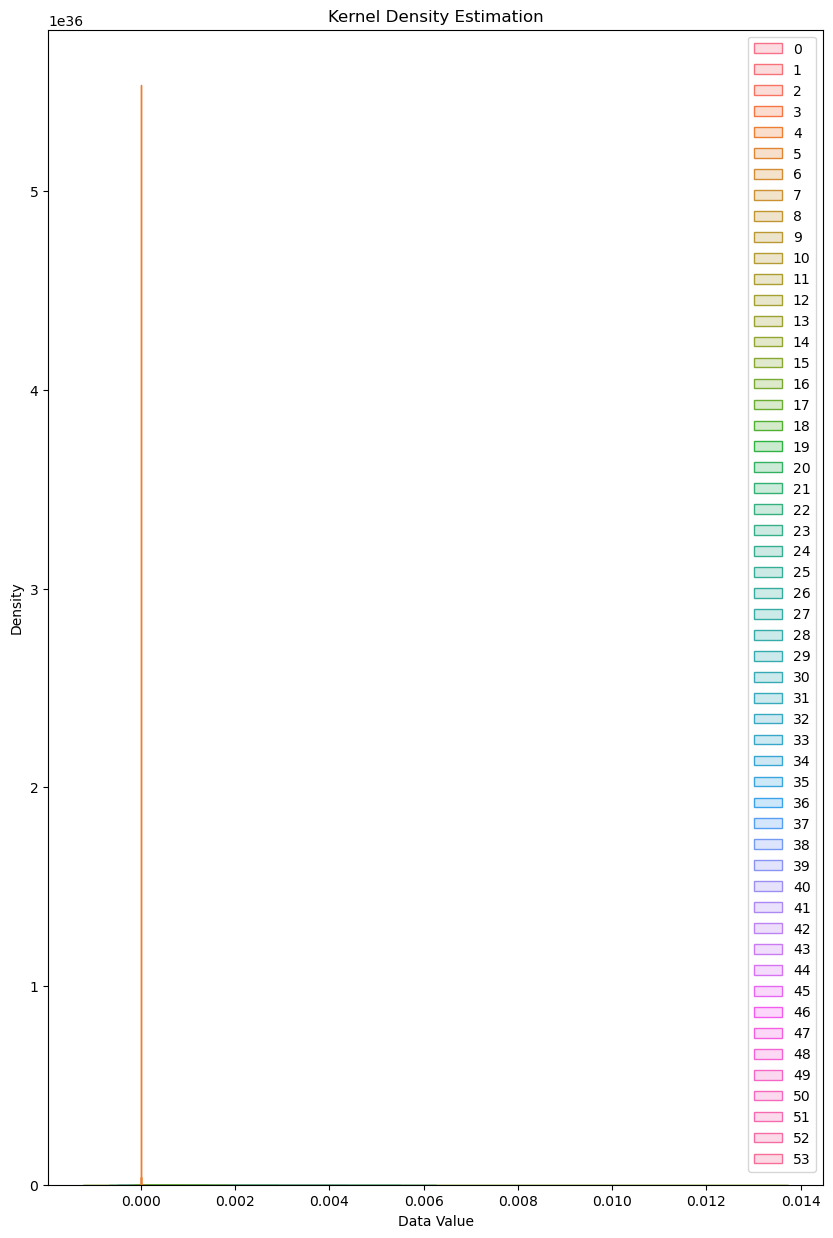

In [46]:
plt.figure(figsize=(10, 15))
sns.kdeplot(rbf_tests, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Klasifikasi Binary, Kernel RBF Multiclass dan Klasifikasi Multiclass 

In [47]:
matriks_bobot = np.zeros((len(array_ekstraksi)))
matriks_bobot_ha = np.zeros((len(array_ngelegena)))
matriks_bobot_na = np.zeros((len(array_ngelegena)))
matriks_bobot_ca = np.zeros((len(array_ngelegena)))
matriks_bobot_ra = np.zeros((len(array_ngelegena)))
matriks_bobot_ka = np.zeros((len(array_ngelegena)))
matriks_bobot_da = np.zeros((len(array_ngelegena)))
matriks_bobot_ta = np.zeros((len(array_ngelegena)))
matriks_bobot_sa = np.zeros((len(array_ngelegena)))
matriks_bobot_wa = np.zeros((len(array_ngelegena)))
matriks_bobot_la = np.zeros((len(array_ngelegena)))
matriks_bobot_pa = np.zeros((len(array_ngelegena)))
matriks_bobot_dha = np.zeros((len(array_ngelegena)))
matriks_bobot_ja = np.zeros((len(array_ngelegena)))
matriks_bobot_ya = np.zeros((len(array_ngelegena)))
matriks_bobot_nya = np.zeros((len(array_ngelegena)))
matriks_bobot_ma = np.zeros((len(array_ngelegena)))
matriks_bobot_ga = np.zeros((len(array_ngelegena)))
matriks_bobot_ba = np.zeros((len(array_ngelegena)))
matriks_bobot_tha = np.zeros((len(array_ngelegena)))
matriks_bobot_nga = np.zeros((len(array_ngelegena)))
matriks_bobot_namurda = np.zeros((len(array_murda)))
matriks_bobot_kamurda = np.zeros((len(array_murda)))
matriks_bobot_tamurda = np.zeros((len(array_murda)))
matriks_bobot_samurda = np.zeros((len(array_murda)))
matriks_bobot_pamurda = np.zeros((len(array_murda)))
matriks_bobot_gamurda = np.zeros((len(array_murda)))
matriks_bobot_bamurda = np.zeros((len(array_murda)))

In [48]:
kelas_prediksi = np.empty(54, dtype='object')
kelas_prediksi_huruf = np.empty(54, dtype='object')
array_rbf_murda = np.zeros((len(array_murda), 1))
array_rbf_ngelegena = np.zeros((len(array_ngelegena), 1))
tabel_hasil = np.zeros((len(array_tests), 2))
sigma_huruf = 2
sigma_murda = 3
a = 0

for i in range(rbf_tests.shape[1]):
    for j in range(rbf_tests.shape[0]):
        matriks_bobot[j] = alpha[j] * model[j][12] * rbf_tests[j, i]
    total_bobot_jenis = np.sum(matriks_bobot)
    hasil_klasifikasi = total_bobot_jenis + bias
    if hasil_klasifikasi > 0:
        kelas_prediksi[i] = "Ngelegena"
        for k in range (1):
            for l in range (len(array_ngelegena)):
                array_rbf_ngelegena[l, k] = math.exp(-(pow((array_tests[a][0] - array_ngelegena[l][0]), 2)
                                                    + pow((array_tests[a][1] - array_ngelegena[l][1]), 2)
                                                    + pow((array_tests[a][2] - array_ngelegena[l][2]), 2)
                                                    + pow((array_tests[a][3] - array_ngelegena[l][3]), 2)
                                                    + pow((array_tests[a][4] - array_ngelegena[l][4]), 2)
                                                    + pow((array_tests[a][5] - array_ngelegena[l][5]), 2)
                                                    + pow((array_tests[a][6] - array_ngelegena[l][6]), 2)
                                                    + pow((array_tests[a][7] - array_ngelegena[l][7]), 2)
                                                    + pow((array_tests[a][8] - array_ngelegena[l][8]), 2)
                                                    + pow((array_tests[a][9] - array_ngelegena[l][9]), 2)
                                                    + pow((array_tests[a][10] - array_ngelegena[l][10]), 2)
                                                    + pow((array_tests[a][11] - array_ngelegena[l][11]), 2)) / (2 * pow(sigma_huruf, 2)))
        a += 1
        for k in range(21):
            if k == 0:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ha[m] = alpha_ha[m] * model_ha[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ha)
                hasil_klasifikasi_huruf = total_bobot + bias_ha
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ha"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 1:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_na[m] = alpha_na[m] * model_na[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_na)
                hasil_klasifikasi_huruf = total_bobot + bias_na
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Na"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 2:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ca[m] = alpha_ca[m] * model_ca[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ca)
                hasil_klasifikasi_huruf = total_bobot + bias_ca
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ca"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 3:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ra[m] = alpha_ra[m] * model_ra[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ra)
                hasil_klasifikasi_huruf = total_bobot + bias_ra
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ra"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 4:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ka[m] = alpha_ka[m] * model_ka[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ka)
                hasil_klasifikasi_huruf = total_bobot + bias_ka
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ka"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 5:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_da[m] = alpha_da[m] * model_da[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_da)
                hasil_klasifikasi_huruf = total_bobot + bias_da
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Da"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 6:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ta[m] = alpha_ta[m] * model_ta[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ta)
                hasil_klasifikasi_huruf = total_bobot + bias_ta
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ta"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 7:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_sa[m] = alpha_sa[m] * model_sa[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_sa)
                hasil_klasifikasi_huruf = total_bobot + bias_sa
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Sa"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 8:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_wa[m] = alpha_wa[m] * model_wa[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_wa)
                hasil_klasifikasi_huruf = total_bobot + bias_wa
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Wa"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 9:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_la[m] = alpha_la[m] * model_la[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_la)
                hasil_klasifikasi_huruf = total_bobot + bias_la
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "La"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 10:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_pa[m] = alpha_pa[m] * model_pa[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_pa)
                hasil_klasifikasi_huruf = total_bobot + bias_pa
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Pa"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 11:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_dha[m] = alpha_dha[m] * model_dha[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_dha)
                hasil_klasifikasi_huruf = total_bobot + bias_dha
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Dha"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 12:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ja[m] = alpha_ja[m] * model_ja[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ja)
                hasil_klasifikasi_huruf = total_bobot + bias_ja
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ja"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 13:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ya[m] = alpha_ya[m] * model_ya[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ya)
                hasil_klasifikasi_huruf = total_bobot + bias_ya
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ya"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 14:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_nya[m] = alpha_nya[m] * model_nya[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_nya)
                hasil_klasifikasi_huruf = total_bobot + bias_nya
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Nya"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 15:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ma[m] = alpha_ma[m] * model_ma[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ma)
                hasil_klasifikasi_huruf = total_bobot + bias_ma
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ma"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 16:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ga[m] = alpha_ga[m] * model_ga[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ga)
                hasil_klasifikasi_huruf = total_bobot + bias_ga
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ga"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 17:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ba[m] = alpha_ba[m] * model_ba[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ba)
                hasil_klasifikasi_huruf = total_bobot + bias_ba
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ba"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 18:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_tha[m] = alpha_tha[m] * model_tha[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_tha)
                hasil_klasifikasi_huruf = total_bobot + bias_tha
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Tha"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 19:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_nga[m] = alpha_nga[m] * model_nga[m][12] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ha)
                hasil_klasifikasi_huruf = total_bobot + bias_nga
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Nga"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            else:
                kelas_prediksi_huruf[i] = "Tak Terdefinisi"
                print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
    else:
        kelas_prediksi[i] = "Murda"
        for k in range (1):
            for l in range (len(array_murda)):
                array_rbf_murda[l, k] = math.exp(-(pow((array_tests[a][0] - array_murda[l][0]), 2)
                                                    + pow((array_tests[a][1] - array_murda[l][1]), 2)
                                                    + pow((array_tests[a][2] - array_murda[l][2]), 2)
                                                    + pow((array_tests[a][3] - array_murda[l][3]), 2)
                                                    + pow((array_tests[a][4] - array_murda[l][4]), 2)
                                                    + pow((array_tests[a][5] - array_murda[l][5]), 2)
                                                    + pow((array_tests[a][6] - array_murda[l][6]), 2)
                                                    + pow((array_tests[a][7] - array_murda[l][7]), 2)
                                                    + pow((array_tests[a][8] - array_murda[l][8]), 2)
                                                    + pow((array_tests[a][9] - array_murda[l][9]), 2)
                                                    + pow((array_tests[a][10] - array_murda[l][10]), 2)
                                                    + pow((array_tests[a][11] - array_murda[l][11]), 2)) / (2 * pow(sigma_murda, 2)))
        a += 1
        for k in range(8):
            if k == 0:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_namurda[m] = alpha_namurda[m] * model_namurda[m][12] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_namurda)
                hasil_klasifikasi_huruf = total_bobot + bias_namurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Na Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 1:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_kamurda[m] = alpha_kamurda[m] * model_kamurda[m][12] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_kamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_kamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ka Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 2:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_tamurda[m] = alpha_tamurda[m] * model_tamurda[m][12] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_tamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_tamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ta Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 3:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_samurda[m] = alpha_samurda[m] * model_samurda[m][12] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_samurda)
                hasil_klasifikasi_huruf = total_bobot + bias_samurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Sa Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 4:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_pamurda[m] = alpha_pamurda[m] * model_pamurda[m][12] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_pamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_pamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Pa Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 5:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_gamurda[m] = alpha_gamurda[m] * model_gamurda[m][12] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_gamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_gamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ga Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 6:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_bamurda[m] = alpha_bamurda[m] * model_bamurda[m][12] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_bamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_bamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ba Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            else:
                kelas_prediksi_huruf[i] = "Tak Terdefinisi"
                print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                
    tabel_hasil[i] = [total_bobot_jenis, hasil_klasifikasi]

0 Ngelegena Tak Terdefinisi
1 Ngelegena Tak Terdefinisi
2 Ngelegena Tak Terdefinisi
3 Ngelegena Tak Terdefinisi
4 Ngelegena Tak Terdefinisi
5 Ngelegena Tak Terdefinisi
6 Ngelegena Tak Terdefinisi
7 Ngelegena Tak Terdefinisi
8 Ngelegena Tak Terdefinisi
9 Ngelegena Tak Terdefinisi
10 Ngelegena Tak Terdefinisi
11 Ngelegena Tak Terdefinisi
12 Ngelegena Tak Terdefinisi
13 Ngelegena Tak Terdefinisi
14 Ngelegena Tak Terdefinisi
15 Ngelegena Tak Terdefinisi
16 Ngelegena Tak Terdefinisi
17 Ngelegena Tak Terdefinisi
18 Ngelegena Tak Terdefinisi
19 Ngelegena Tak Terdefinisi
20 Ngelegena Tak Terdefinisi
21 Ngelegena Tak Terdefinisi
22 Ngelegena Tak Terdefinisi
23 Ngelegena Tak Terdefinisi
24 Ngelegena Tak Terdefinisi
25 Ngelegena Tak Terdefinisi
26 Ngelegena Tak Terdefinisi
27 Ngelegena Tak Terdefinisi
28 Ngelegena Tak Terdefinisi
29 Ngelegena Tak Terdefinisi
30 Ngelegena Tak Terdefinisi
31 Ngelegena Tak Terdefinisi
32 Ngelegena Tak Terdefinisi
33 Ngelegena Tak Terdefinisi
34 Ngelegena Tak Terdefi

In [49]:
for i in range(54):
    if kelas_prediksi[i] == "Ngelegena":
        kelas_prediksi[i] = 1
    elif kelas_prediksi[i] == "Murda":
        kelas_prediksi[i] = 2
        
for i in range(54):
    if kelas_aktual_jenis[i] == "Ngelegena":
        kelas_aktual_jenis[i] = 1
    elif kelas_aktual_jenis[i] == "Murda":
        kelas_aktual_jenis[i] = 2

In [50]:
for i in range(len(kelas_prediksi_huruf)):
    if kelas_prediksi_huruf[i] == "Ha":
        kelas_prediksi_huruf[i] = 1
    elif kelas_prediksi_huruf[i] == "Na":
        kelas_prediksi_huruf[i] = 2
    elif kelas_prediksi_huruf[i] == "Ca":
        kelas_prediksi_huruf[i] = 3
    elif kelas_prediksi_huruf[i] == "Ra":
        kelas_prediksi_huruf[i] = 4
    elif kelas_prediksi_huruf[i] == "Ka":
        kelas_prediksi_huruf[i] = 5
    elif kelas_prediksi_huruf[i] == "Da":
        kelas_prediksi_huruf[i] = 6
    elif kelas_prediksi_huruf[i] == "Ta":
        kelas_prediksi_huruf[i] = 7
    elif kelas_prediksi_huruf[i] == "Sa":
        kelas_prediksi_huruf[i] = 8
    elif kelas_prediksi_huruf[i] == "Wa":
        kelas_prediksi_huruf[i] = 9
    elif kelas_prediksi_huruf[i] == "La":
        kelas_prediksi_huruf[i] = 10
    elif kelas_prediksi_huruf[i] == "Pa":
        kelas_prediksi_huruf[i] = 11
    elif kelas_prediksi_huruf[i] == "Dha":
        kelas_prediksi_huruf[i] = 12
    elif kelas_prediksi_huruf[i] == "Ja":
        kelas_prediksi_huruf[i] = 13
    elif kelas_prediksi_huruf[i] == "Ya":
        kelas_prediksi_huruf[i] = 14
    elif kelas_prediksi_huruf[i] == "Nya":
        kelas_prediksi_huruf[i] = 15
    elif kelas_prediksi_huruf[i] == "Ma":
        kelas_prediksi_huruf[i] = 16
    elif kelas_prediksi_huruf[i] == "Ga":
        kelas_prediksi_huruf[i] = 17
    elif kelas_prediksi_huruf[i] == "Ba":
        kelas_prediksi_huruf[i] = 18
    elif kelas_prediksi_huruf[i] == "Tha":
        kelas_prediksi_huruf[i] = 19
    elif kelas_prediksi_huruf[i] == "Nga":
        kelas_prediksi_huruf[i] = 20
    elif kelas_prediksi_huruf[i] == "Na Murda":
        kelas_prediksi_huruf[i] = 21
    elif kelas_prediksi_huruf[i] == "Ka Murda":
        kelas_prediksi_huruf[i] = 22
    elif kelas_prediksi_huruf[i] == "Ta Murda":
        kelas_prediksi_huruf[i] = 23
    elif kelas_prediksi_huruf[i] == "Sa Murda":
        kelas_prediksi_huruf[i] = 24
    elif kelas_prediksi_huruf[i] == "Pa Murda":
        kelas_prediksi_huruf[i] = 25
    elif kelas_prediksi_huruf[i] == "Ga Murda":
        kelas_prediksi_huruf[i] = 26
    elif kelas_prediksi_huruf[i] == "Ba Murda":
        kelas_prediksi_huruf[i] = 27
    elif kelas_prediksi_huruf[i] == "Tak Terdefinisi":
        kelas_prediksi_huruf[i] = 28

In [51]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == "Ha":
        kelas_aktual_huruf[i] = 1
    elif kelas_aktual_huruf[i] == "Na":
        kelas_aktual_huruf[i] = 2
    elif kelas_aktual_huruf[i] == "Ca":
        kelas_aktual_huruf[i] = 3
    elif kelas_aktual_huruf[i] == "Ra":
        kelas_aktual_huruf[i] = 4
    elif kelas_aktual_huruf[i] == "Ka":
        kelas_aktual_huruf[i] = 5
    elif kelas_aktual_huruf[i] == "Da":
        kelas_aktual_huruf[i] = 6
    elif kelas_aktual_huruf[i] == "Ta":
        kelas_aktual_huruf[i] = 7
    elif kelas_aktual_huruf[i] == "Sa":
        kelas_aktual_huruf[i] = 8
    elif kelas_aktual_huruf[i] == "Wa":
        kelas_aktual_huruf[i] = 9
    elif kelas_aktual_huruf[i] == "La":
        kelas_aktual_huruf[i] = 10
    elif kelas_aktual_huruf[i] == "Pa":
        kelas_aktual_huruf[i] = 11
    elif kelas_aktual_huruf[i] == "Dha":
        kelas_aktual_huruf[i] = 12
    elif kelas_aktual_huruf[i] == "Ja":
        kelas_aktual_huruf[i] = 13
    elif kelas_aktual_huruf[i] == "Ya":
        kelas_aktual_huruf[i] = 14
    elif kelas_aktual_huruf[i] == "Nya":
        kelas_aktual_huruf[i] = 15
    elif kelas_aktual_huruf[i] == "Ma":
        kelas_aktual_huruf[i] = 16
    elif kelas_aktual_huruf[i] == "Ga":
        kelas_aktual_huruf[i] = 17
    elif kelas_aktual_huruf[i] == "Ba":
        kelas_aktual_huruf[i] = 18
    elif kelas_aktual_huruf[i] == "Tha":
        kelas_aktual_huruf[i] = 19
    elif kelas_aktual_huruf[i] == "Nga":
        kelas_aktual_huruf[i] = 20
    elif kelas_aktual_huruf[i] == "Na Murda":
        kelas_aktual_huruf[i] = 21
    elif kelas_aktual_huruf[i] == "Ka Murda":
        kelas_aktual_huruf[i] = 22
    elif kelas_aktual_huruf[i] == "Ta Murda":
        kelas_aktual_huruf[i] = 23
    elif kelas_aktual_huruf[i] == "Sa Murda":
        kelas_aktual_huruf[i] = 24
    elif kelas_aktual_huruf[i] == "Pa Murda":
        kelas_aktual_huruf[i] = 25
    elif kelas_aktual_huruf[i] == "Ga Murda":
        kelas_aktual_huruf[i] = 26
    elif kelas_aktual_huruf[i] == "Ba Murda":
        kelas_aktual_huruf[i] = 27

In [52]:
print("No", "KA", "KP", "KAH", "KPH", "  NF")
for i in range(54):
    filename = os.listdir('Data Testing 2')[i]
    print(i, kelas_aktual_jenis[i], " ", kelas_prediksi[i], " ", kelas_aktual_huruf[i], " ", kelas_prediksi_huruf[i], " ", filename)

No KA KP KAH KPH   NF
0 1   1   18   28   Ba 1.jpg
1 1   1   18   28   Ba 2.jpg
2 2   1   27   28   Ba 3.jpg
3 2   1   27   28   Ba Murda 1.jpg
4 1   1   3   28   Ba Murda 2.jpg
5 1   1   3   28   Ba Murda 3.jpg
6 1   1   6   28   Ca 1.jpg
7 1   1   6   28   Ca 2.jpg
8 1   1   12   28   Ca 3.jpg
9 1   1   12   28   Da 1.jpg
10 1   1   17   28   Da 2.jpg
11 1   1   17   28   Da 3.jpg
12 2   1   26   28   Dha 1.jpg
13 2   1   26   28   Dha 2.jpg
14 1   1   1   28   Dha 3.jpg
15 1   1   1   28   Ga 1.jpg
16 1   1   13   28   Ga 2.jpg
17 1   1   13   28   Ga 3.jpg
18 1   1   5   28   Ga Murda 1.jpg
19 1   1   5   28   Ga Murda 2.jpg
20 2   1   22   28   Ga Murda 3.jpg
21 2   1   22   28   Ha 1.jpg
22 1   1   10   28   Ha 2.jpg
23 1   1   10   28   Ha 3.jpg
24 1   1   16   28   Ja 1.jpg
25 1   1   16   28   Ja 2.jpg
26 1   1   2   28   Ja 3.jpg
27 1   1   2   28   Ka 1.jpg
28 2   1   21   28   Ka 2.jpg
29 2   1   21   28   Ka 3.jpg
30 1   1   20   28   Ka Murda 1.jpg
31 1   1   20   28   Ka

### Confusion Matriks

#### Mencari TP, TN, FP dan FN

In [53]:
confussion_matriks = [[0,0],[0,0]]

confussion_matriks_ha = [[0,0],[0,0]]
confussion_matriks_na = [[0,0],[0,0]]
confussion_matriks_ca = [[0,0],[0,0]]
confussion_matriks_ra = [[0,0],[0,0]]
confussion_matriks_ka = [[0,0],[0,0]]
confussion_matriks_da = [[0,0],[0,0]]
confussion_matriks_ta = [[0,0],[0,0]]
confussion_matriks_sa = [[0,0],[0,0]]
confussion_matriks_wa = [[0,0],[0,0]]
confussion_matriks_la = [[0,0],[0,0]]
confussion_matriks_pa = [[0,0],[0,0]]
confussion_matriks_dha = [[0,0],[0,0]]
confussion_matriks_ja = [[0,0],[0,0]]
confussion_matriks_ya = [[0,0],[0,0]]
confussion_matriks_nya = [[0,0],[0,0]]
confussion_matriks_ma = [[0,0],[0,0]]
confussion_matriks_ga = [[0,0],[0,0]]
confussion_matriks_ba = [[0,0],[0,0]]
confussion_matriks_tha = [[0,0],[0,0]]
confussion_matriks_nga = [[0,0],[0,0]]

confussion_matriks_namurda = [[0,0],[0,0]]
confussion_matriks_kamurda = [[0,0],[0,0]]
confussion_matriks_tamurda = [[0,0],[0,0]]
confussion_matriks_samurda = [[0,0],[0,0]]
confussion_matriks_pamurda = [[0,0],[0,0]]
confussion_matriks_gamurda = [[0,0],[0,0]]
confussion_matriks_bamurda = [[0,0],[0,0]]

for i in range(len(kelas_aktual_jenis)):
    if kelas_aktual_jenis[i] == 1 and kelas_prediksi[i] == 1:
        confussion_matriks[1][1] += 1
    elif kelas_aktual_jenis[i] == 1 and kelas_prediksi[i] == 2:
        confussion_matriks[1][0] += 1
    elif kelas_aktual_jenis[i] == 2 and kelas_prediksi[i] == 1:
        confussion_matriks[0][1] += 1
    elif kelas_aktual_jenis[i] == 2 and kelas_prediksi[i] == 2:
        confussion_matriks[0][0] += 1

In [54]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 1 and kelas_prediksi_huruf[i] == 1:
        confussion_matriks_ha[1][1] += 1
    elif kelas_aktual_huruf[i] == 1 and kelas_prediksi_huruf[i] != 1:
        confussion_matriks_ha[1][0] += 1
    elif kelas_aktual_huruf[i] != 1 and kelas_prediksi_huruf[i] == 1:
        confussion_matriks_ha[0][1] += 1
    elif kelas_aktual_huruf[i] != 1 and kelas_prediksi_huruf[i] != 1:
        confussion_matriks_ha[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 2 and kelas_prediksi_huruf[i] == 2:
        confussion_matriks_na[1][1] += 1
    elif kelas_aktual_huruf[i] == 2 and kelas_prediksi_huruf[i] != 2:
        confussion_matriks_na[1][0] += 1
    elif kelas_aktual_huruf[i] != 2 and kelas_prediksi_huruf[i] == 2:
        confussion_matriks_na[0][1] += 1
    elif kelas_aktual_huruf[i] != 2 and kelas_prediksi_huruf[i] != 2:
        confussion_matriks_na[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 3 and kelas_prediksi_huruf[i] == 3:
        confussion_matriks_ca[1][1] += 1
    elif kelas_aktual_huruf[i] == 3 and kelas_prediksi_huruf[i] != 3:
        confussion_matriks_ca[1][0] += 1
    elif kelas_aktual_huruf[i] != 3 and kelas_prediksi_huruf[i] == 3:
        confussion_matriks_ca[0][1] += 1
    elif kelas_aktual_huruf[i] != 3 and kelas_prediksi_huruf[i] != 3:
        confussion_matriks_ca[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 4 and kelas_prediksi_huruf[i] == 4:
        confussion_matriks_ra[1][1] += 1
    elif kelas_aktual_huruf[i] == 4 and kelas_prediksi_huruf[i] != 4:
        confussion_matriks_ra[1][0] += 1
    elif kelas_aktual_huruf[i] != 4 and kelas_prediksi_huruf[i] == 4:
        confussion_matriks_ra[0][1] += 1
    elif kelas_aktual_huruf[i] != 4 and kelas_prediksi_huruf[i] != 4:
        confussion_matriks_ra[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 5 and kelas_prediksi_huruf[i] == 5:
        confussion_matriks_ka[1][1] += 1
    elif kelas_aktual_huruf[i] == 5 and kelas_prediksi_huruf[i] != 5:
        confussion_matriks_ka[1][0] += 1
    elif kelas_aktual_huruf[i] != 5 and kelas_prediksi_huruf[i] == 5:
        confussion_matriks_ka[0][1] += 1
    elif kelas_aktual_huruf[i] != 5 and kelas_prediksi_huruf[i] != 5:
        confussion_matriks_ka[0][0] += 1
    
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 6 and kelas_prediksi_huruf[i] == 6:
        confussion_matriks_da[1][1] += 1
    elif kelas_aktual_huruf[i] == 6 and kelas_prediksi_huruf[i] != 6:
        confussion_matriks_da[1][0] += 1
    elif kelas_aktual_huruf[i] != 6 and kelas_prediksi_huruf[i] == 6:
        confussion_matriks_da[0][1] += 1
    elif kelas_aktual_huruf[i] != 6 and kelas_prediksi_huruf[i] != 6:
        confussion_matriks_da[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 7 and kelas_prediksi_huruf[i] == 7:
        confussion_matriks_ta[1][1] += 1
    elif kelas_aktual_huruf[i] == 7 and kelas_prediksi_huruf[i] != 7:
        confussion_matriks_ta[1][0] += 1
    elif kelas_aktual_huruf[i] != 7 and kelas_prediksi_huruf[i] == 7:
        confussion_matriks_ta[0][1] += 1
    elif kelas_aktual_huruf[i] != 7 and kelas_prediksi_huruf[i] != 7:
        confussion_matriks_ta[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 8 and kelas_prediksi_huruf[i] == 8:
        confussion_matriks_sa[1][1] += 1
    elif kelas_aktual_huruf[i] == 8 and kelas_prediksi_huruf[i] != 8:
        confussion_matriks_sa[1][0] += 1
    elif kelas_aktual_huruf[i] != 8 and kelas_prediksi_huruf[i] == 8:
        confussion_matriks_sa[0][1] += 1
    elif kelas_aktual_huruf[i] != 8 and kelas_prediksi_huruf[i] != 8:
        confussion_matriks_sa[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 9 and kelas_prediksi_huruf[i] == 9:
        confussion_matriks_wa[1][1] += 1
    elif kelas_aktual_huruf[i] == 9 and kelas_prediksi_huruf[i] != 9:
        confussion_matriks_wa[1][0] += 1
    elif kelas_aktual_huruf[i] != 9 and kelas_prediksi_huruf[i] == 9:
        confussion_matriks_wa[0][1] += 1
    elif kelas_aktual_huruf[i] != 9 and kelas_prediksi_huruf[i] != 9:
        confussion_matriks_wa[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 10 and kelas_prediksi_huruf[i] == 10:
        confussion_matriks_la[1][1] += 1
    elif kelas_aktual_huruf[i] == 10 and kelas_prediksi_huruf[i] != 10:
        confussion_matriks_la[1][0] += 1
    elif kelas_aktual_huruf[i] != 10 and kelas_prediksi_huruf[i] == 10:
        confussion_matriks_la[0][1] += 1
    elif kelas_aktual_huruf[i] != 10 and kelas_prediksi_huruf[i] != 10:
        confussion_matriks_la[0][0] += 1

In [55]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 11 and kelas_prediksi_huruf[i] == 11:
        confussion_matriks_pa[1][1] += 1
    elif kelas_aktual_huruf[i] == 11 and kelas_prediksi_huruf[i] != 11:
        confussion_matriks_pa[1][0] += 1
    elif kelas_aktual_huruf[i] != 11 and kelas_prediksi_huruf[i] == 11:
        confussion_matriks_pa[0][1] += 1
    elif kelas_aktual_huruf[i] != 11 and kelas_prediksi_huruf[i] != 11:
        confussion_matriks_pa[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 12 and kelas_prediksi_huruf[i] == 12:
        confussion_matriks_dha[1][1] += 1
    elif kelas_aktual_huruf[i] == 12 and kelas_prediksi_huruf[i] != 12:
        confussion_matriks_dha[1][0] += 1
    elif kelas_aktual_huruf[i] != 12 and kelas_prediksi_huruf[i] == 12:
        confussion_matriks_dha[0][1] += 1
    elif kelas_aktual_huruf[i] != 12 and kelas_prediksi_huruf[i] != 12:
        confussion_matriks_dha[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 13 and kelas_prediksi_huruf[i] == 13:
        confussion_matriks_ja[1][1] += 1
    elif kelas_aktual_huruf[i] == 13 and kelas_prediksi_huruf[i] != 13:
        confussion_matriks_ja[1][0] += 1
    elif kelas_aktual_huruf[i] != 13 and kelas_prediksi_huruf[i] == 13:
        confussion_matriks_ja[0][1] += 1
    elif kelas_aktual_huruf[i] != 13 and kelas_prediksi_huruf[i] != 13:
        confussion_matriks_ja[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 14 and kelas_prediksi_huruf[i] == 14:
        confussion_matriks_ya[1][1] += 1
    elif kelas_aktual_huruf[i] == 14 and kelas_prediksi_huruf[i] != 14:
        confussion_matriks_ya[1][0] += 1
    elif kelas_aktual_huruf[i] != 14 and kelas_prediksi_huruf[i] == 14:
        confussion_matriks_ya[0][1] += 1
    elif kelas_aktual_huruf[i] != 14 and kelas_prediksi_huruf[i] != 14:
        confussion_matriks_ya[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 15 and kelas_prediksi_huruf[i] == 15:
        confussion_matriks_nya[1][1] += 1
    elif kelas_aktual_huruf[i] == 15 and kelas_prediksi_huruf[i] != 15:
        confussion_matriks_nya[1][0] += 1
    elif kelas_aktual_huruf[i] != 15 and kelas_prediksi_huruf[i] == 15:
        confussion_matriks_nya[0][1] += 1
    elif kelas_aktual_huruf[i] != 15 and kelas_prediksi_huruf[i] != 15:
        confussion_matriks_nya[0][0] += 1
    
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 16 and kelas_prediksi_huruf[i] == 16:
        confussion_matriks_ma[1][1] += 1
    elif kelas_aktual_huruf[i] == 16 and kelas_prediksi_huruf[i] != 16:
        confussion_matriks_ma[1][0] += 1
    elif kelas_aktual_huruf[i] != 16 and kelas_prediksi_huruf[i] == 16:
        confussion_matriks_ma[0][1] += 1
    elif kelas_aktual_huruf[i] != 16 and kelas_prediksi_huruf[i] != 16:
        confussion_matriks_ma[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 17 and kelas_prediksi_huruf[i] == 17:
        confussion_matriks_ga[1][1] += 1
    elif kelas_aktual_huruf[i] == 17 and kelas_prediksi_huruf[i] != 17:
        confussion_matriks_ga[1][0] += 1
    elif kelas_aktual_huruf[i] != 17 and kelas_prediksi_huruf[i] == 17:
        confussion_matriks_ga[0][1] += 1
    elif kelas_aktual_huruf[i] != 17 and kelas_prediksi_huruf[i] != 17:
        confussion_matriks_ga[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 18 and kelas_prediksi_huruf[i] == 18:
        confussion_matriks_ba[1][1] += 1
    elif kelas_aktual_huruf[i] == 18 and kelas_prediksi_huruf[i] != 18:
        confussion_matriks_ba[1][0] += 1
    elif kelas_aktual_huruf[i] != 18 and kelas_prediksi_huruf[i] == 18:
        confussion_matriks_ba[0][1] += 1
    elif kelas_aktual_huruf[i] != 18 and kelas_prediksi_huruf[i] != 18:
        confussion_matriks_ba[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 19 and kelas_prediksi_huruf[i] == 19:
        confussion_matriks_tha[1][1] += 1
    elif kelas_aktual_huruf[i] == 19 and kelas_prediksi_huruf[i] != 19:
        confussion_matriks_tha[1][0] += 1
    elif kelas_aktual_huruf[i] != 19 and kelas_prediksi_huruf[i] == 19:
        confussion_matriks_tha[0][1] += 1
    elif kelas_aktual_huruf[i] != 19 and kelas_prediksi_huruf[i] != 19:
        confussion_matriks_tha[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 20 and kelas_prediksi_huruf[i] == 20:
        confussion_matriks_nga[1][1] += 1
    elif kelas_aktual_huruf[i] == 20 and kelas_prediksi_huruf[i] != 20:
        confussion_matriks_nga[1][0] += 1
    elif kelas_aktual_huruf[i] != 20 and kelas_prediksi_huruf[i] == 20:
        confussion_matriks_nga[0][1] += 1
    elif kelas_aktual_huruf[i] != 20 and kelas_prediksi_huruf[i] != 20:
        confussion_matriks_nga[0][0] += 1

In [56]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 21 and kelas_prediksi_huruf[i] == 21:
        confussion_matriks_namurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 21 and kelas_prediksi_huruf[i] != 21:
        confussion_matriks_namurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 21 and kelas_prediksi_huruf[i] == 21:
        confussion_matriks_namurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 21 and kelas_prediksi_huruf[i] != 21:
        confussion_matriks_namurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 22 and kelas_prediksi_huruf[i] == 22:
        confussion_matriks_kamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 22 and kelas_prediksi_huruf[i] != 22:
        confussion_matriks_kamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 22 and kelas_prediksi_huruf[i] == 22:
        confussion_matriks_kamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 22 and kelas_prediksi_huruf[i] != 22:
        confussion_matriks_kamurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 23 and kelas_prediksi_huruf[i] == 23:
        confussion_matriks_tamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 23 and kelas_prediksi_huruf[i] != 23:
        confussion_matriks_tamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 23 and kelas_prediksi_huruf[i] == 23:
        confussion_matriks_tamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 23 and kelas_prediksi_huruf[i] != 23:
        confussion_matriks_tamurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 24 and kelas_prediksi_huruf[i] == 24:
        confussion_matriks_samurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 24 and kelas_prediksi_huruf[i] != 24:
        confussion_matriks_samurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 24 and kelas_prediksi_huruf[i] == 24:
        confussion_matriks_samurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 24 and kelas_prediksi_huruf[i] != 24:
        confussion_matriks_samurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 25 and kelas_prediksi_huruf[i] == 25:
        confussion_matriks_pamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 25 and kelas_prediksi_huruf[i] != 25:
        confussion_matriks_pamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 25 and kelas_prediksi_huruf[i] == 25:
        confussion_matriks_pamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 25 and kelas_prediksi_huruf[i] != 25:
        confussion_matriks_pamurda[0][0] += 1

for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 26 and kelas_prediksi_huruf[i] == 26:
        confussion_matriks_gamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 26 and kelas_prediksi_huruf[i] != 26:
        confussion_matriks_gamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 26 and kelas_prediksi_huruf[i] == 26:
        confussion_matriks_gamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 26 and kelas_prediksi_huruf[i] != 26:
        confussion_matriks_gamurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 27 and kelas_prediksi_huruf[i] == 27:
        confussion_matriks_bamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 27 and kelas_prediksi_huruf[i] != 27:
        confussion_matriks_bamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 27 and kelas_prediksi_huruf[i] == 27:
        confussion_matriks_bamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 27 and kelas_prediksi_huruf[i] != 27:
        confussion_matriks_bamurda[0][0] += 1

In [57]:
tn = confussion_matriks[0][0]
fn = confussion_matriks[1][0]
fp = confussion_matriks[0][1]
tp = confussion_matriks[1][1]

print(tn, fn, fp, tp)

0 0 14 40


In [58]:
tn_ha = confussion_matriks_ha[0][0]
fn_ha = confussion_matriks_ha[1][0]
fp_ha = confussion_matriks_ha[0][1]
tp_ha = confussion_matriks_ha[1][1]

tn_na = confussion_matriks_na[0][0]
fn_na = confussion_matriks_na[1][0]
fp_na = confussion_matriks_na[0][1]
tp_na = confussion_matriks_na[1][1]

tn_ca = confussion_matriks_ca[0][0]
fn_ca = confussion_matriks_ca[1][0]
fp_ca = confussion_matriks_ca[0][1]
tp_ca = confussion_matriks_ca[1][1]

tn_ra = confussion_matriks_ra[0][0]
fn_ra = confussion_matriks_ra[1][0]
fp_ra = confussion_matriks_ra[0][1]
tp_ra = confussion_matriks_ra[1][1]

tn_ka = confussion_matriks_ka[0][0]
fn_ka = confussion_matriks_ka[1][0]
fp_ka = confussion_matriks_ka[0][1]
tp_ka = confussion_matriks_ka[1][1]

tn_da = confussion_matriks_da[0][0]
fn_da = confussion_matriks_da[1][0]
fp_da = confussion_matriks_da[0][1]
tp_da = confussion_matriks_da[1][1]

tn_ta = confussion_matriks_ta[0][0]
fn_ta = confussion_matriks_ta[1][0]
fp_ta = confussion_matriks_ta[0][1]
tp_ta = confussion_matriks_ta[1][1]

tn_sa = confussion_matriks_sa[0][0]
fn_sa = confussion_matriks_sa[1][0]
fp_sa = confussion_matriks_sa[0][1]
tp_sa = confussion_matriks_sa[1][1]

tn_wa = confussion_matriks_wa[0][0]
fn_wa = confussion_matriks_wa[1][0]
fp_wa = confussion_matriks_wa[0][1]
tp_wa = confussion_matriks_wa[1][1]

tn_la = confussion_matriks_la[0][0]
fn_la = confussion_matriks_la[1][0]
fp_la = confussion_matriks_la[0][1]
tp_la = confussion_matriks_la[1][1]

print("Ha : ", tn_ha, fn_ha, fp_ha, tp_ha)
print("Na : ", tn_na, fn_na, fp_na, tp_na)
print("Ca : ", tn_ca, fn_ca, fp_ca, tp_ca)
print("Ra : ", tn_ra, fn_ra, fp_ra, tp_ra)
print("Ka : ", tn_ka, fn_ka, fp_ka, tp_ka)
print("Da : ", tn_da, fn_da, fp_da, tp_da)
print("Ta : ", tn_ta, fn_ta, fp_ta, tp_ta)
print("Sa : ", tn_sa, fn_sa, fp_sa, tp_sa)
print("Wa : ", tn_wa, fn_wa, fp_wa, tp_wa)
print("La : ", tn_la, fn_la, fp_la, tp_la)

Ha :  52 2 0 0
Na :  52 2 0 0
Ca :  52 2 0 0
Ra :  52 2 0 0
Ka :  52 2 0 0
Da :  52 2 0 0
Ta :  52 2 0 0
Sa :  52 2 0 0
Wa :  52 2 0 0
La :  52 2 0 0


In [59]:
tn_pa = confussion_matriks_pa[0][0]
fn_pa = confussion_matriks_pa[1][0]
fp_pa = confussion_matriks_pa[0][1]
tp_pa = confussion_matriks_pa[1][1]

tn_dha = confussion_matriks_dha[0][0]
fn_dha = confussion_matriks_dha[1][0]
fp_dha = confussion_matriks_dha[0][1]
tp_dha = confussion_matriks_dha[1][1]

tn_ja = confussion_matriks_ja[0][0]
fn_ja = confussion_matriks_ja[1][0]
fp_ja = confussion_matriks_ja[0][1]
tp_ja = confussion_matriks_ja[1][1]

tn_ya = confussion_matriks_ya[0][0]
fn_ya = confussion_matriks_ya[1][0]
fp_ya = confussion_matriks_ya[0][1]
tp_ya = confussion_matriks_ya[1][1]

tn_nya = confussion_matriks_nya[0][0]
fn_nya = confussion_matriks_nya[1][0]
fp_nya = confussion_matriks_nya[0][1]
tp_nya = confussion_matriks_nya[1][1]

tn_ma = confussion_matriks_ma[0][0]
fn_ma = confussion_matriks_ma[1][0]
fp_ma = confussion_matriks_ma[0][1]
tp_ma = confussion_matriks_ma[1][1]

tn_ga = confussion_matriks_ga[0][0]
fn_ga = confussion_matriks_ga[1][0]
fp_ga = confussion_matriks_ga[0][1]
tp_ga = confussion_matriks_ga[1][1]

tn_ba = confussion_matriks_ba[0][0]
fn_ba = confussion_matriks_ba[1][0]
fp_ba = confussion_matriks_ba[0][1]
tp_ba = confussion_matriks_ba[1][1]

tn_tha = confussion_matriks_tha[0][0]
fn_tha = confussion_matriks_tha[1][0]
fp_tha = confussion_matriks_tha[0][1]
tp_tha = confussion_matriks_tha[1][1]

tn_nga = confussion_matriks_nga[0][0]
fn_nga = confussion_matriks_nga[1][0]
fp_nga = confussion_matriks_nga[0][1]
tp_nga = confussion_matriks_nga[1][1]

print("Pa : ", tn_pa, fn_pa, fp_pa, tp_pa)
print("Dha : ", tn_dha, fn_dha, fp_dha, tp_dha)
print("Ja : ", tn_ja, fn_ja, fp_ja, tp_ja)
print("Ya : ", tn_ya, fn_ya, fp_ya, tp_ya)
print("Nya : ", tn_nya, fn_nya, fp_nya, tp_nya)
print("Ma : ", tn_ma, fn_ma, fp_ma, tp_ma)
print("Ga : ", tn_ga, fn_ga, fp_ga, tp_ga)
print("Ba : ", tn_ba, fn_ba, fp_ba, tp_ba)
print("Tha : ", tn_tha, fn_tha, fp_tha, tp_tha)
print("Nga : ", tn_nga, fn_nga, fp_nga, tp_nga)

Pa :  52 2 0 0
Dha :  52 2 0 0
Ja :  52 2 0 0
Ya :  52 2 0 0
Nya :  52 2 0 0
Ma :  52 2 0 0
Ga :  52 2 0 0
Ba :  52 2 0 0
Tha :  52 2 0 0
Nga :  52 2 0 0


In [60]:
tn_namurda = confussion_matriks_namurda[0][0]
fn_namurda = confussion_matriks_namurda[1][0]
fp_namurda = confussion_matriks_namurda[0][1]
tp_namurda = confussion_matriks_namurda[1][1]

tn_kamurda = confussion_matriks_kamurda[0][0]
fn_kamurda = confussion_matriks_kamurda[1][0]
fp_kamurda = confussion_matriks_kamurda[0][1]
tp_kamurda = confussion_matriks_kamurda[1][1]

tn_tamurda = confussion_matriks_tamurda[0][0]
fn_tamurda = confussion_matriks_tamurda[1][0]
fp_tamurda = confussion_matriks_tamurda[0][1]
tp_tamurda = confussion_matriks_tamurda[1][1]

tn_samurda = confussion_matriks_samurda[0][0]
fn_samurda = confussion_matriks_samurda[1][0]
fp_samurda = confussion_matriks_samurda[0][1]
tp_samurda = confussion_matriks_samurda[1][1]

tn_pamurda = confussion_matriks_pamurda[0][0]
fn_pamurda = confussion_matriks_pamurda[1][0]
fp_pamurda = confussion_matriks_pamurda[0][1]
tp_pamurda = confussion_matriks_pamurda[1][1]

tn_gamurda = confussion_matriks_gamurda[0][0]
fn_gamurda = confussion_matriks_gamurda[1][0]
fp_gamurda = confussion_matriks_gamurda[0][1]
tp_gamurda = confussion_matriks_gamurda[1][1]

tn_bamurda = confussion_matriks_bamurda[0][0]
fn_bamurda = confussion_matriks_bamurda[1][0]
fp_bamurda = confussion_matriks_bamurda[0][1]
tp_bamurda = confussion_matriks_bamurda[1][1]

print("Na Murda : ", tn_namurda, fn_namurda, fp_namurda, tp_namurda)
print("Ka Murda : ", tn_kamurda, fn_kamurda, fp_kamurda, tp_kamurda)
print("Ta Murda : ", tn_tamurda, fn_tamurda, fp_tamurda, tp_tamurda)
print("Sa Murda : ", tn_samurda, fn_samurda, fp_samurda, tp_samurda)
print("Pa Murda : ", tn_pamurda, fn_pamurda, fp_pamurda, tp_pamurda)
print("Ga Murda : ", tn_gamurda, fn_gamurda, fp_gamurda, tp_gamurda)
print("Ba Murda : ", tn_bamurda, fn_bamurda, fp_bamurda, tp_bamurda)

Na Murda :  52 2 0 0
Ka Murda :  52 2 0 0
Ta Murda :  52 2 0 0
Sa Murda :  52 2 0 0
Pa Murda :  52 2 0 0
Ga Murda :  52 2 0 0
Ba Murda :  52 2 0 0


In [61]:
accuracy_ha = (tp_ha + tn_ha) / (tp_ha + fp_ha + fn_ha + tn_ha) * 100
misclassification_rate_ha = (fp_ha + fn_ha) / (tp_ha + fp_ha + fn_ha + tn_ha) * 100
if tp_ha != 0:
    precision_ha = tp_ha / (tp_ha + fp_ha) * 100
    recall_ha = tp_ha / (tp_ha + fn_ha) * 100
    f1_score_ha = (2 * precision_ha * recall_ha) / (precision_ha + recall_ha)
else:
    precision_ha = 0
    recall_ha = 0
    f1_score_ha = 0

accuracy_na = (tp_na + tn_na) / (tp_na + fp_na + fn_na + tn_na) * 100
misclassification_rate_na = (fp_na + fn_na) / (tp_na + fp_na + fn_na + tn_na) * 100
if tp_na != 0:
    precision_na = tp_na / (tp_na + fp_na) * 100
    recall_na = tp_na / (tp_na + fn_na) * 100
    f1_score_na = (2 * precision_na * recall_na) / (precision_na + recall_na)
else:
    precision_na = 0
    recall_na = 0
    f1_score_na = 0
    
accuracy_ca = (tp_ca + tn_ca) / (tp_ca + fp_ca + fn_ca + tn_ca) * 100
misclassification_rate_ca = (fp_ca + fn_ca) / (tp_ca + fp_ca + fn_ca + tn_ca) * 100
if tp_ca != 0:
    precision_ca = tp_ca / (tp_ca + fp_ca) * 100
    recall_ca = tp_ca / (tp_ca + fn_ca) * 100
    f1_score_ca = (2 * precision_ca * recall_ca) / (precision_ca + recall_ca)
else:
    precision_ca = 0
    recall_ca = 0
    f1_score_ca = 0

accuracy_ra = (tp_ra + tn_ra) / (tp_ra + fp_ra + fn_ra + tn_ra) * 100
misclassification_rate_ra = (fp_ra + fn_ra) / (tp_ra + fp_ra + fn_ra + tn_ra) * 100
if tp_ra != 0:
    precision_ra = tp_ra / (tp_ra + fp_ra) * 100
    recall_ra = tp_ra / (tp_ra + fn_ra) * 100
    f1_score_ra = (2 * precision_ra * recall_ra) / (precision_ra + recall_ra)
else:
    precision_ra = 0
    recall_ra = 0
    f1_score_ra = 0

accuracy_ka = (tp_ka + tn_ka) / (tp_ka + fp_ka + fn_ka + tn_ka) * 100
misclassification_rate_ka = (fp_ka + fn_ka) / (tp_ka + fp_ka + fn_ka + tn_ka) * 100
if tp_ka != 0:
    precision_ka = tp_ka / (tp_ka + fp_ka) * 100
    recall_ka = tp_ka / (tp_ka + fn_ka) * 100
    f1_score_ka = (2 * precision_ka * recall_ka) / (precision_ka + recall_ka)
else:
    precision_ka = 0
    recall_ka = 0
    f1_score_ka = 0

accuracy_da = (tp_da + tn_da) / (tp_da + fp_da + fn_da + tn_da) * 100
misclassification_rate_da = (fp_da + fn_da) / (tp_da + fp_da + fn_da + tn_da) * 100
if tp_da != 0:
    precision_da = tp_da / (tp_da + fp_da) * 100
    recall_da = tp_da / (tp_da + fn_da) * 100
    f1_score_da = (2 * precision_da * recall_da) / (precision_da + recall_da)
else:
    precision_da = 0
    recall_da = 0
    f1_score_da = 0

accuracy_ta = (tp_ta + tn_ta) / (tp_ta + fp_ta + fn_ta + tn_ta) * 100
misclassification_rate_ta = (fp_ta + fn_ta) / (tp_ta + fp_ta + fn_ta + tn_ta) * 100
if tp_ta != 0:
    precision_ta = tp_ta / (tp_ta + fp_ta) * 100
    recall_ta = tp_ta / (tp_ta + fn_ta) * 100
    f1_score_ta = (2 * precision_ta * recall_ta) / (precision_ta + recall_ta)
else:
    precision_ta = 0
    recall_ta = 0
    f1_score_ta = 0

accuracy_sa = (tp_sa + tn_sa) / (tp_sa + fp_sa + fn_sa + tn_sa) * 100
misclassification_rate_sa = (fp_sa + fn_sa) / (tp_sa + fp_sa + fn_sa + tn_sa) * 100
if tp_sa != 0:
    precision_sa = tp_sa / (tp_sa + fp_sa) * 100
    recall_sa = tp_sa / (tp_sa + fn_sa) * 100
    f1_score_sa = (2 * precision_sa * recall_sa) / (precision_sa + recall_sa)
else:
    precision_sa = 0
    recall_sa = 0
    f1_score_sa = 0

accuracy_wa = (tp_wa + tn_wa) / (tp_wa + fp_wa + fn_wa + tn_wa) * 100
misclassification_rate_wa = (fp_wa + fn_wa) / (tp_wa + fp_wa + fn_wa + tn_wa) * 100
if tp_wa != 0:
    precision_wa = tp_wa / (tp_wa + fp_wa) * 100
    recall_wa = tp_wa / (tp_wa + fn_wa) * 100
    f1_score_wa = (2 * precision_wa * recall_wa) / (precision_wa + recall_wa)
else:
    precision_wa = 0
    recall_wa = 0
    f1_score_wa = 0

accuracy_la = (tp_la + tn_la) / (tp_la + fp_la + fn_la + tn_la) * 100
misclassification_rate_la = (fp_la + fn_la) / (tp_la + fp_la + fn_la + tn_la) * 100
if tp_la != 0:
    precision_la = tp_la / (tp_la + fp_la) * 100
    recall_la = tp_la / (tp_la + fn_la) * 100
    f1_score_la = (2 * precision_la * recall_la) / (precision_la + recall_la)
else:
    precision_la = 0
    recall_la = 0
    f1_score_la = 0

print("Ha : ", accuracy_ha, misclassification_rate_ha, precision_ha, recall_ha, f1_score_ha)
print("Na : ", accuracy_na, misclassification_rate_na, precision_na, recall_na, f1_score_na)
print("Ca : ", accuracy_ca, misclassification_rate_ca, precision_ca, recall_ca, f1_score_ca)
print("Ra : ", accuracy_ra, misclassification_rate_ra, precision_ra, recall_ra, f1_score_ra)
print("Ka : ", accuracy_ka, misclassification_rate_ka, precision_ka, recall_ka, f1_score_ka)
print("Da : ", accuracy_da, misclassification_rate_da, precision_da, recall_da, f1_score_da)
print("Ta : ", accuracy_ta, misclassification_rate_ta, precision_ta, recall_ta, f1_score_ta)
print("Sa : ", accuracy_sa, misclassification_rate_sa, precision_sa, recall_sa, f1_score_sa)
print("Wa : ", accuracy_wa, misclassification_rate_wa, precision_wa, recall_wa, f1_score_wa)
print("La : ", accuracy_la, misclassification_rate_la, precision_la, recall_la, f1_score_la)

Ha :  96.29629629629629 3.7037037037037033 0 0 0
Na :  96.29629629629629 3.7037037037037033 0 0 0
Ca :  96.29629629629629 3.7037037037037033 0 0 0
Ra :  96.29629629629629 3.7037037037037033 0 0 0
Ka :  96.29629629629629 3.7037037037037033 0 0 0
Da :  96.29629629629629 3.7037037037037033 0 0 0
Ta :  96.29629629629629 3.7037037037037033 0 0 0
Sa :  96.29629629629629 3.7037037037037033 0 0 0
Wa :  96.29629629629629 3.7037037037037033 0 0 0
La :  96.29629629629629 3.7037037037037033 0 0 0


In [62]:
accuracy_pa = (tp_pa + tn_pa) / (tp_pa + fp_pa + fn_na + tn_pa) * 100
misclassification_rate_pa = (fp_pa + fn_pa) / (tp_pa + fp_pa + fn_pa + tn_pa) * 100
if tp_pa != 0:
    precision_pa = tp_pa / (tp_pa + fp_pa) * 100
    recall_pa = tp_pa / (tp_pa + fn_pa) * 100
    f1_score_pa = (2 * precision_pa * recall_pa) / (precision_pa + recall_pa)
else:
    precision_pa = 0
    recall_pa = 0
    f1_score_pa = 0

accuracy_dha = (tp_dha + tn_dha) / (tp_dha + fp_dha + fn_dha + tn_dha) * 100
misclassification_rate_dha = (fp_dha + fn_dha) / (tp_dha + fp_dha + fn_dha + tn_dha) * 100
if tp_dha != 0:
    precision_dha = tp_dha / (tp_dha + fp_dha) * 100
    recall_dha = tp_dha / (tp_dha + fn_dha) * 100
    f1_score_dha = (2 * precision_dha * recall_dha) / (precision_dha + recall_dha)
else:
    precision_dha = 0
    recall_dha = 0
    f1_score_dha = 0

accuracy_ja = (tp_ja + tn_ja) / (tp_ja + fp_ja + fn_ja + tn_ja) * 100
misclassification_rate_ja = (fp_ja + fn_ja) / (tp_ja + fp_ja + fn_ja + tn_ja) * 100
if tp_ja != 0:
    precision_ja = tp_ja / (tp_ja + fp_ja) * 100
    recall_ja = tp_ja / (tp_ja + fn_ja) * 100
    f1_score_ja = (2 * precision_ja * recall_ja) / (precision_ja + recall_ja)
else:
    precision_ja = 0
    recall_ja = 0
    f1_score_ja = 0

accuracy_ya = (tp_ya + tn_ya) / (tp_ya + fp_ya + fn_ya + tn_ya) * 100
misclassification_rate_ya = (fp_ya + fn_ya) / (tp_ya + fp_ya + fn_ya + tn_ya) * 100
if tp_ya != 0:
    precision_ya = tp_ya / (tp_ya + fp_ya) * 100
    recall_ya = tp_ya / (tp_ya + fn_ya) * 100
    f1_score_ya = (2 * precision_ya * recall_ya) / (precision_ya + recall_ya)
else:
    precision_ya = 0
    recall_ya = 0
    f1_score_ya = 0

accuracy_nya = (tp_nya + tn_nya) / (tp_nya + fp_nya + fn_nya + tn_nya) * 100
misclassification_rate_nya = (fp_nya + fn_nya) / (tp_sa + fp_nya + fn_nya + tn_nya) * 100
if tp_nya != 0:
    precision_nya = tp_nya / (tp_nya + fp_nya) * 100
    recall_nya = tp_nya / (tp_nya + fn_nya) * 100
    f1_score_nya = (2 * precision_nya * recall_nya) / (precision_nya + recall_nya)
else:
    precision_nya = 0
    recall_nya = 0
    f1_score_nya = 0

accuracy_ma = (tp_ma + tn_ma) / (tp_ma + fp_ma + fn_ma + tn_ma) * 100
misclassification_rate_ma = (fp_ma + fn_ma) / (tp_ma + fp_ma + fn_ma + tn_ma) * 100
if tp_ma != 0:
    precision_ma = tp_ma / (tp_ma + fp_ma) * 100
    recall_ma = tp_ma / (tp_ma + fn_ma) * 100
    f1_score_ma = (2 * precision_ma * recall_ma) / (precision_ma + recall_ma)
else:
    precision_ma = 0
    recall_ma = 0
    f1_score_ma = 0

accuracy_ga = (tp_ga + tn_ga) / (tp_ga + fp_ga + fn_ga + tn_ga) * 100
misclassification_rate_ga = (fp_ga + fn_ga) / (tp_ga + fp_ga + fn_ga + tn_ga) * 100
if tp_ga != 0:
    precision_ga = tp_ga / (tp_ga + fp_ga) * 100
    recall_ga = tp_ga / (tp_ga + fn_ga) * 100
    f1_score_ga = (2 * precision_ga * recall_ga) / (precision_ga + recall_ga)
else:
    precision_ga = 0
    recall_ga = 0
    f1_score_ga = 0

accuracy_ba = (tp_ba + tn_ba) / (tp_ba + fp_ba + fn_ba + tn_ba) * 100
misclassification_rate_ba = (fp_ba + fn_ba) / (tp_ba + fp_ba + fn_ba + tn_ba) * 100
if tp_ba != 0:
    precision_ba = tp_ba / (tp_ba + fp_ba) * 100
    recall_ba = tp_ba / (tp_ba + fn_ba) * 100
    f1_score_ba = (2 * precision_ba * recall_ba) / (precision_ba + recall_ba)
else:
    precision_ba = 0
    recall_ba = 0
    f1_score_ba = 0

accuracy_tha = (tp_tha + tn_tha) / (tp_tha + fp_tha + fn_tha + tn_tha) * 100
misclassification_rate_tha = (fp_tha + fn_tha) / (tp_tha + fp_tha + fn_tha + tn_tha) * 100
if tp_tha != 0:
    precision_tha = tp_tha / (tp_tha + fp_tha) * 100
    recall_tha = tp_tha / (tp_tha + fn_tha) * 100
    f1_score_tha = (2 * precision_tha * recall_tha) / (precision_tha + recall_tha)
else:
    precision_tha = 0
    recall_tha = 0
    f1_score_tha = 0

accuracy_nga = (tp_nga + tn_nga) / (tp_nga + fp_nga + fn_nga + tn_nga) * 100
misclassification_rate_nga = (fp_nga + fn_nga) / (tp_nga + fp_nga + fn_nga + tn_nga) * 100
if tp_nga != 0:
    precision_nga = tp_nga / (tp_nga + fp_nga) * 100
    recall_nga = tp_nga / (tp_nga + fn_nga) * 100
    f1_score_nga = (2 * precision_nga * recall_nga) / (precision_nga + recall_nga)
else:
    precision_nga = 0
    recall_nga = 0
    f1_score_nga = 0
    
print("Pa : ", accuracy_pa, misclassification_rate_pa, precision_pa, recall_pa, f1_score_pa)
print("Dha : ", accuracy_dha, misclassification_rate_dha, precision_dha, recall_dha, f1_score_dha)
print("Ja : ", accuracy_ja, misclassification_rate_ja, precision_ja, recall_ja, f1_score_ja)
print("Ya : ", accuracy_ya, misclassification_rate_ya, precision_ya, recall_ya, f1_score_ya)
print("Nya : ", accuracy_nya, misclassification_rate_nya, precision_nya, recall_nya, f1_score_nya)
print("Ma : ", accuracy_ma, misclassification_rate_ma, precision_ma, recall_ma, f1_score_ma)
print("Ga : ", accuracy_ga, misclassification_rate_ga, precision_ga, recall_ga, f1_score_ga)
print("Ba : ", accuracy_ba, misclassification_rate_ba, precision_ba, recall_ba, f1_score_ba)
print("Tha : ", accuracy_tha, misclassification_rate_tha, precision_tha, recall_tha, f1_score_tha)
print("Nga : ", accuracy_nga, misclassification_rate_nga, precision_nga, recall_nga, f1_score_nga)

Pa :  96.29629629629629 3.7037037037037033 0 0 0
Dha :  96.29629629629629 3.7037037037037033 0 0 0
Ja :  96.29629629629629 3.7037037037037033 0 0 0
Ya :  96.29629629629629 3.7037037037037033 0 0 0
Nya :  96.29629629629629 3.7037037037037033 0 0 0
Ma :  96.29629629629629 3.7037037037037033 0 0 0
Ga :  96.29629629629629 3.7037037037037033 0 0 0
Ba :  96.29629629629629 3.7037037037037033 0 0 0
Tha :  96.29629629629629 3.7037037037037033 0 0 0
Nga :  96.29629629629629 3.7037037037037033 0 0 0


In [63]:
accuracy_namurda = (tp_namurda + tn_namurda) / (tp_namurda + fp_namurda + fn_namurda + tn_namurda) * 100
misclassification_rate_namurda = (fp_namurda + fn_namurda) / (tp_namurda + fp_namurda + fn_namurda + tn_namurda) * 100
if tp_namurda != 0:
    precision_namurda = tp_namurda / (tp_namurda + fp_namurda) * 100
    recall_namurda = tp_namurda / (tp_namurda + fn_namurda) * 100
    f1_score_namurda = 2 * (precision_namurda * recall_namurda) / (precision_namurda + recall_namurda)
else:
    precision_namurda = 0
    recall_namurda = 0
    f1_score_namurda = 0
    
accuracy_kamurda = (tp_kamurda + tn_kamurda) / (tp_kamurda + fp_kamurda + fn_kamurda + tn_kamurda) * 100
misclassification_rate_kamurda = (fp_kamurda + fn_kamurda) / (tp_kamurda + fp_kamurda + fn_kamurda + tn_kamurda) * 100
if tp_kamurda != 0:
    precision_kamurda = tp_kamurda / (tp_kamurda + fp_kamurda) * 100
    recall_kamurda = tp_kamurda / (tp_kamurda + fn_kamurda) * 100
    f1_score_kamurda = 2 * (precision_kamurda * recall_kamurda) / (precision_kamurda + recall_kamurda)
else:
    precision_kamurda = 0
    recall_kamurda = 0
    f1_score_kamurda = 0

accuracy_tamurda = (tp_tamurda + tn_tamurda) / (tp_tamurda + fp_tamurda + fn_tamurda + tn_tamurda) * 100
misclassification_rate_tamurda = (fp_tamurda + fn_tamurda) / (tp_tamurda + fp_tamurda + fn_tamurda + tn_tamurda) * 100
if tp_tamurda != 0:
    precision_tamurda = tp_tamurda / (tp_tamurda + fp_tamurda) * 100
    recall_tamurda = tp_tamurda / (tp_tamurda + fn_tamurda) * 100
    f1_score_tamurda = 2 * (precision_tamurda * recall_tamurda) / (precision_tamurda + recall_tamurda)
else:
    precision_tamurda = 0
    recall_tamurda = 0
    f1_score_tamurda = 0

accuracy_samurda = (tp_samurda + tn_samurda) / (tp_samurda + fp_samurda + fn_samurda + tn_samurda) * 100
misclassification_rate_samurda = (fp_samurda + fn_samurda) / (tp_samurda + fp_samurda + fn_samurda + tn_samurda) * 100
if tp_samurda != 0:
    precision_samurda = tp_samurda / (tp_samurda + fp_samurda) * 100
    recall_samurda = tp_samurda / (tp_samurda + fn_samurda) * 100
    f1_score_samurda = 2 * (precision_samurda * recall_samurda) / (precision_samurda + recall_samurda)
else:
    precision_samurda = 0
    recall_samurda = 0
    f1_score_samurda = 0

accuracy_pamurda = (tp_pamurda + tn_pamurda) / (tp_pamurda + fp_pamurda + fn_pamurda + tn_pamurda) * 100
misclassification_rate_pamurda = (fp_pamurda + fn_pamurda) / (tp_pamurda + fp_pamurda + fn_pamurda + tn_pamurda) * 100
if tp_pamurda != 0:
    precision_pamurda = tp_pamurda / (tp_pamurda + fp_pamurda) * 100
    recall_pamurda = tp_pamurda / (tp_pamurda + fn_pamurda) * 100
    f1_score_pamurda = 2 * (precision_pamurda * recall_pamurda) / (precision_pamurda + recall_pamurda)
else:
    precision_pamurda = 0
    recall_pamurda = 0
    f1_score_pamurda = 0

accuracy_gamurda = (tp_gamurda + tn_gamurda) / (tp_gamurda + fp_gamurda + fn_gamurda + tn_gamurda) * 100
misclassification_rate_gamurda = (fp_gamurda + fn_gamurda) / (tp_gamurda + fp_gamurda + fn_gamurda + tn_gamurda) * 100
if tp_gamurda != 0:
    precision_gamurda = tp_gamurda / (tp_gamurda + fp_gamurda) * 100
    recall_gamurda = tp_gamurda / (tp_gamurda + fn_gamurda) * 100
    f1_score_gamurda = 2 * (precision_gamurda * recall_gamurda) / (precision_gamurda + recall_gamurda)
else:
    precision_gamurda = 0
    recall_gamurda = 0
    f1_score_gamurda = 0

accuracy_bamurda = (tp_bamurda + tn_bamurda) / (tp_bamurda + fp_bamurda + fn_bamurda + tn_bamurda) * 100
misclassification_rate_bamurda = (fp_bamurda + fn_bamurda) / (tp_bamurda + fp_bamurda + fn_bamurda + tn_bamurda) * 100
if tp_bamurda != 0:
    precision_bamurda = tp_bamurda / (tp_bamurda + fp_bamurda) * 100
    recall_bamurda = tp_bamurda / (tp_bamurda + fn_bamurda) * 100
    f1_score_bamurda = 2 * (precision_bamurda * recall_bamurda) / (precision_bamurda + recall_bamurda)
else:
    precision_bamurda = 0
    recall_bamurda = 0
    f1_score_bamurda = 0

print("Na Murda : ", accuracy_namurda, misclassification_rate_namurda, precision_namurda, recall_namurda, f1_score_namurda)
print("Ka Murda : ", accuracy_kamurda, misclassification_rate_kamurda, precision_kamurda, recall_kamurda, f1_score_kamurda)
print("Ta Murda : ", accuracy_tamurda, misclassification_rate_tamurda, precision_tamurda, recall_tamurda, f1_score_tamurda)
print("Sa Murda : ", accuracy_samurda, misclassification_rate_samurda, precision_samurda, recall_samurda, f1_score_samurda)
print("Pa Murda : ", accuracy_pamurda, misclassification_rate_pamurda, precision_pamurda, recall_pamurda, f1_score_pamurda)
print("Ga Murda : ", accuracy_gamurda, misclassification_rate_gamurda, precision_gamurda, recall_gamurda, f1_score_gamurda)
print("Ba Murda : ", accuracy_bamurda, misclassification_rate_bamurda, precision_bamurda, recall_bamurda, f1_score_bamurda)

Na Murda :  96.29629629629629 3.7037037037037033 0 0 0
Ka Murda :  96.29629629629629 3.7037037037037033 0 0 0
Ta Murda :  96.29629629629629 3.7037037037037033 0 0 0
Sa Murda :  96.29629629629629 3.7037037037037033 0 0 0
Pa Murda :  96.29629629629629 3.7037037037037033 0 0 0
Ga Murda :  96.29629629629629 3.7037037037037033 0 0 0
Ba Murda :  96.29629629629629 3.7037037037037033 0 0 0


In [64]:
accuracy = (tp + tn) / (tp + fp + fn + tn) * 100
misclassification_rate = (fp + fn) / (tp + fp + fn + tn) * 100
precision = tp / (tp + fp) * 100
recall = tp / (tp + fn) * 100
f1_score = 2 * (precision * recall) / (precision + recall)

print(accuracy, "%")
print(misclassification_rate, "%")
print(precision, "%")
print(recall, "%")
print(f1_score, "%")

74.07407407407408 %
25.925925925925924 %
74.07407407407408 %
100.0 %
85.1063829787234 %


In [65]:
total_accuracy_ngelegena = (accuracy_ha + accuracy_na + accuracy_ca + accuracy_ra + accuracy_ka
                            + accuracy_da + accuracy_ta + accuracy_sa + accuracy_wa + accuracy_la
                            + accuracy_pa + accuracy_dha + accuracy_ja + accuracy_ya + accuracy_nya 
                            + accuracy_ma + accuracy_ga + accuracy_ba + accuracy_tha + accuracy_nga) / 20

total_misclassification_rate_ngelegena = (misclassification_rate_ha + misclassification_rate_na + misclassification_rate_ca
                                        + misclassification_rate_ra + misclassification_rate_ka + misclassification_rate_da
                                        + misclassification_rate_ta + misclassification_rate_sa + misclassification_rate_wa
                                        + misclassification_rate_la + misclassification_rate_pa + misclassification_rate_dha
                                        + misclassification_rate_ja + misclassification_rate_ya + misclassification_rate_nya
                                        + misclassification_rate_ma + misclassification_rate_ga + misclassification_rate_ba
                                        + misclassification_rate_tha + misclassification_rate_nga) / 20

total_precision_ngelegena = (precision_ha + precision_na + precision_ca + precision_ra + precision_ka
                           + precision_da + precision_ta + precision_sa + precision_wa + precision_la
                           + precision_pa + precision_dha + precision_ja + precision_ya + precision_nya
                           + precision_ma + precision_ga + precision_ba + precision_tha + precision_nga) / 20

total_recall_ngelegena = (recall_ha + recall_na + recall_ca + recall_ra + recall_ka
                        + recall_da + recall_ta + recall_sa + recall_wa + recall_la
                        + recall_pa + recall_dha + recall_ja + recall_ya + recall_nya
                        + recall_ma + recall_ga + recall_ba + recall_tha + recall_nga) / 20

total_f1_score_ngelegena = (f1_score_ha + f1_score_na + f1_score_ca + f1_score_ra + f1_score_ka
                          + f1_score_da + f1_score_ta + f1_score_sa + f1_score_wa + f1_score_la
                          + f1_score_pa + f1_score_dha + f1_score_ja + f1_score_ya + f1_score_nya
                          + f1_score_ma + f1_score_ga + f1_score_ba + f1_score_tha + f1_score_nga) / 20

print(total_accuracy_ngelegena, "%")
print(total_misclassification_rate_ngelegena, "%")
print(total_precision_ngelegena, "%")
print(total_recall_ngelegena, "%")
print(total_f1_score_ngelegena, "%")

96.29629629629629 %
3.7037037037037037 %
0.0 %
0.0 %
0.0 %


In [66]:
total_accuracy_murda = (accuracy_namurda + accuracy_kamurda + accuracy_tamurda + accuracy_samurda + accuracy_pamurda 
                        + accuracy_gamurda + accuracy_bamurda) / 7

total_misclassification_rate_murda = (misclassification_rate_namurda + misclassification_rate_kamurda + misclassification_rate_tamurda
                                    + misclassification_rate_samurda + misclassification_rate_pamurda + misclassification_rate_gamurda
                                    + misclassification_rate_bamurda) / 7

total_precision_murda = (precision_namurda + precision_kamurda + precision_tamurda + precision_samurda + precision_pamurda
                        + precision_gamurda + precision_bamurda) / 7

total_recall_murda = (recall_namurda + recall_kamurda + recall_tamurda + recall_samurda + recall_pamurda
                    + recall_gamurda + recall_bamurda) / 7

total_f1_score_murda = (f1_score_namurda + f1_score_kamurda + f1_score_tamurda + f1_score_samurda + f1_score_pamurda
                      + f1_score_gamurda + f1_score_bamurda) / 7

print(total_accuracy_murda, "%")
print(total_misclassification_rate_murda, "%")
print(total_precision_murda, "%")
print(total_recall_murda, "%")
print(total_f1_score_murda, "%")

96.29629629629629 %
3.703703703703703 %
0.0 %
0.0 %
0.0 %
